# Plots of Deposition Number 7

Current directory: c:\Dilan\Study\Master Thesis\Characterization\XRD\08-10-2025 Dep 7


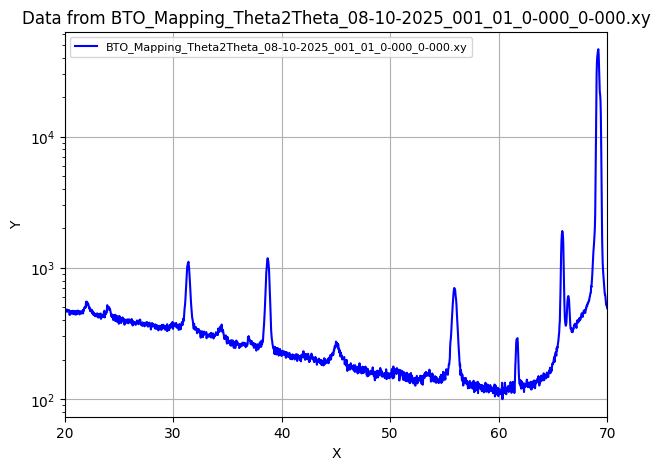

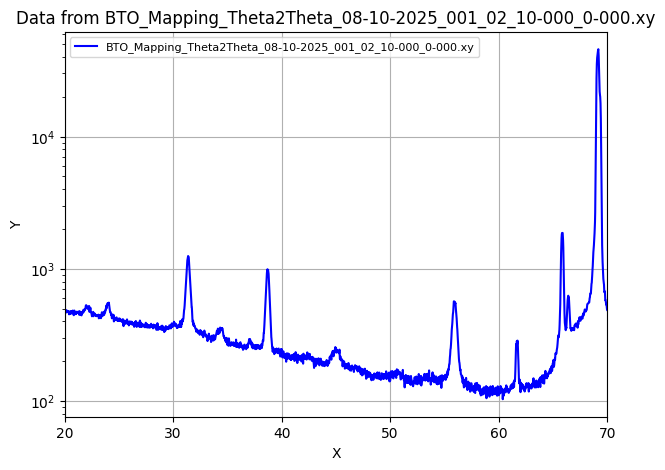

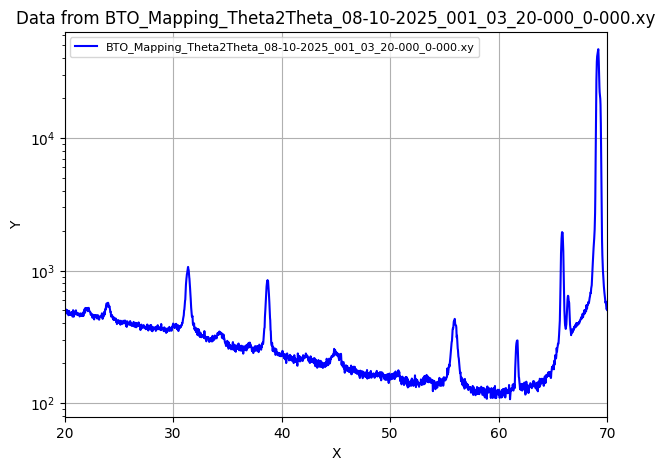

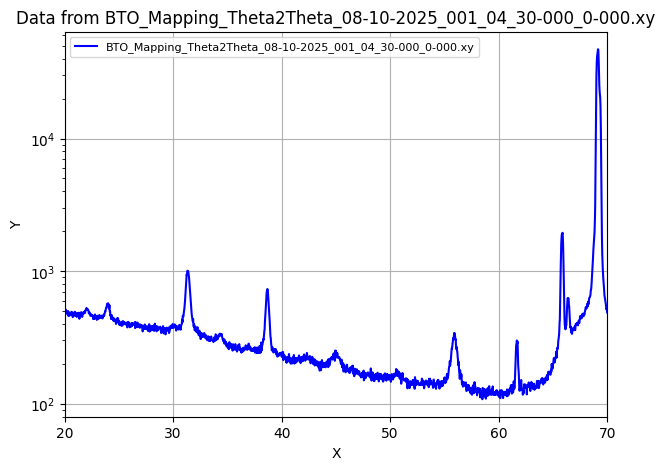

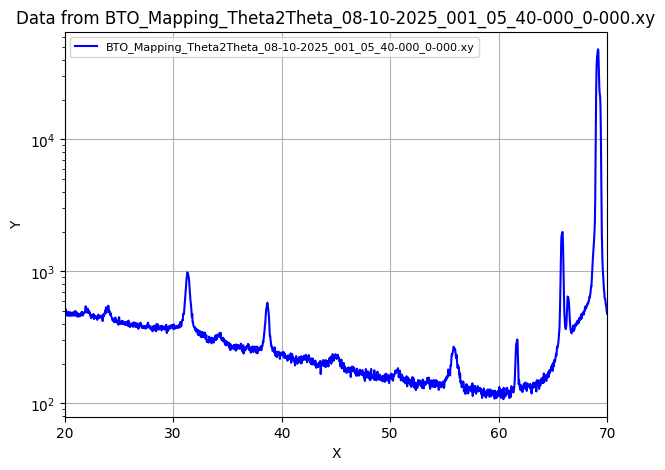

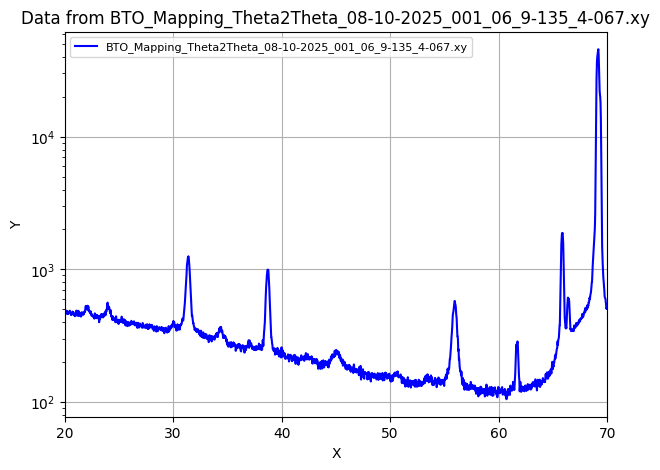

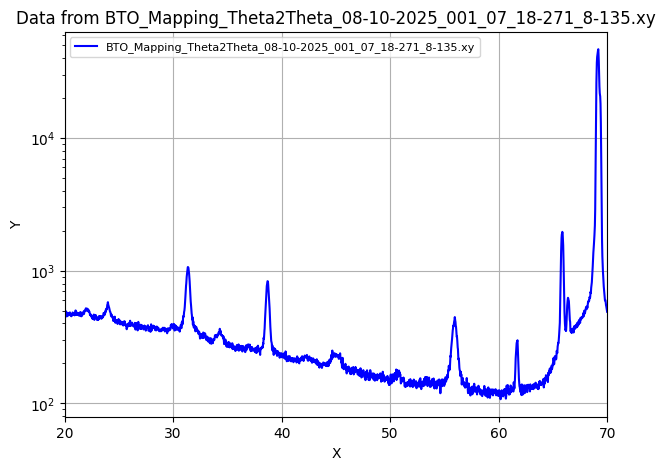

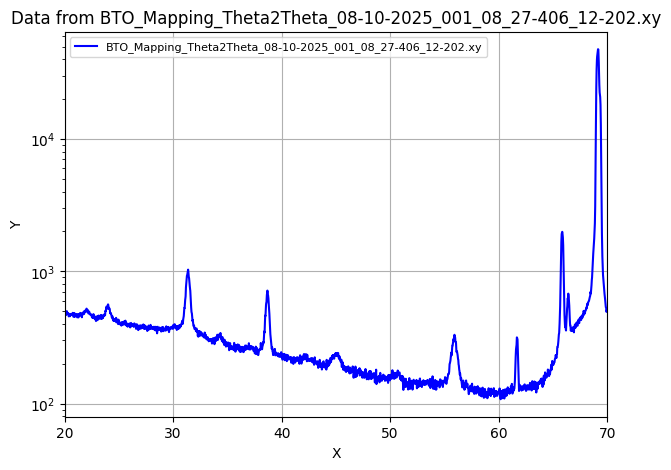

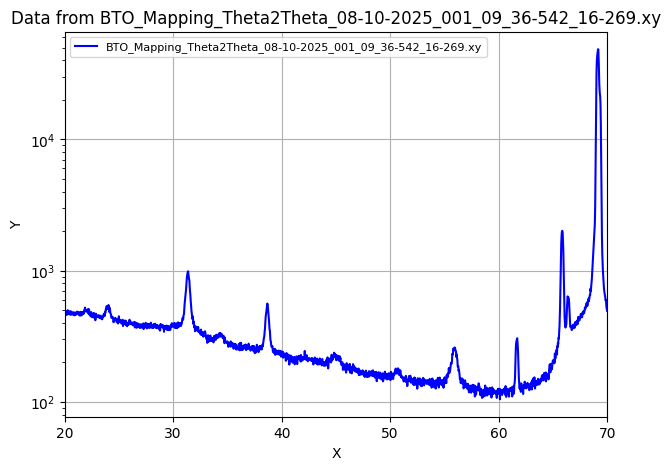

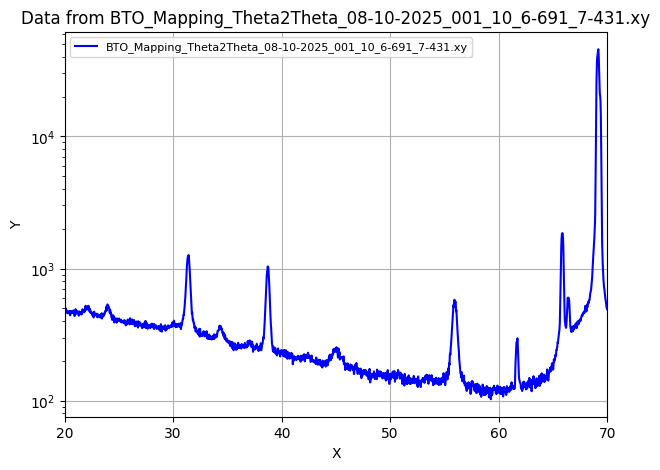

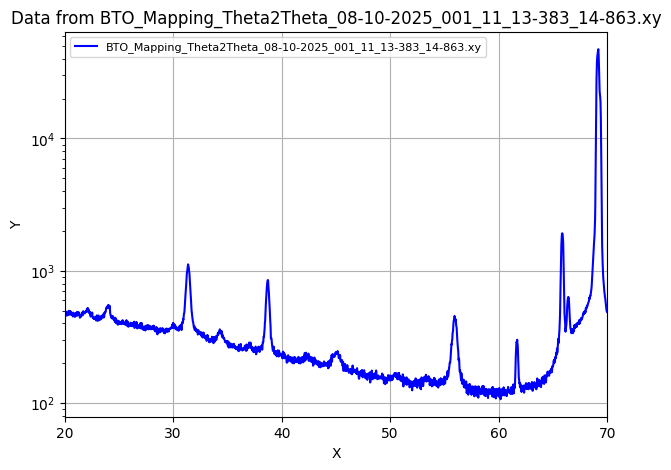

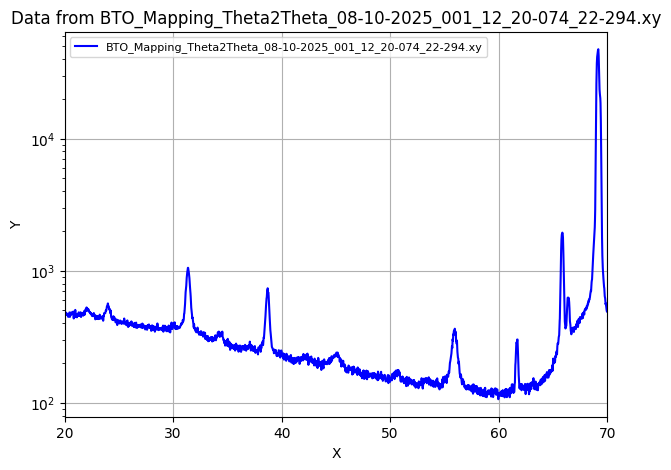

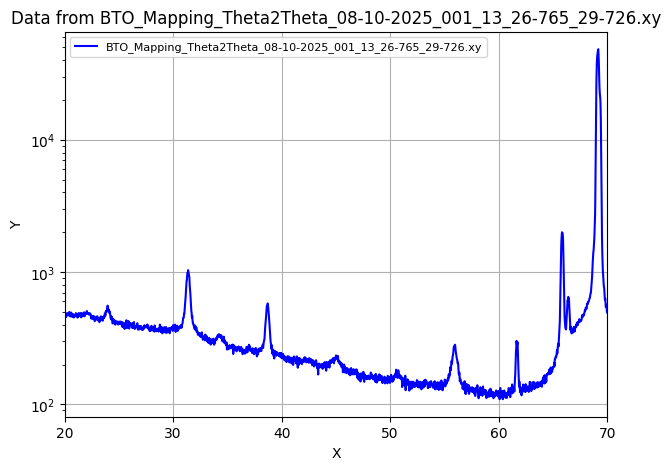

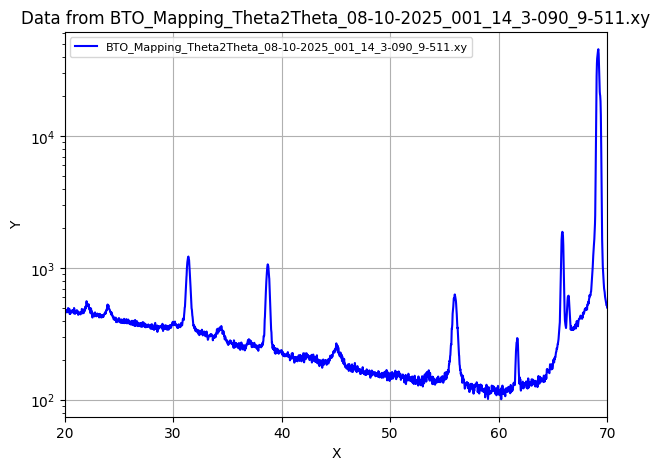

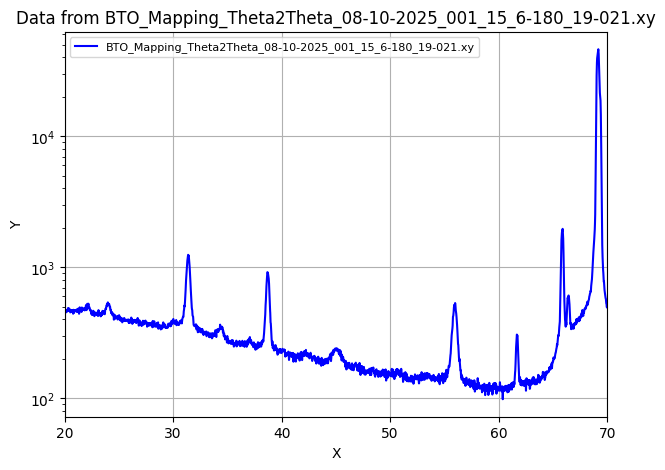

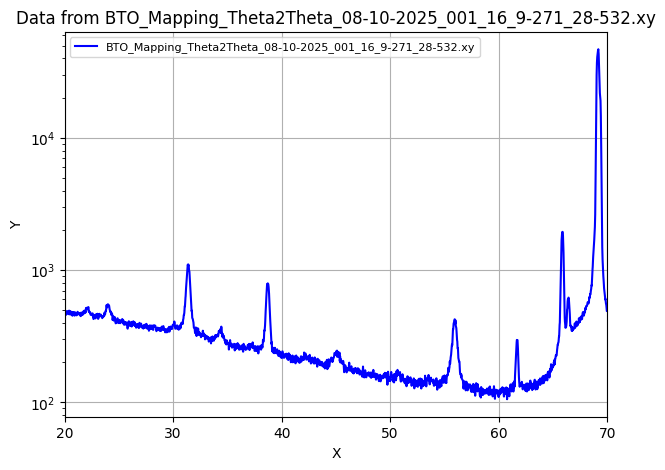

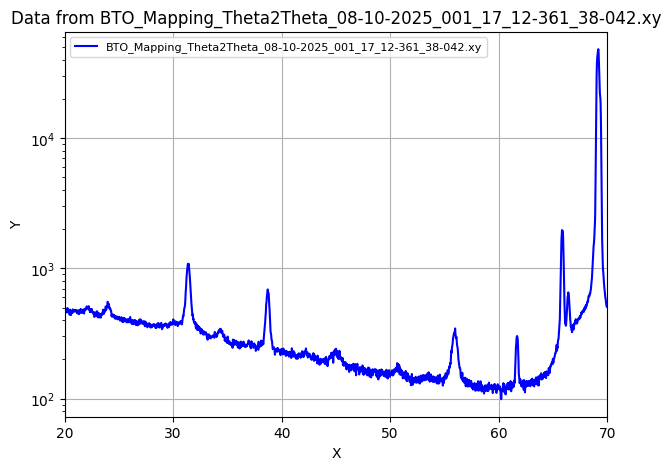

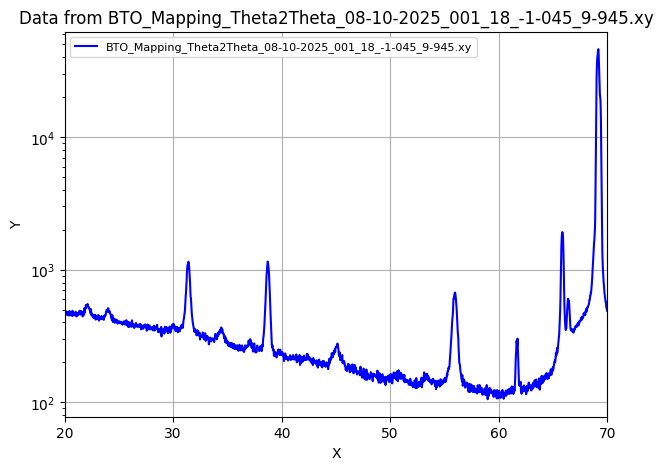

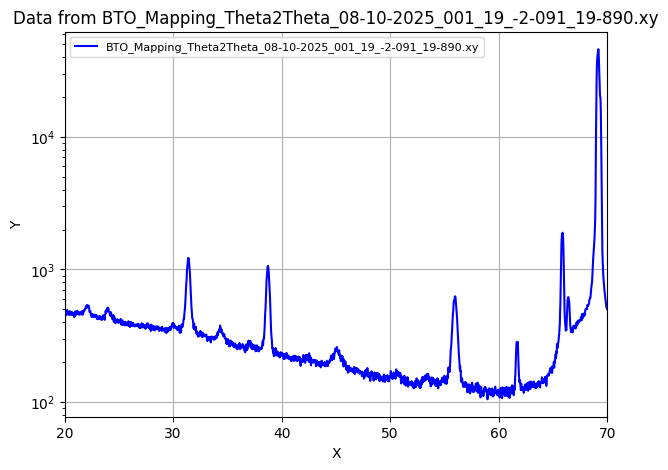

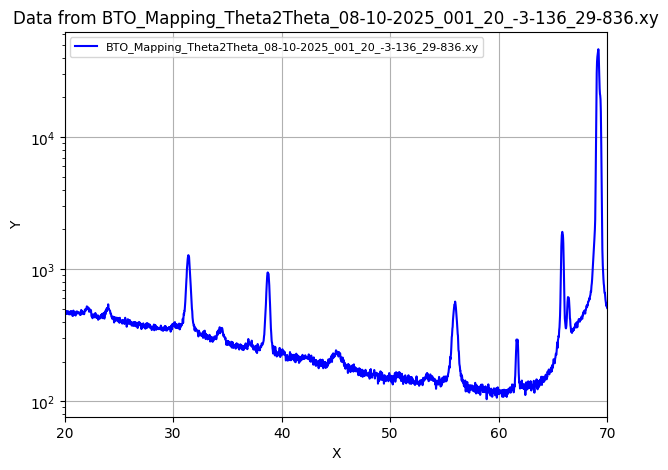

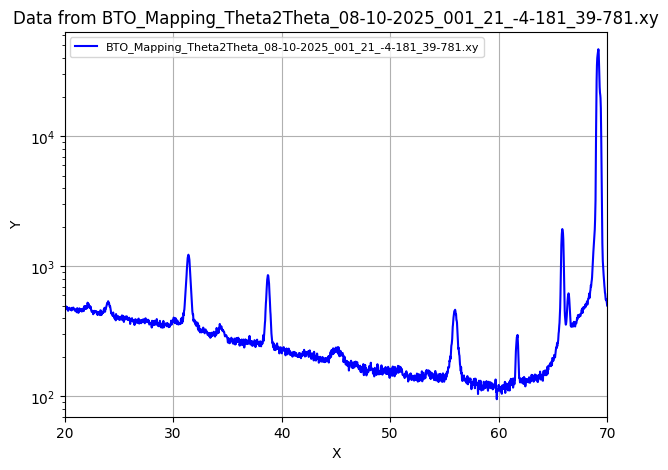

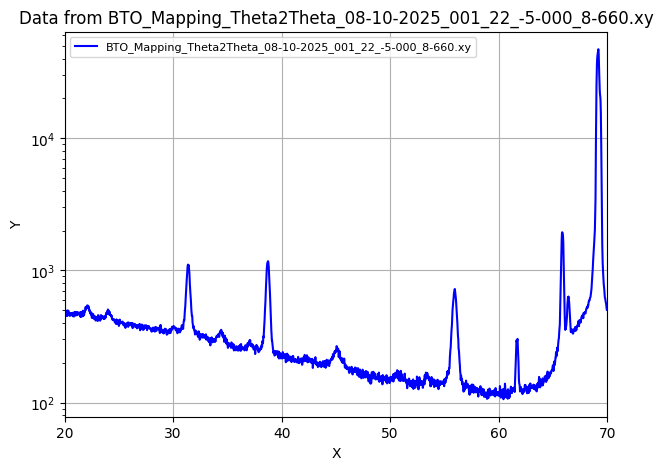

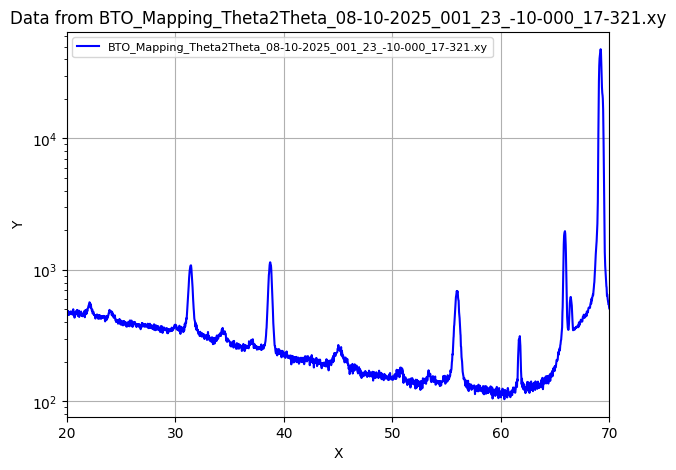

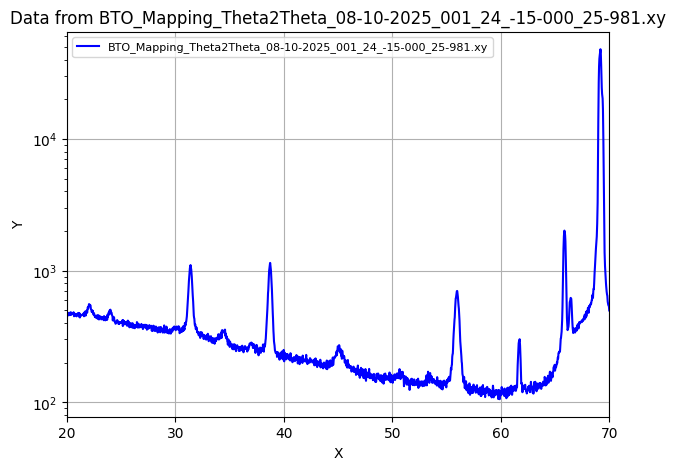

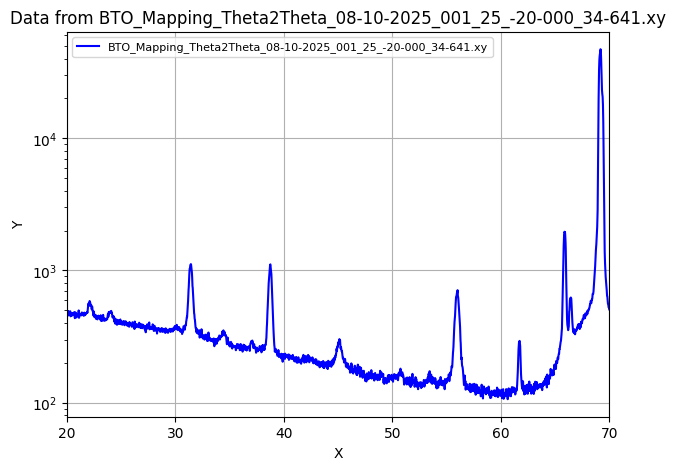

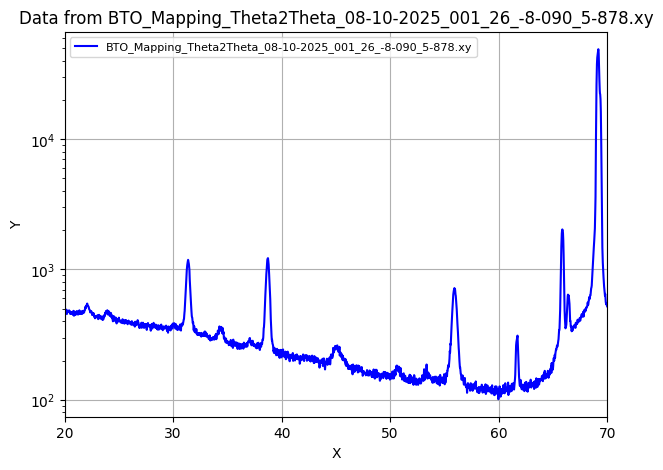

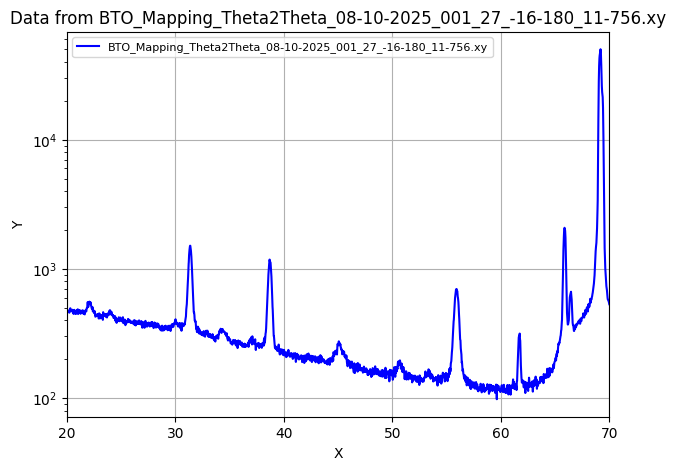

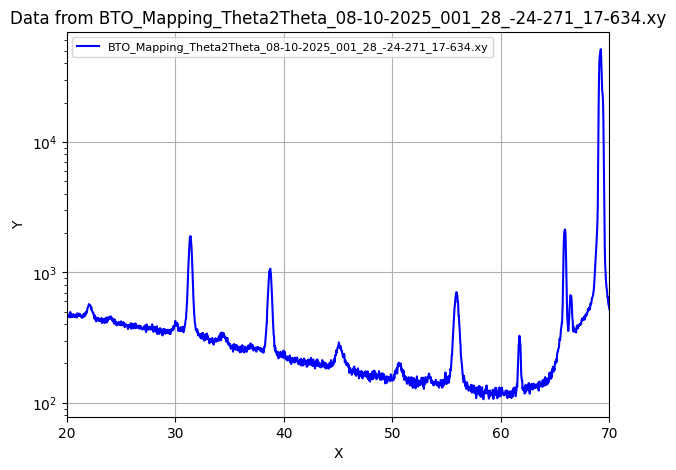

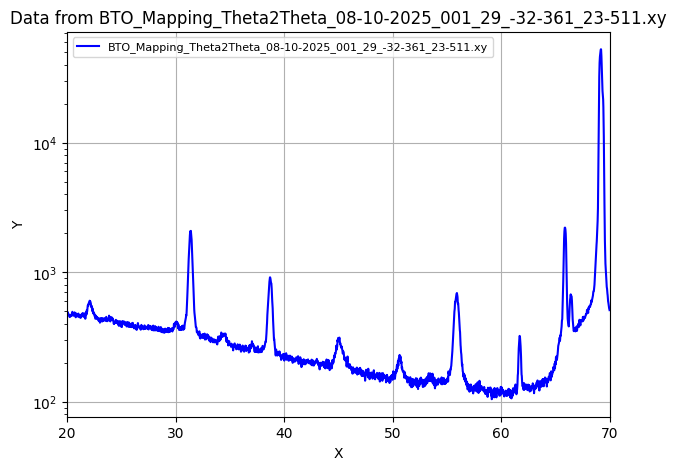

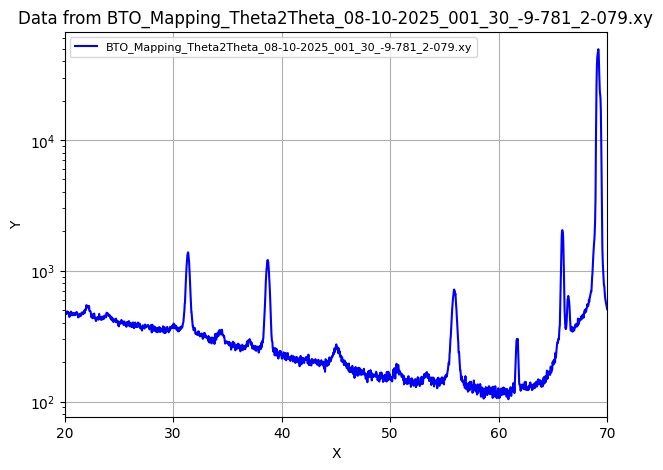

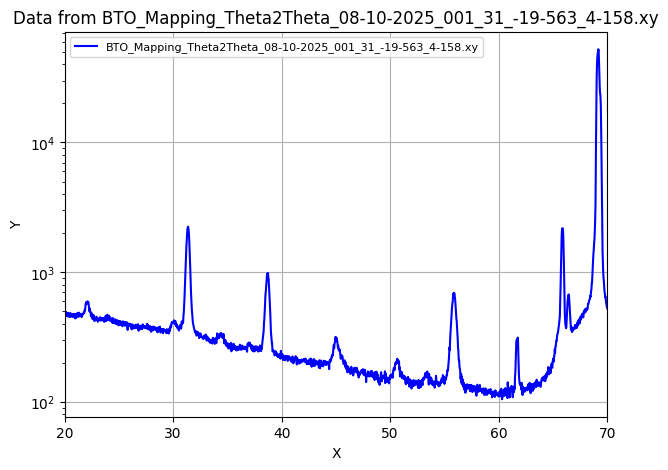

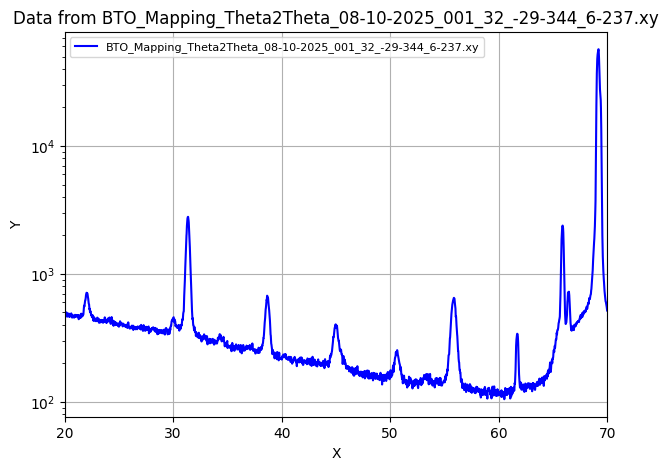

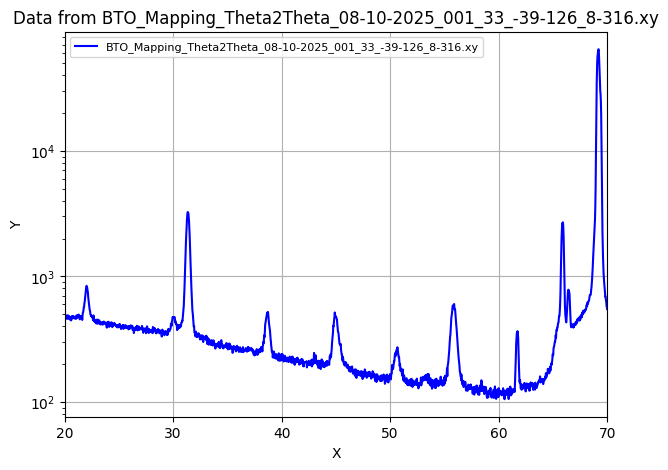

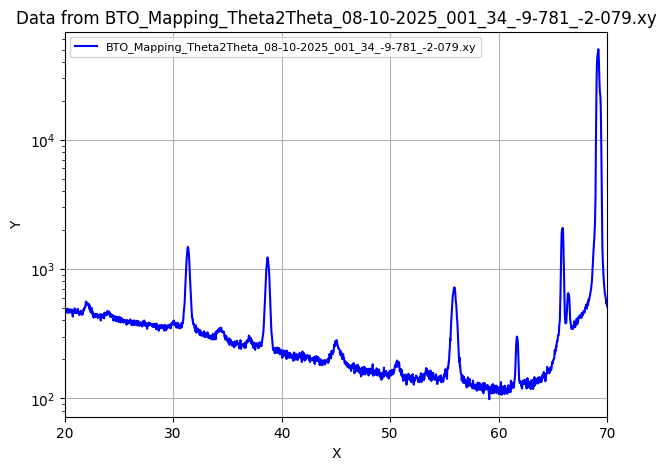

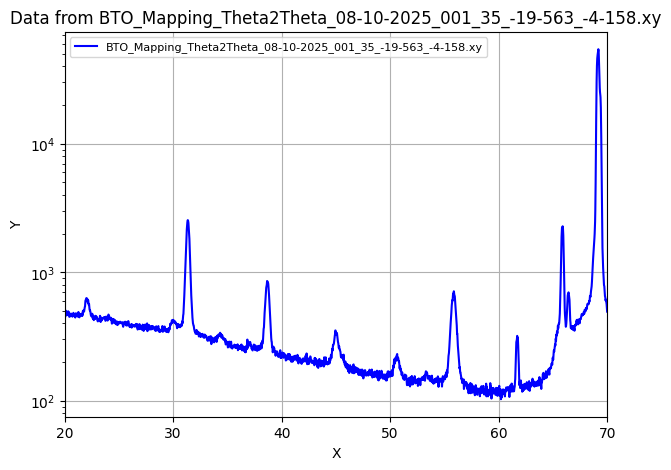

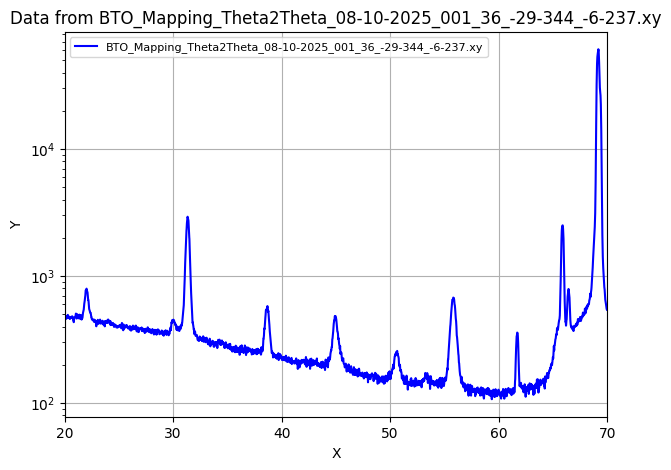

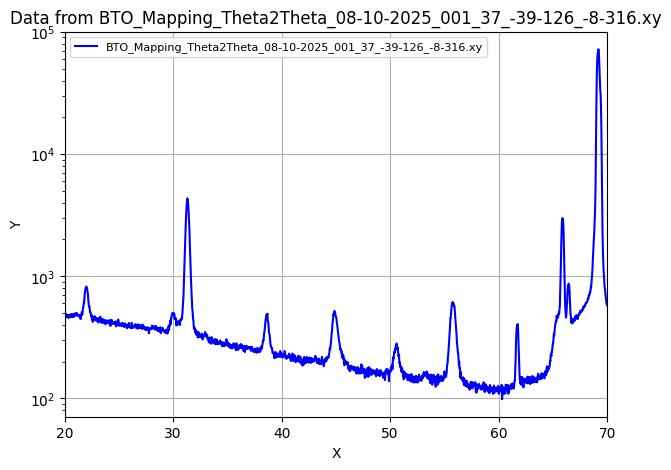

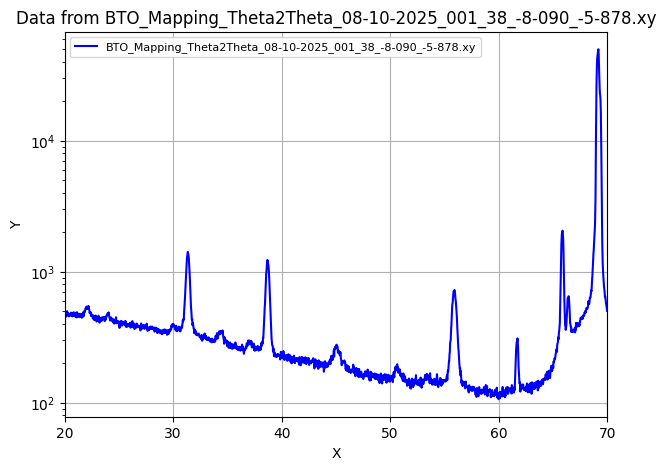

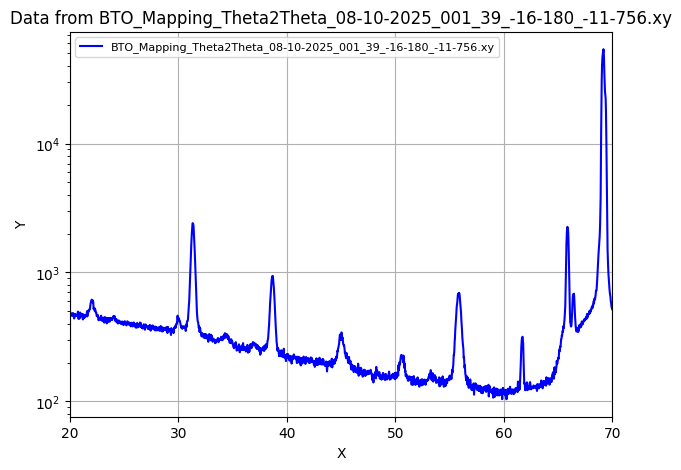

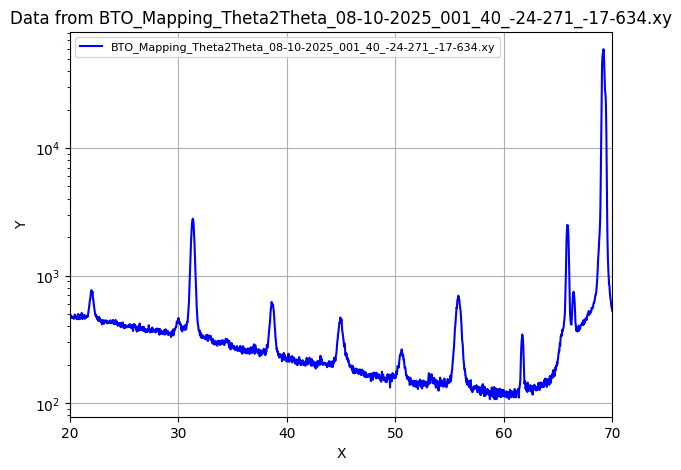

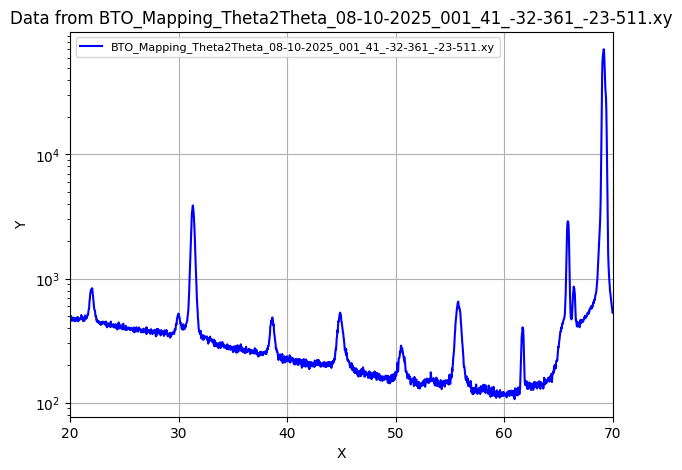

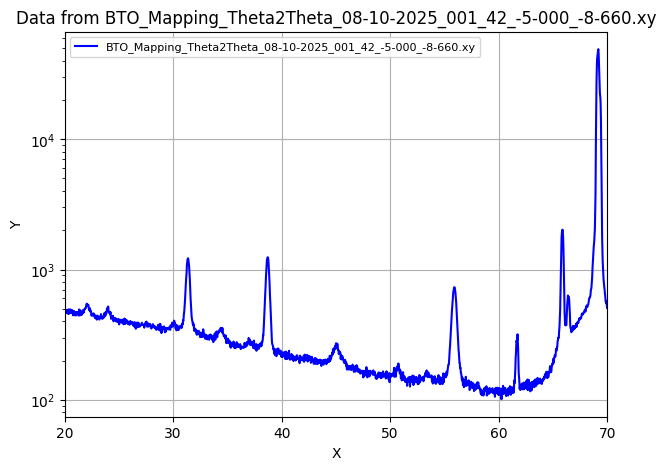

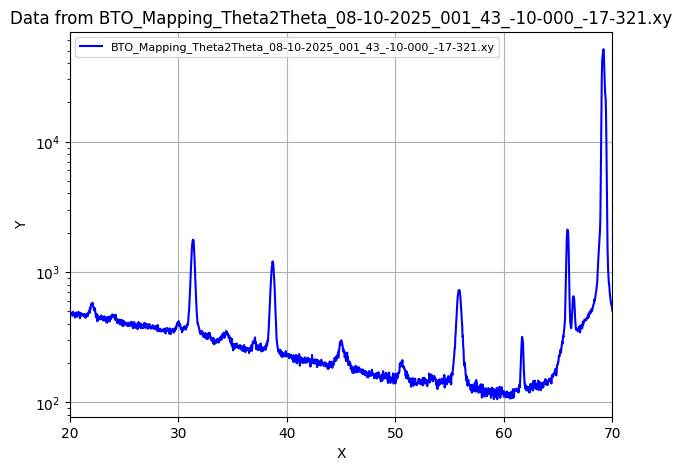

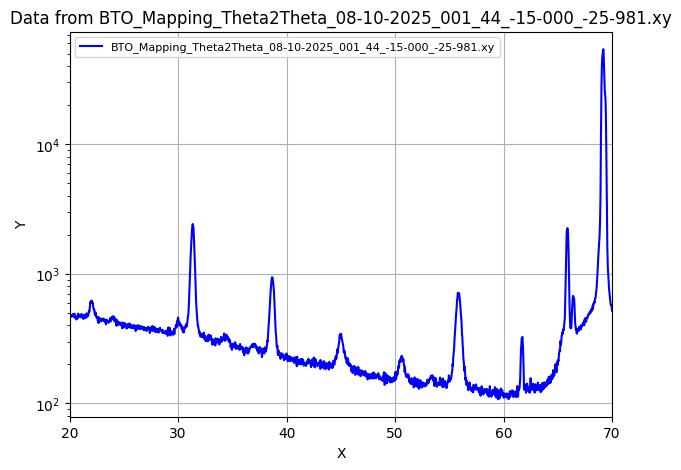

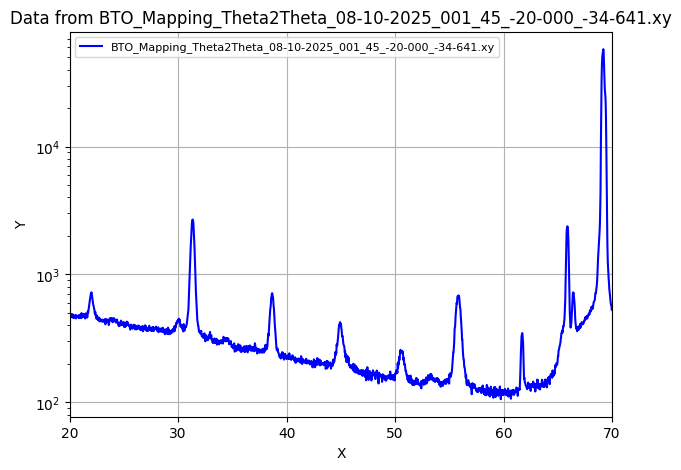

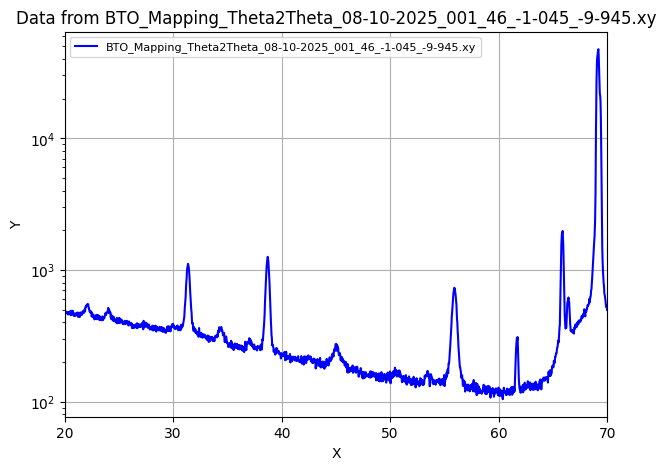

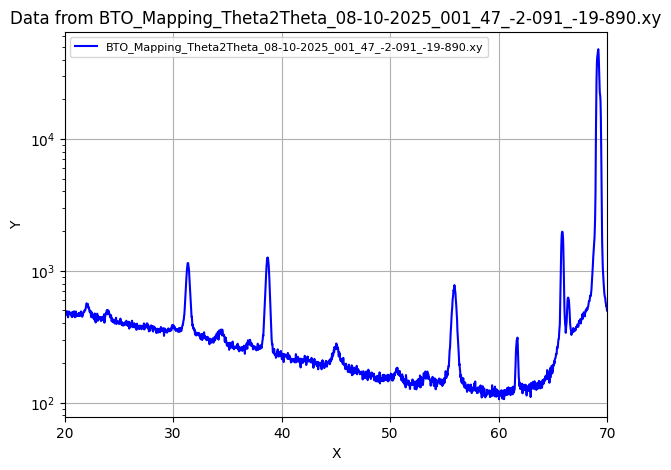

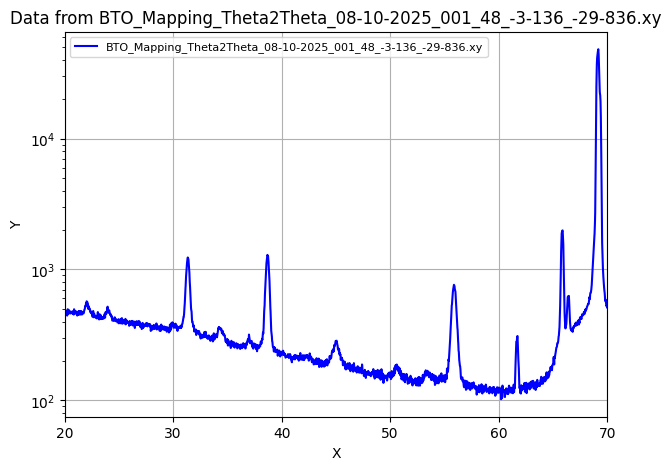

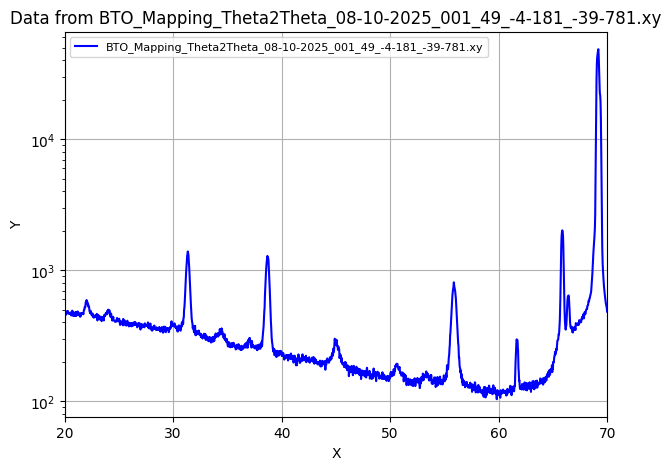

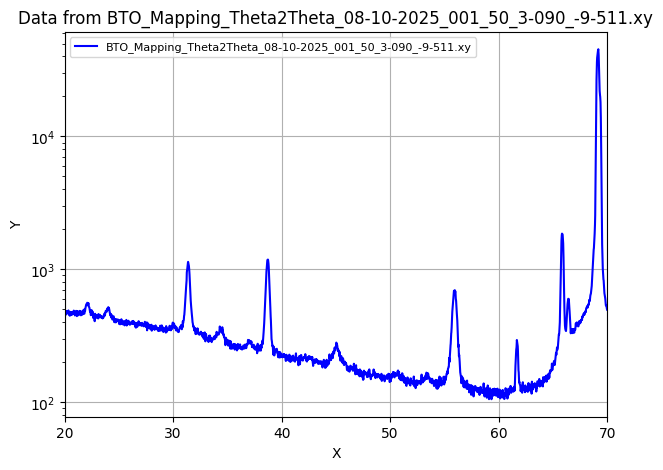

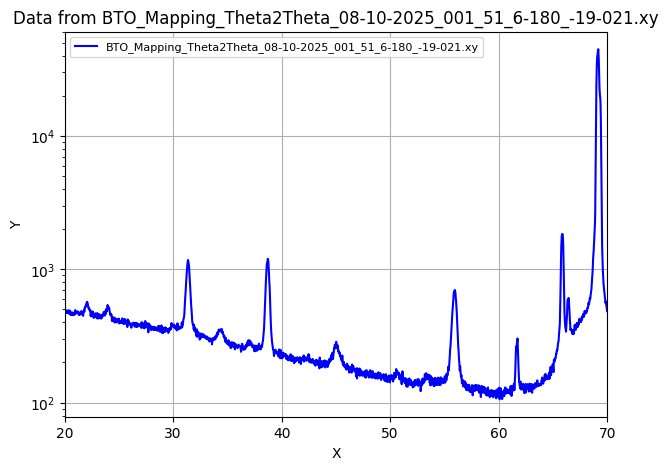

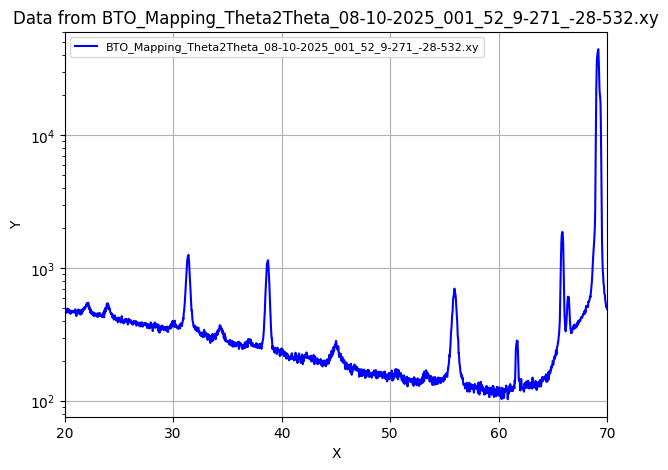

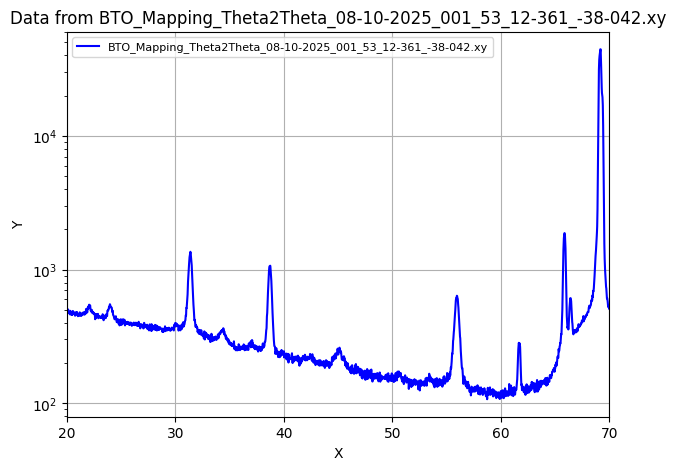

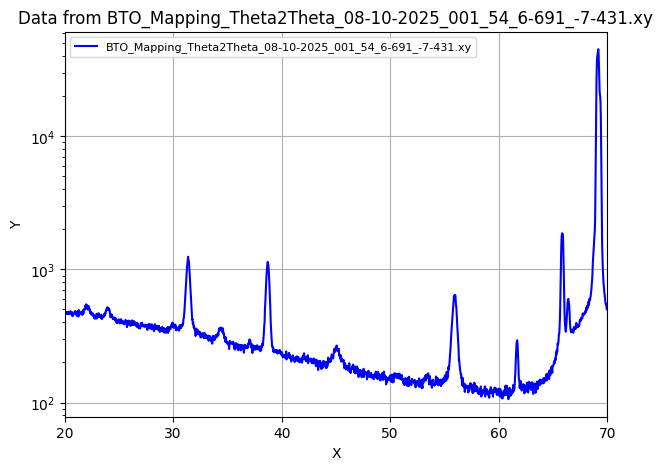

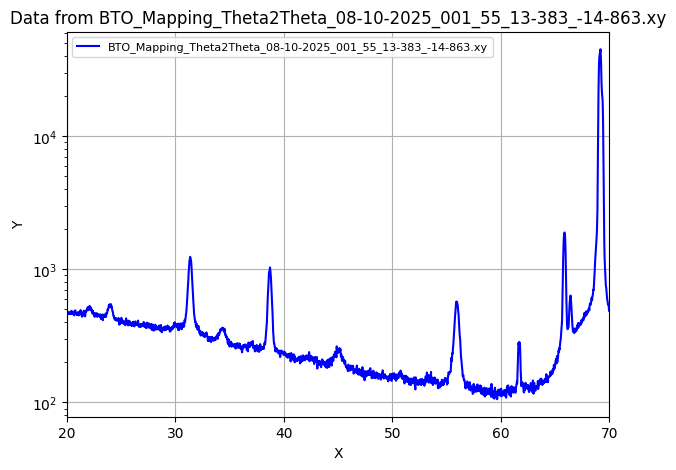

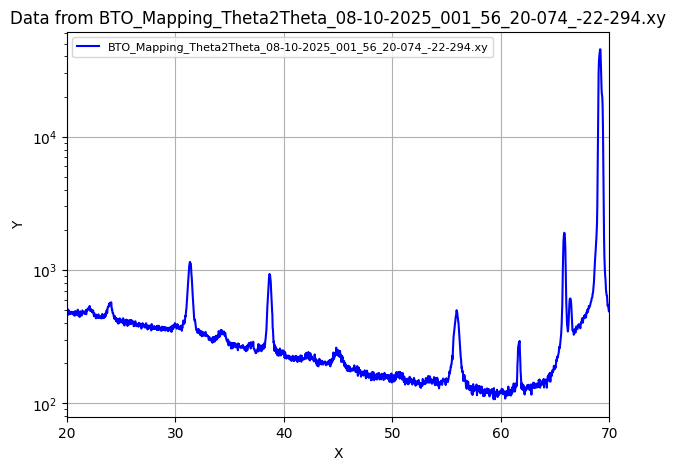

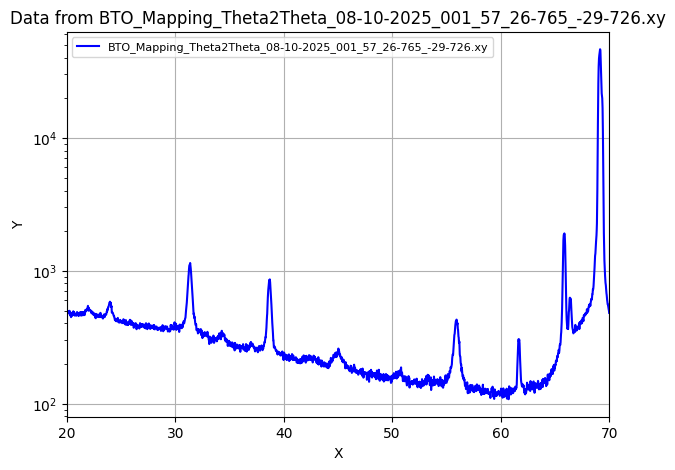

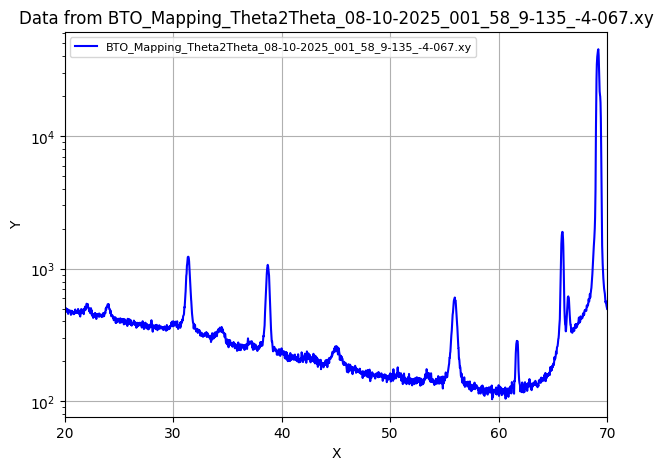

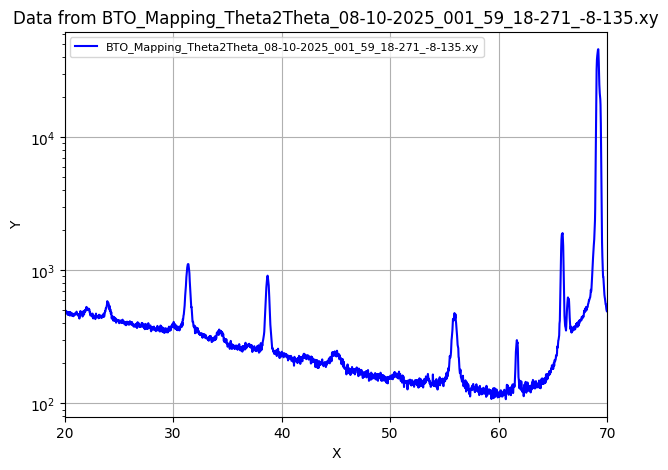

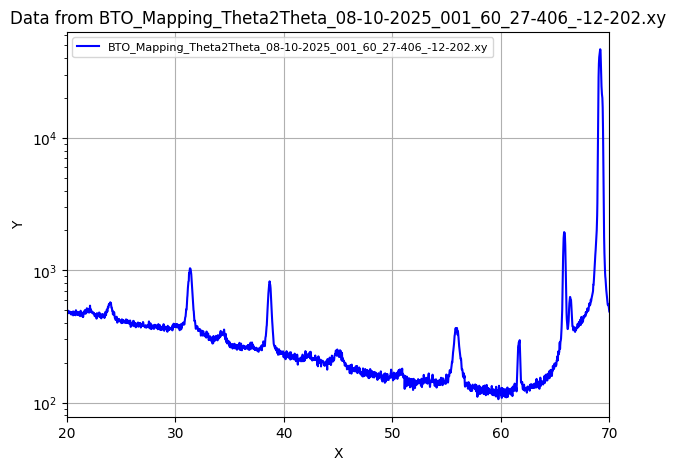

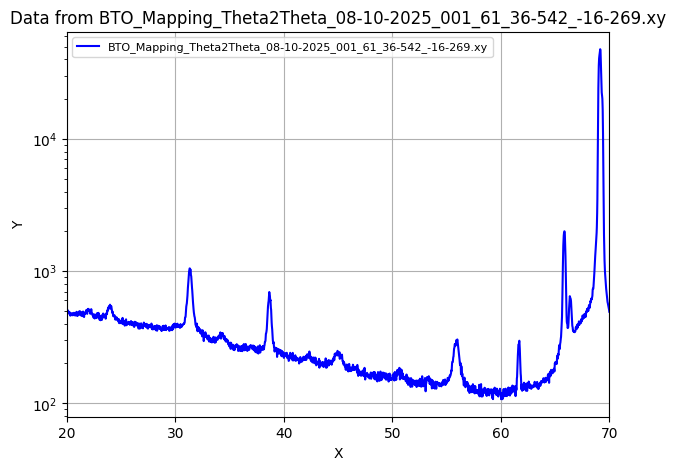

In [1]:
import pandas as pd
import numpy as np
import os, glob, re, csv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit
from matplotlib.tri import Triangulation
from matplotlib.colors import LinearSegmentedColormap, PowerNorm, Normalize  # or Normalize
from pathlib import Path



# Show current working directory
print("Current directory:", os.getcwd())

# Change working directory
os.chdir("C:\\Dilan\\Study\\Master Thesis\\Characterization\\XRD\\08-10-2025 Dep 7")

folder = "C:\\Dilan\\Study\\Master Thesis\\Characterization\\XRD\\08-10-2025 Dep 7\\XY Data"
os.chdir(folder)

files = glob.glob("*.xy")

# Loop over each file and make a separate graph
for f in files:
    df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])
    
    plt.figure(figsize=(7,5))
    plt.plot(df["X"], df["Y"], label=f, color="blue")
    plt.title(f"Data from {f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(fontsize=8)
    plt.xlim(20,70)
    # plt.ylim(0,100000)
    plt.yscale('log')
    plt.grid()
    plt.show()

## Stacked Plot

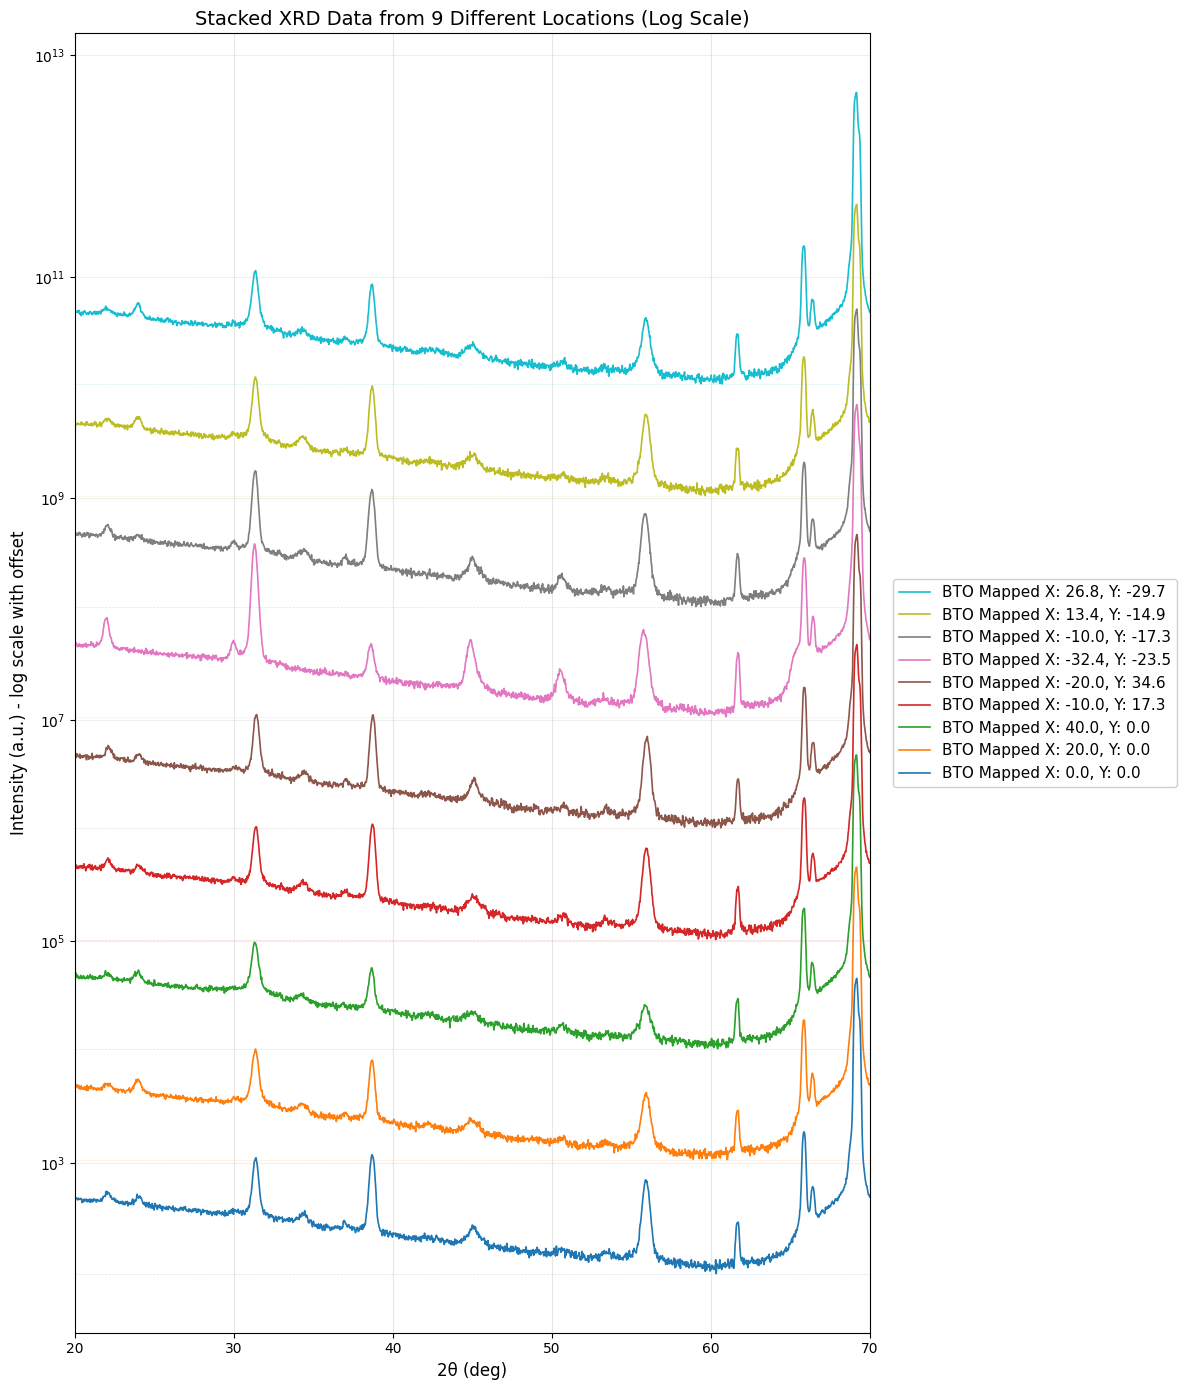

In [2]:
files_to_plot = [files[0], files[2], files[4], files[22], files[24], files[40], files[42], files[54], files[56]]

# Helper function to extract X and Y coordinates from filename
def extract_xy_from_filename(filename):
    """Extract X and Y coordinates from filename like 'something_X-value_Y-value.xy'"""
    name = os.path.basename(filename).rsplit('.', 1)[0]
    parts = name.split('_')
    try:
        x_str, y_str = parts[-2], parts[-1]
        # convert dash-separated decimals to proper floats
        def tok_to_float(t):
            if '-' in t[1:]:
                t = ('-' + t[1:].replace('-', '.', 1)) if t.startswith('-') else t.replace('-', '.', 1)
            return float(t)
        x_val, y_val = tok_to_float(x_str), tok_to_float(y_str)
        return x_val, y_val
    except Exception:
        return None, None

# Create ONE figure for all plots
fig, ax = plt.subplots(figsize=(12, 14))

# Define a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(files_to_plot)))

# Load data and prepare labels
data_list = []
label_list = []

for f in files_to_plot:
    df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])
    data_list.append(df)
    
    # Extract coordinates and create label
    x_coord, y_coord = extract_xy_from_filename(f)
    if x_coord is not None and y_coord is not None:
        label = f"BTO Mapped X: {x_coord:.1f}, Y: {y_coord:.1f}"
    else:
        label = os.path.basename(f)
    label_list.append(label)

# Use logarithmic offset: multiply each curve by 10^idx
# This creates even spacing on a log scale
log_offset_factor = 10  # Each curve is shifted by factor of 10

# Store handles and labels for reverse ordering
handles = []
labels_for_legend = []

# Plot with logarithmic offsets
for idx, (df, label) in enumerate(zip(data_list, label_list)):
    # Multiply by 10^idx to create logarithmic offset
    offset_multiplier = log_offset_factor ** idx
    
    line, = ax.plot(df["X"], df["Y"] * offset_multiplier,
                    color=colors[idx], linewidth=1.2)
    
    handles.append(line)
    labels_for_legend.append(label)
    
    # Optional: Add horizontal gridline at baseline of each curve
    # Find the minimum value for this curve to draw baseline
    baseline = df["Y"].min() * offset_multiplier
    ax.axhline(y=baseline, color=colors[idx], linestyle='--',
               alpha=0.2, linewidth=0.5)

# Set logarithmic scale for Y-axis
ax.set_yscale('log')

# Reverse the order for legend (top curve appears at top of legend)
handles_reversed = handles[::-1]
labels_reversed = labels_for_legend[::-1]

# Add legend outside the plot on the right, with larger font
ax.legend(handles_reversed, labels_reversed, 
          loc='center left', fontsize=11, framealpha=0.95,
          bbox_to_anchor=(1.02, 0.5))

# Add labels and formatting
ax.set_title("Stacked XRD Data from 9 Different Locations (Log Scale)", fontsize=14)
ax.set_xlabel("2θ (deg)", fontsize=12)
ax.set_ylabel("Intensity (a.u.) - log scale with offset", fontsize=12)
ax.set_xlim(20, 70)
ax.grid(True, alpha=0.3, axis='x')  # Only vertical gridlines
ax.grid(True, alpha=0.2, axis='y', which='both')  # Add horizontal log grid
plt.tight_layout()
plt.show()

## Plots with smoothing, peak finding and various calculations


BTO_Mapping_Theta2Theta_08-10-2025_001_01_0-000_0-000.xy  peaks: 5
  (100)    [R1]   21.990°   I≈547.7   FWHM≈1.1815°   Area≈68.15
  (110)    [R2]   31.390°   I≈1098.3   FWHM≈1.8141°   Area≈369.34
  (111)    [R3]   38.700°   I≈1176.9   FWHM≈1.4682°   Area≈407.67
  (200)    [R4]   45.040°   I≈269.4   FWHM≈1.5004°   Area≈71.68
  (112)    [R6]   55.910°   I≈700.6   FWHM≈1.7975°   Area≈305.31


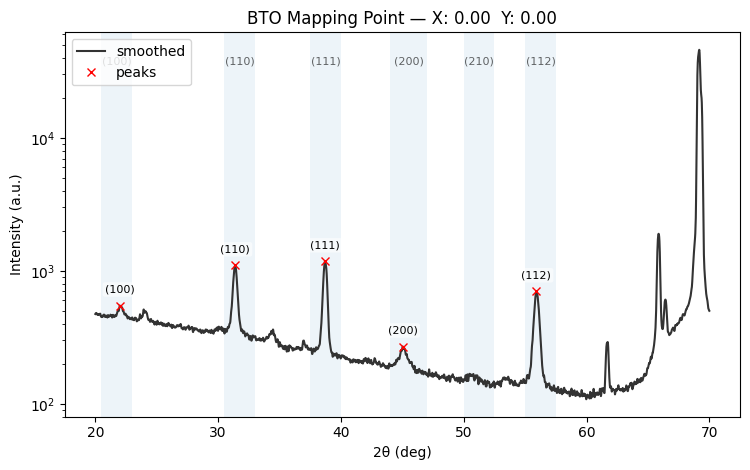


BTO_Mapping_Theta2Theta_08-10-2025_001_02_10-000_0-000.xy  peaks: 4
  (110)    [R2]   31.400°   I≈1245.7   FWHM≈1.8155°   Area≈405.60
  (111)    [R3]   38.700°   I≈985.7   FWHM≈1.4681°   Area≈308.35
  (200)    [R4]   44.950°   I≈250.1   FWHM≈1.5830°   Area≈63.01
  (112)    [R6]   55.890°   I≈563.0   FWHM≈1.8051°   Area≈241.90


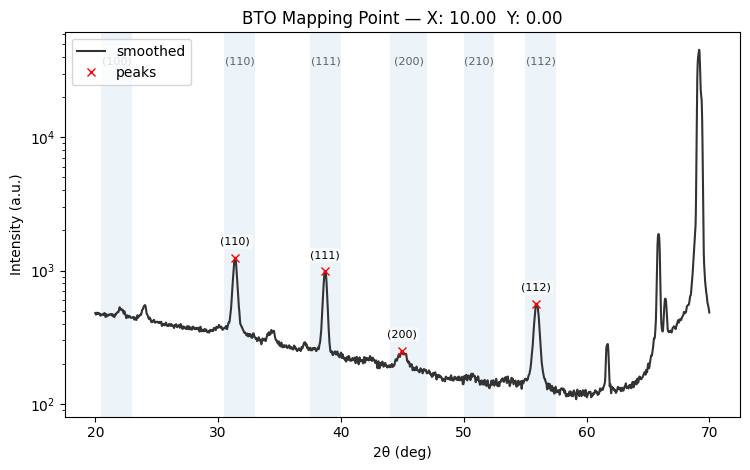


BTO_Mapping_Theta2Theta_08-10-2025_001_03_20-000_0-000.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1052.9   FWHM≈1.8449°   Area≈354.88
  (111)    [R3]   38.710°   I≈841.3   FWHM≈1.4810°   Area≈257.75
  (200)    [R4]   44.840°   I≈247.8   FWHM≈1.6409°   Area≈65.54
  (112)    [R6]   55.940°   I≈426.2   FWHM≈1.8221°   Area≈180.47


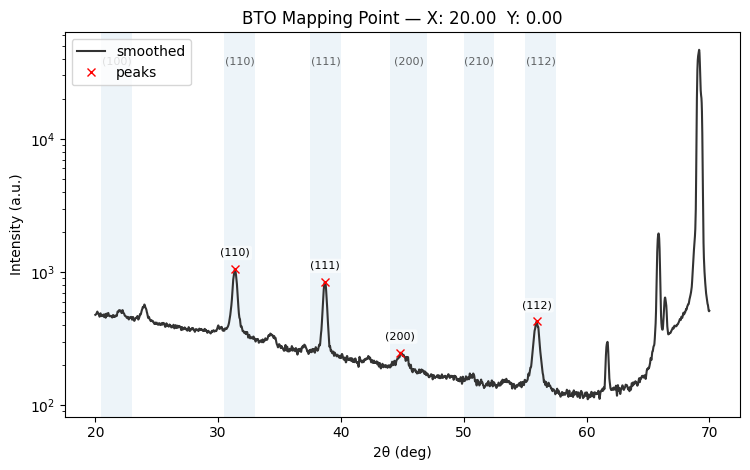


BTO_Mapping_Theta2Theta_08-10-2025_001_04_30-000_0-000.xy  peaks: 4
  (110)    [R2]   31.340°   I≈1002.2   FWHM≈1.8544°   Area≈348.86
  (111)    [R3]   38.690°   I≈723.0   FWHM≈1.4903°   Area≈204.27
  (200)    [R4]   44.960°   I≈249.0   FWHM≈1.5044°   Area≈64.27
  (112)    [R6]   55.930°   I≈341.8   FWHM≈1.8005°   Area≈129.61


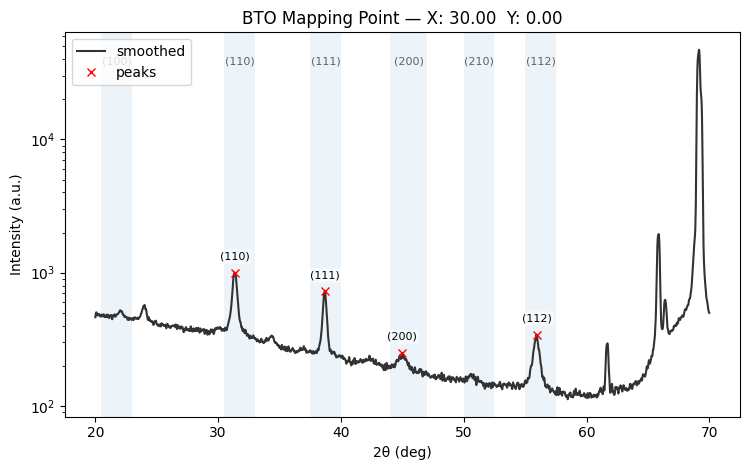


BTO_Mapping_Theta2Theta_08-10-2025_001_05_40-000_0-000.xy  peaks: 5
  (110)    [R2]   31.320°   I≈981.0   FWHM≈1.8634°   Area≈332.15
  (111)    [R3]   38.690°   I≈575.5   FWHM≈1.5123°   Area≈162.87
  (200)    [R4]   45.160°   I≈230.2   FWHM≈1.4983°   Area≈56.85
  (210)    [R5]   50.700°   I≈182.2   FWHM≈1.2468°   Area≈32.12
  (112)    [R6]   55.850°   I≈265.9   FWHM≈1.3978°   Area≈99.10


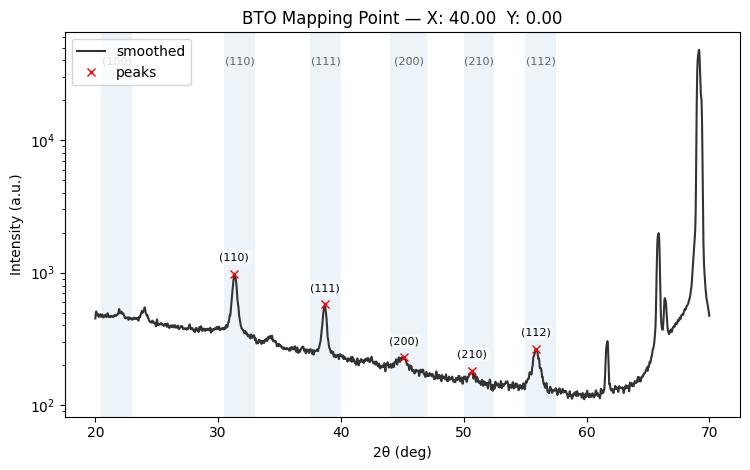


BTO_Mapping_Theta2Theta_08-10-2025_001_06_9-135_4-067.xy  peaks: 4
  (110)    [R2]   31.400°   I≈1244.1   FWHM≈1.8045°   Area≈418.18
  (111)    [R3]   38.730°   I≈1001.0   FWHM≈1.4665°   Area≈310.63
  (200)    [R4]   45.020°   I≈244.7   FWHM≈1.5535°   Area≈60.56
  (112)    [R6]   55.950°   I≈573.3   FWHM≈1.7874°   Area≈244.70


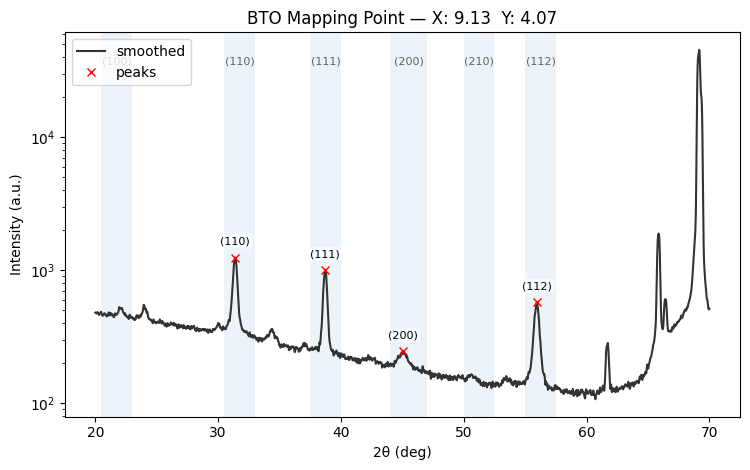


BTO_Mapping_Theta2Theta_08-10-2025_001_07_18-271_8-135.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1066.2   FWHM≈1.8367°   Area≈364.39
  (111)    [R3]   38.710°   I≈836.0   FWHM≈1.4743°   Area≈248.80
  (200)    [R4]   44.680°   I≈240.2   FWHM≈1.6270°   Area≈59.75
  (112)    [R6]   55.950°   I≈435.7   FWHM≈1.8160°   Area≈185.44


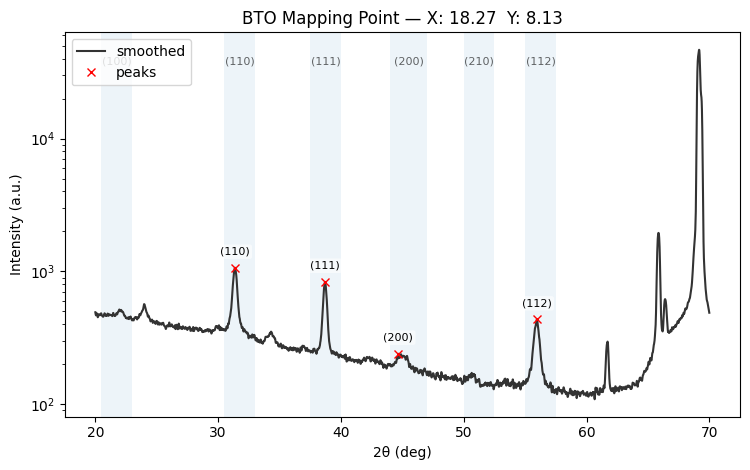


BTO_Mapping_Theta2Theta_08-10-2025_001_08_27-406_12-202.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1015.1   FWHM≈1.8391°   Area≈341.87
  (111)    [R3]   38.680°   I≈697.4   FWHM≈1.4974°   Area≈206.07
  (200)    [R4]   45.190°   I≈242.2   FWHM≈1.5613°   Area≈71.78
  (112)    [R6]   55.940°   I≈322.6   FWHM≈1.7277°   Area≈128.87


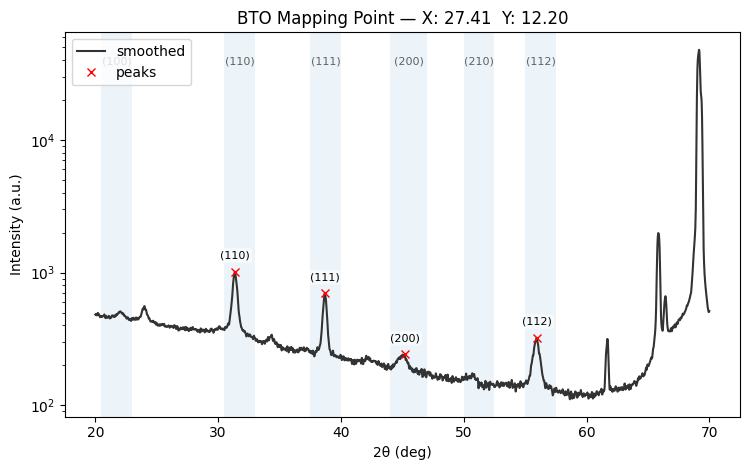


BTO_Mapping_Theta2Theta_08-10-2025_001_09_36-542_16-269.xy  peaks: 4
  (110)    [R2]   31.360°   I≈980.9   FWHM≈1.8456°   Area≈321.36
  (111)    [R3]   38.680°   I≈559.1   FWHM≈1.5052°   Area≈155.44
  (200)    [R4]   44.830°   I≈228.3   FWHM≈1.5077°   Area≈54.72
  (112)    [R6]   55.960°   I≈258.9   FWHM≈1.3196°   Area≈91.66


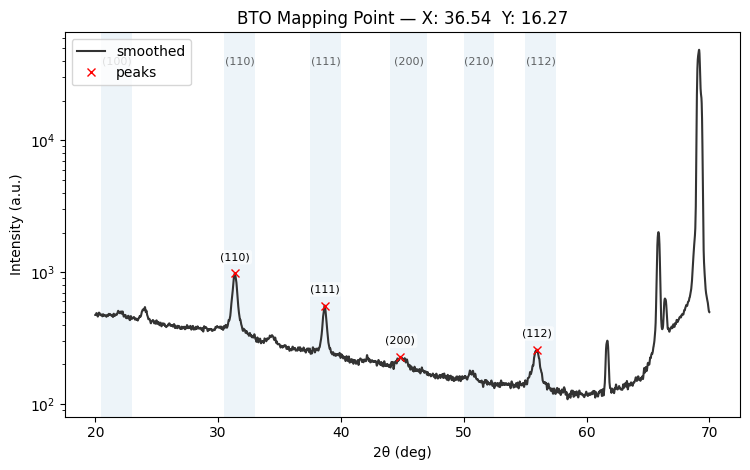


BTO_Mapping_Theta2Theta_08-10-2025_001_10_6-691_7-431.xy  peaks: 4
  (110)    [R2]   31.410°   I≈1255.7   FWHM≈1.7968°   Area≈415.61
  (111)    [R3]   38.740°   I≈1030.4   FWHM≈1.4464°   Area≈314.82
  (200)    [R4]   45.050°   I≈253.9   FWHM≈1.5402°   Area≈71.65
  (112)    [R6]   55.930°   I≈576.8   FWHM≈1.7920°   Area≈270.50


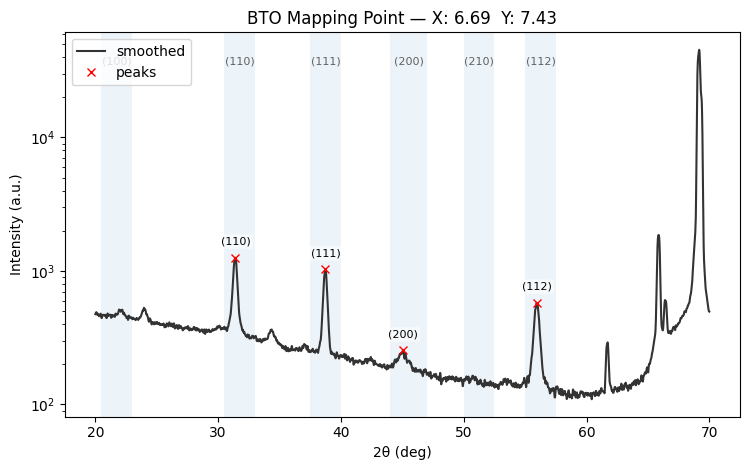


BTO_Mapping_Theta2Theta_08-10-2025_001_11_13-383_14-863.xy  peaks: 4
  (110)    [R2]   31.380°   I≈1106.2   FWHM≈1.8218°   Area≈380.04
  (111)    [R3]   38.720°   I≈849.8   FWHM≈1.4617°   Area≈257.59
  (200)    [R4]   45.170°   I≈245.3   FWHM≈1.5124°   Area≈54.01
  (112)    [R6]   55.940°   I≈451.1   FWHM≈1.7899°   Area≈189.38


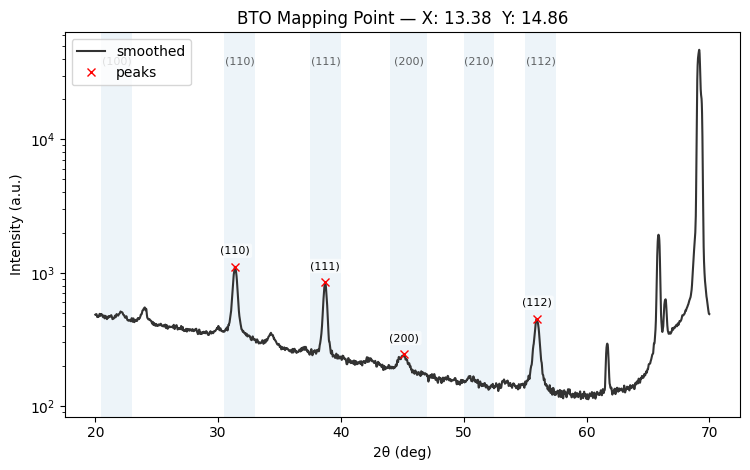


BTO_Mapping_Theta2Theta_08-10-2025_001_12_20-074_22-294.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1046.6   FWHM≈1.8301°   Area≈350.83
  (111)    [R3]   38.700°   I≈726.6   FWHM≈1.4727°   Area≈208.07
  (200)    [R4]   45.060°   I≈240.3   FWHM≈1.4981°   Area≈48.60
  (112)    [R6]   55.960°   I≈359.1   FWHM≈1.8258°   Area≈138.27


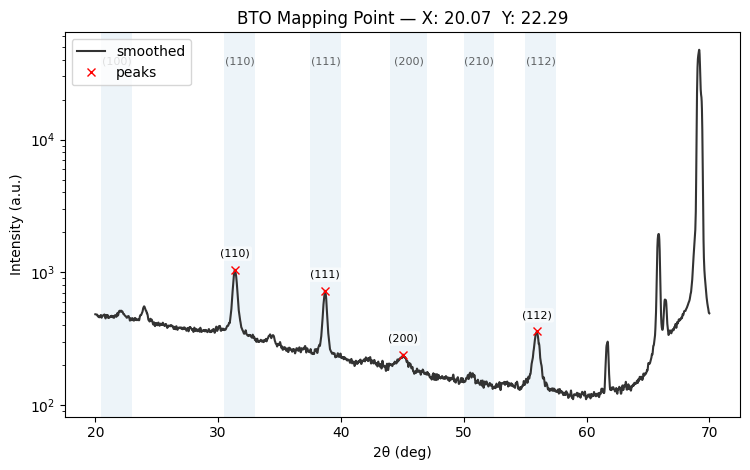


BTO_Mapping_Theta2Theta_08-10-2025_001_13_26-765_29-726.xy  peaks: 5
  (110)    [R2]   31.390°   I≈1015.2   FWHM≈1.8299°   Area≈334.80
  (111)    [R3]   38.710°   I≈572.6   FWHM≈1.4995°   Area≈157.33
  (200)    [R4]   45.040°   I≈230.3   FWHM≈1.6254°   Area≈60.51
  (210)    [R5]   50.750°   I≈182.1   FWHM≈1.2147°   Area≈25.78
  (112)    [R6]   55.970°   I≈280.5   FWHM≈1.3938°   Area≈94.59


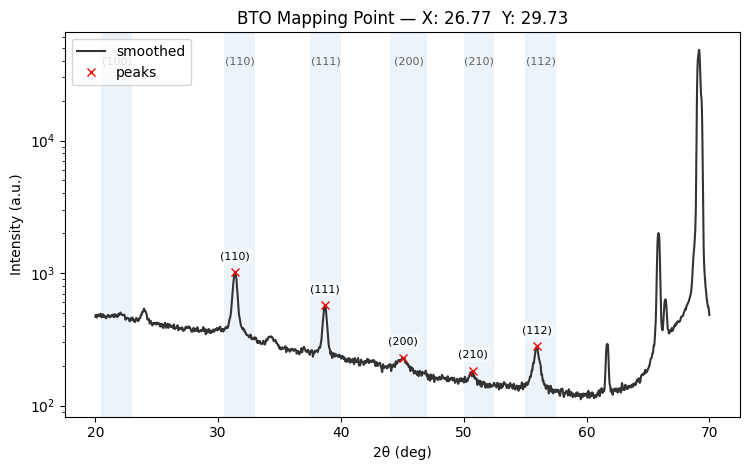


BTO_Mapping_Theta2Theta_08-10-2025_001_14_3-090_9-511.xy  peaks: 5
  (100)    [R1]   22.040°   I≈548.3   FWHM≈1.1126°   Area≈59.22
  (110)    [R2]   31.400°   I≈1218.2   FWHM≈1.7953°   Area≈390.53
  (111)    [R3]   38.730°   I≈1063.7   FWHM≈1.4567°   Area≈332.96
  (200)    [R4]   45.050°   I≈261.0   FWHM≈1.5199°   Area≈72.19
  (112)    [R6]   55.960°   I≈628.4   FWHM≈1.7700°   Area≈265.41


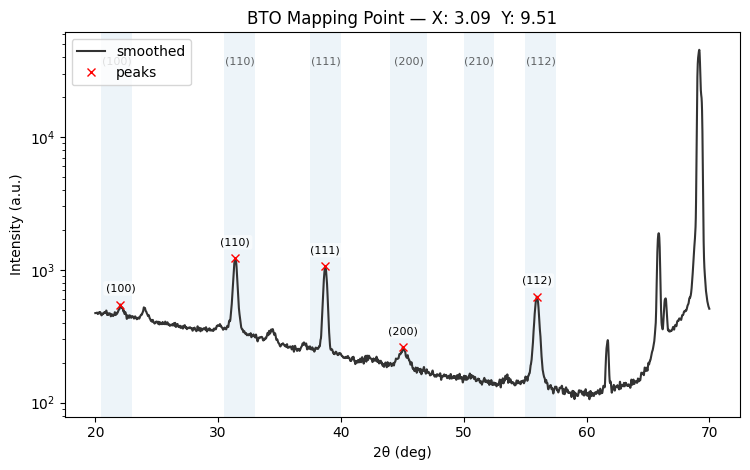


BTO_Mapping_Theta2Theta_08-10-2025_001_15_6-180_19-021.xy  peaks: 4
  (110)    [R2]   31.400°   I≈1234.8   FWHM≈1.8065°   Area≈417.92
  (111)    [R3]   38.700°   I≈916.9   FWHM≈1.4480°   Area≈287.64
  (200)    [R4]   45.070°   I≈240.4   FWHM≈1.5389°   Area≈67.00
  (112)    [R6]   55.990°   I≈517.7   FWHM≈1.7743°   Area≈218.23


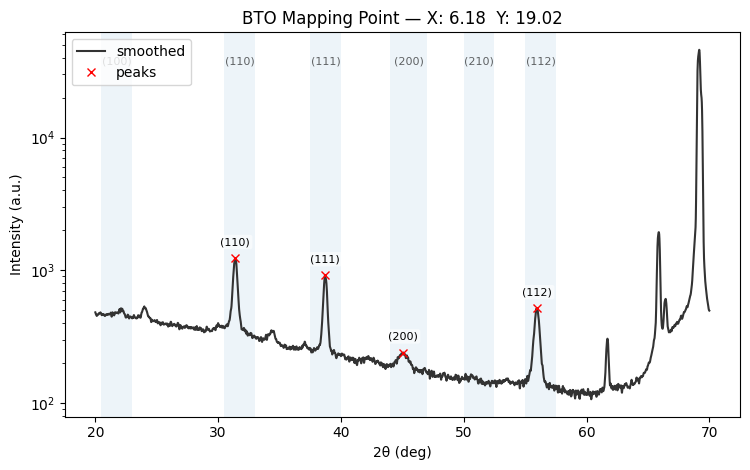


BTO_Mapping_Theta2Theta_08-10-2025_001_16_9-271_28-532.xy  peaks: 4
  (110)    [R2]   31.390°   I≈1091.7   FWHM≈1.8096°   Area≈367.35
  (111)    [R3]   38.730°   I≈791.2   FWHM≈1.4593°   Area≈244.18
  (200)    [R4]   45.070°   I≈244.6   FWHM≈1.3749°   Area≈60.80
  (112)    [R6]   55.940°   I≈419.4   FWHM≈1.7692°   Area≈175.18


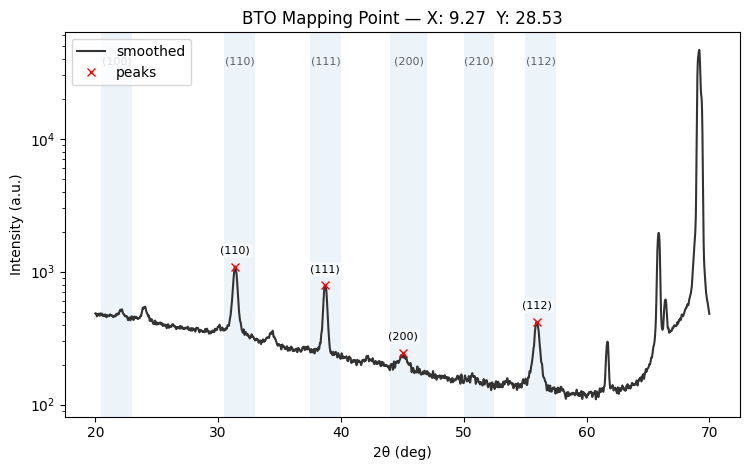


BTO_Mapping_Theta2Theta_08-10-2025_001_17_12-361_38-042.xy  peaks: 5
  (110)    [R2]   31.400°   I≈1083.8   FWHM≈1.8117°   Area≈348.40
  (111)    [R3]   38.720°   I≈679.7   FWHM≈1.4642°   Area≈201.77
  (200)    [R4]   44.990°   I≈237.7   FWHM≈1.3161°   Area≈63.90
  (210)    [R5]   50.760°   I≈182.3   FWHM≈0.9595°   Area≈29.60
  (112)    [R6]   55.980°   I≈334.0   FWHM≈1.6993°   Area≈126.27


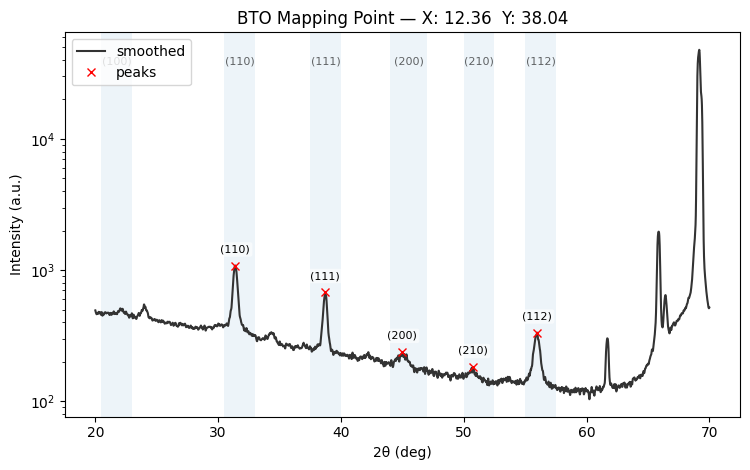


BTO_Mapping_Theta2Theta_08-10-2025_001_18_-1-045_9-945.xy  peaks: 5
  (100)    [R1]   22.120°   I≈547.8   FWHM≈1.1355°   Area≈53.97
  (110)    [R2]   31.410°   I≈1131.4   FWHM≈1.7888°   Area≈368.64
  (111)    [R3]   38.730°   I≈1132.9   FWHM≈1.4526°   Area≈367.01
  (200)    [R4]   45.140°   I≈275.6   FWHM≈1.5430°   Area≈86.65
  (112)    [R6]   55.970°   I≈670.9   FWHM≈1.7804°   Area≈291.77


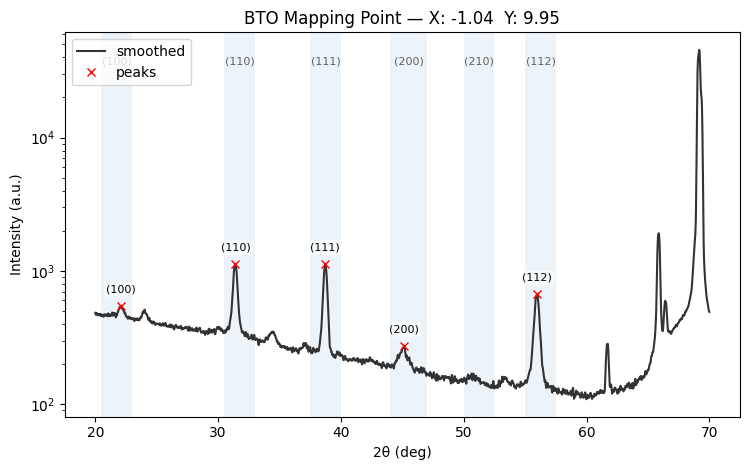


BTO_Mapping_Theta2Theta_08-10-2025_001_19_-2-091_19-890.xy  peaks: 4
  (110)    [R2]   31.410°   I≈1224.7   FWHM≈1.7892°   Area≈405.08
  (111)    [R3]   38.730°   I≈1064.8   FWHM≈1.4366°   Area≈327.22
  (200)    [R4]   45.100°   I≈253.7   FWHM≈1.3602°   Area≈73.82
  (112)    [R6]   55.990°   I≈628.1   FWHM≈1.7661°   Area≈263.87


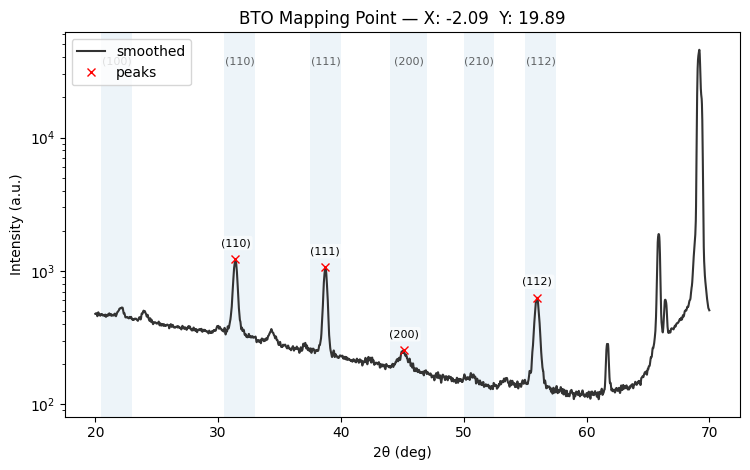


BTO_Mapping_Theta2Theta_08-10-2025_001_20_-3-136_29-836.xy  peaks: 4
  (110)    [R2]   31.410°   I≈1277.9   FWHM≈1.7812°   Area≈423.77
  (111)    [R3]   38.720°   I≈937.5   FWHM≈1.4358°   Area≈297.16
  (200)    [R4]   45.000°   I≈238.4   FWHM≈1.4555°   Area≈65.49
  (112)    [R6]   56.000°   I≈558.6   FWHM≈1.7627°   Area≈233.25


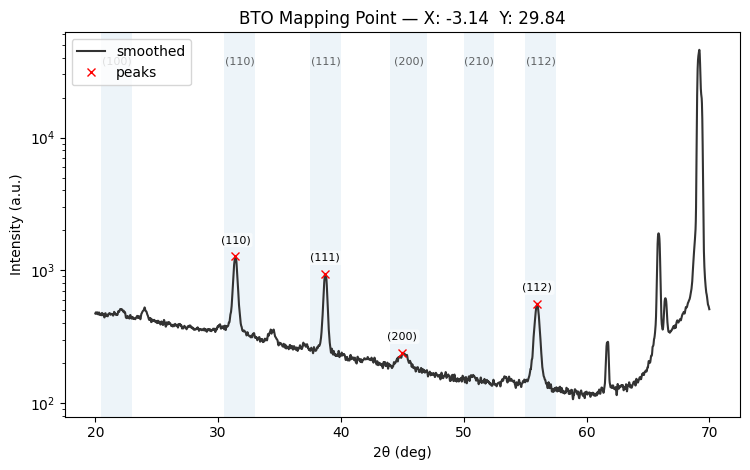


BTO_Mapping_Theta2Theta_08-10-2025_001_21_-4-181_39-781.xy  peaks: 4
  (110)    [R2]   31.410°   I≈1226.8   FWHM≈1.7812°   Area≈413.45
  (111)    [R3]   38.740°   I≈858.8   FWHM≈1.4348°   Area≈256.40
  (200)    [R4]   45.130°   I≈239.5   FWHM≈1.5663°   Area≈60.05
  (112)    [R6]   55.980°   I≈462.1   FWHM≈1.7651°   Area≈201.68


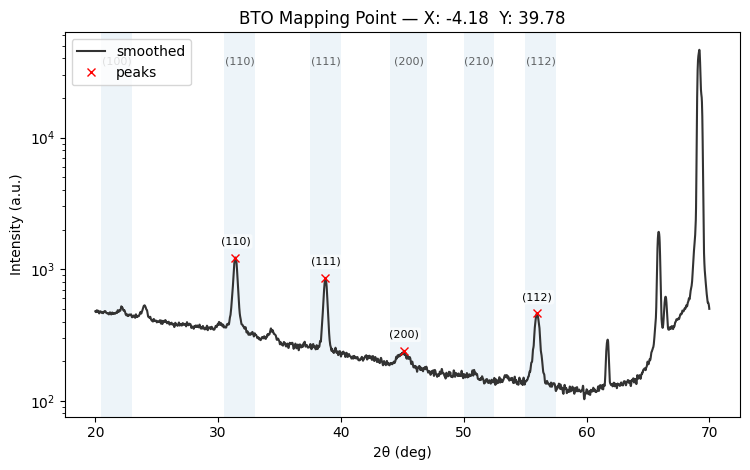


BTO_Mapping_Theta2Theta_08-10-2025_001_22_-5-000_8-660.xy  peaks: 5
  (100)    [R1]   22.100°   I≈544.1   FWHM≈1.1176°   Area≈60.83
  (110)    [R2]   31.370°   I≈1102.1   FWHM≈1.7992°   Area≈349.83
  (111)    [R3]   38.740°   I≈1166.8   FWHM≈1.4569°   Area≈395.59
  (200)    [R4]   45.070°   I≈267.1   FWHM≈1.4452°   Area≈83.82
  (112)    [R6]   55.950°   I≈716.7   FWHM≈1.7847°   Area≈309.98


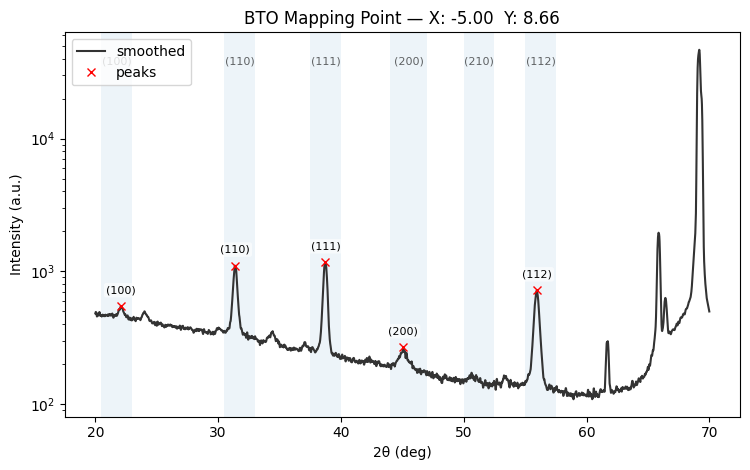


BTO_Mapping_Theta2Theta_08-10-2025_001_23_-10-000_17-321.xy  peaks: 5
  (100)    [R1]   22.090°   I≈563.5   FWHM≈1.0907°   Area≈87.84
  (110)    [R2]   31.420°   I≈1084.1   FWHM≈1.7941°   Area≈346.11
  (111)    [R3]   38.730°   I≈1137.7   FWHM≈1.4553°   Area≈382.87
  (200)    [R4]   45.030°   I≈261.6   FWHM≈1.5666°   Area≈95.56
  (112)    [R6]   55.980°   I≈686.8   FWHM≈1.7742°   Area≈297.44


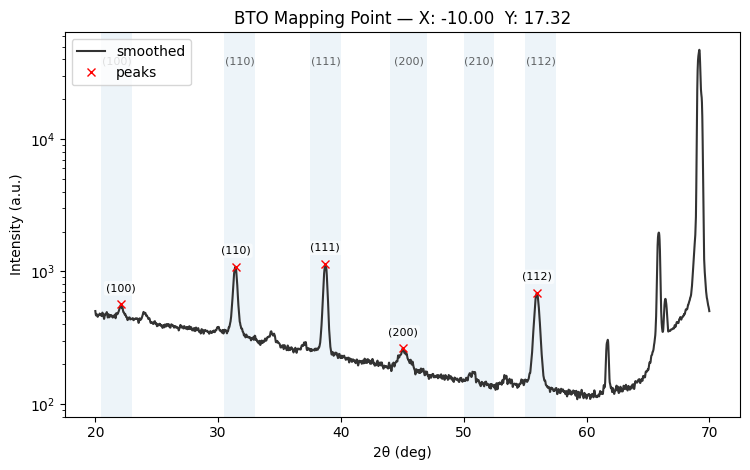


BTO_Mapping_Theta2Theta_08-10-2025_001_24_-15-000_25-981.xy  peaks: 5
  (100)    [R1]   22.060°   I≈556.5   FWHM≈1.0876°   Area≈73.25
  (110)    [R2]   31.390°   I≈1084.6   FWHM≈1.7853°   Area≈340.90
  (111)    [R3]   38.740°   I≈1129.9   FWHM≈1.4412°   Area≈380.22
  (200)    [R4]   45.120°   I≈267.7   FWHM≈1.4593°   Area≈95.34
  (112)    [R6]   55.970°   I≈700.5   FWHM≈1.7655°   Area≈306.53


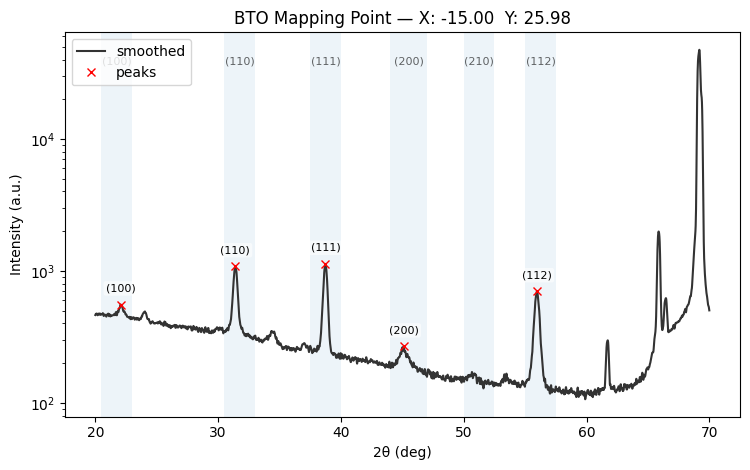


BTO_Mapping_Theta2Theta_08-10-2025_001_25_-20-000_34-641.xy  peaks: 5
  (100)    [R1]   22.120°   I≈582.5   FWHM≈1.0574°   Area≈75.17
  (110)    [R2]   31.430°   I≈1112.6   FWHM≈1.7671°   Area≈365.39
  (111)    [R3]   38.750°   I≈1107.2   FWHM≈1.4277°   Area≈353.46
  (200)    [R4]   45.150°   I≈294.8   FWHM≈1.5752°   Area≈86.37
  (112)    [R6]   56.000°   I≈690.4   FWHM≈1.7478°   Area≈287.58


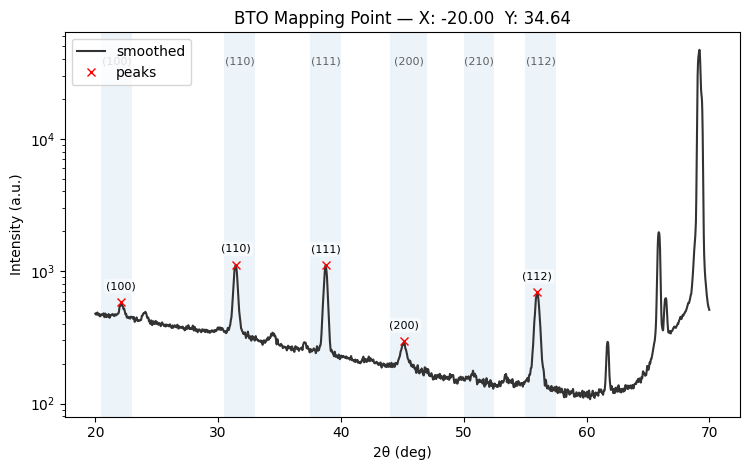


BTO_Mapping_Theta2Theta_08-10-2025_001_26_-8-090_5-878.xy  peaks: 6
  (100)    [R1]   22.070°   I≈540.1   FWHM≈1.1388°   Area≈74.08
  (110)    [R2]   31.380°   I≈1170.5   FWHM≈1.8142°   Area≈366.75
  (111)    [R3]   38.720°   I≈1217.5   FWHM≈1.4684°   Area≈412.70
  (200)    [R4]   45.100°   I≈260.0   FWHM≈1.4811°   Area≈99.50
  (210)    [R5]   50.640°   I≈178.3   FWHM≈1.1217°   Area≈24.29
  (112)    [R6]   55.940°   I≈715.1   FWHM≈1.8058°   Area≈327.26


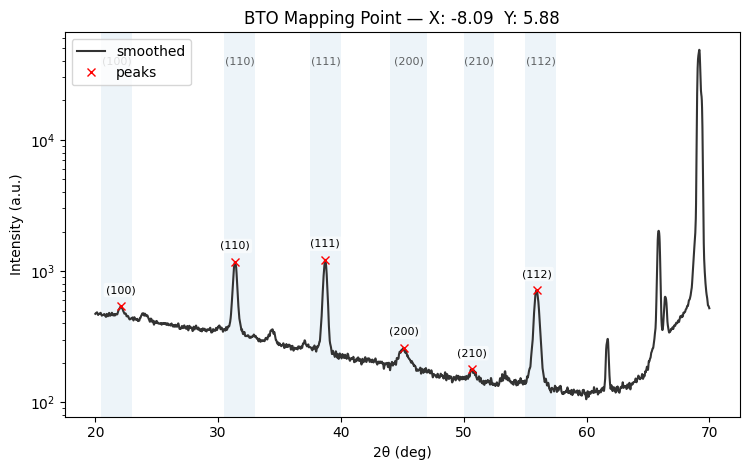


BTO_Mapping_Theta2Theta_08-10-2025_001_27_-16-180_11-756.xy  peaks: 6
  (100)    [R1]   22.070°   I≈548.6   FWHM≈1.1432°   Area≈58.26
  (110)    [R2]   31.370°   I≈1506.5   FWHM≈1.8071°   Area≈494.68
  (111)    [R3]   38.690°   I≈1157.1   FWHM≈1.4744°   Area≈398.15
  (200)    [R4]   45.070°   I≈270.4   FWHM≈1.3760°   Area≈94.86
  (210)    [R5]   50.690°   I≈193.5   FWHM≈1.2264°   Area≈51.06
  (112)    [R6]   55.900°   I≈696.2   FWHM≈1.8231°   Area≈317.30


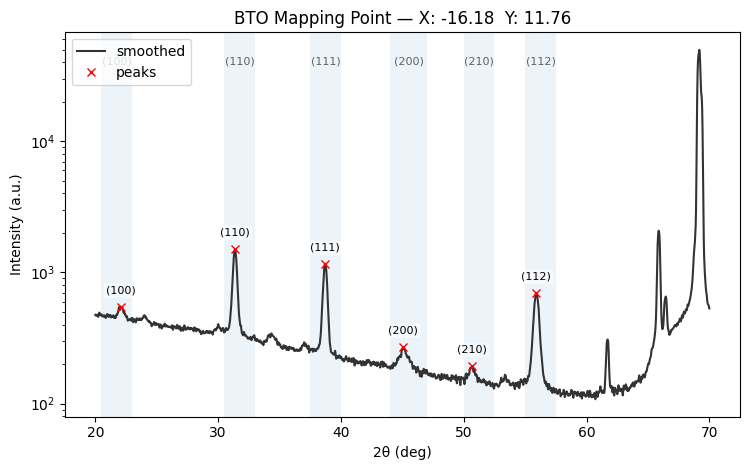


BTO_Mapping_Theta2Theta_08-10-2025_001_28_-24-271_17-634.xy  peaks: 6
  (100)    [R1]   22.040°   I≈565.8   FWHM≈1.1407°   Area≈77.98
  (110)    [R2]   31.370°   I≈1885.7   FWHM≈1.8005°   Area≈635.86
  (111)    [R3]   38.740°   I≈1047.6   FWHM≈1.4841°   Area≈350.62
  (200)    [R4]   45.060°   I≈282.3   FWHM≈1.5480°   Area≈98.70
  (210)    [R5]   50.600°   I≈201.2   FWHM≈1.2999°   Area≈48.80
  (112)    [R6]   55.900°   I≈699.5   FWHM≈1.8395°   Area≈317.22


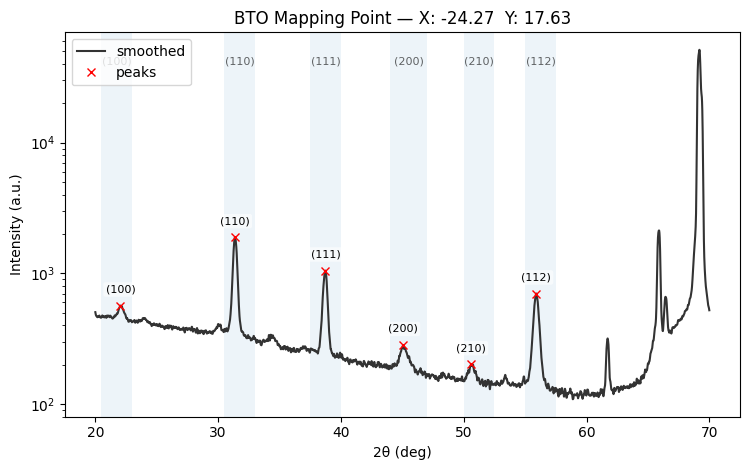


BTO_Mapping_Theta2Theta_08-10-2025_001_29_-32-361_23-511.xy  peaks: 6
  (100)    [R1]   22.090°   I≈599.7   FWHM≈1.1211°   Area≈92.79
  (110)    [R2]   31.380°   I≈2074.1   FWHM≈1.7959°   Area≈707.62
  (111)    [R3]   38.710°   I≈913.7   FWHM≈1.4774°   Area≈318.50
  (200)    [R4]   45.090°   I≈308.6   FWHM≈1.6888°   Area≈110.33
  (210)    [R5]   50.630°   I≈219.3   FWHM≈1.4163°   Area≈52.60
  (112)    [R6]   55.910°   I≈686.9   FWHM≈1.8488°   Area≈313.80


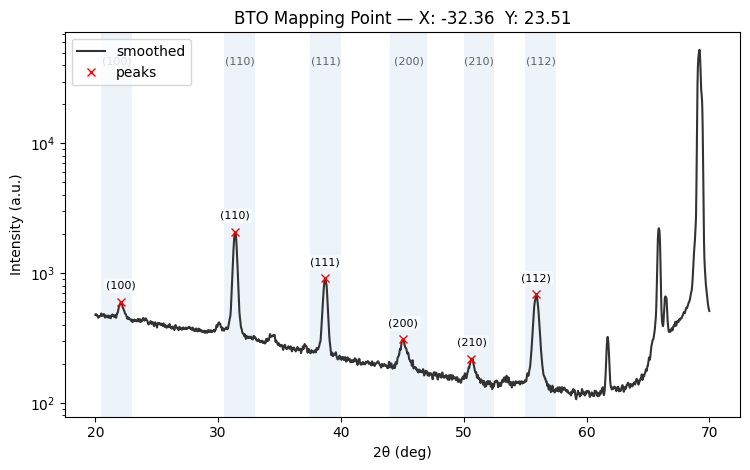


BTO_Mapping_Theta2Theta_08-10-2025_001_30_-9-781_2-079.xy  peaks: 6
  (100)    [R1]   22.020°   I≈543.1   FWHM≈1.1099°   Area≈75.53
  (110)    [R2]   31.370°   I≈1367.4   FWHM≈1.8199°   Area≈441.82
  (111)    [R3]   38.700°   I≈1205.3   FWHM≈1.4835°   Area≈426.55
  (200)    [R4]   45.030°   I≈271.5   FWHM≈1.5408°   Area≈101.95
  (210)    [R5]   50.750°   I≈189.2   FWHM≈1.1760°   Area≈30.29
  (112)    [R6]   55.890°   I≈713.9   FWHM≈1.8316°   Area≈321.85


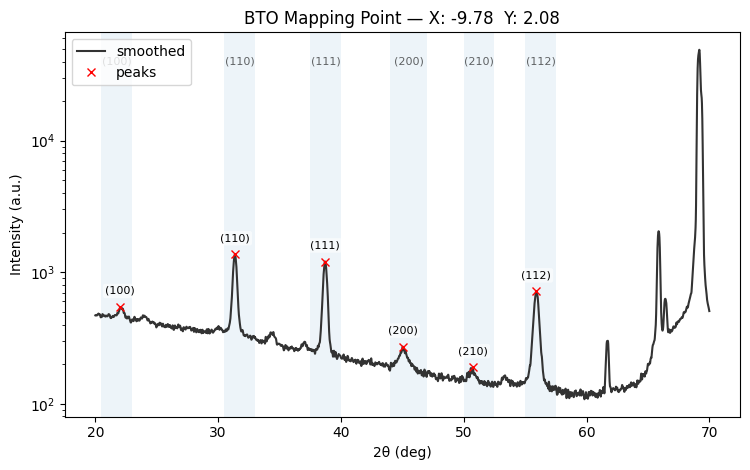


BTO_Mapping_Theta2Theta_08-10-2025_001_31_-19-563_4-158.xy  peaks: 6
  (100)    [R1]   22.150°   I≈590.5   FWHM≈1.1150°   Area≈98.97
  (110)    [R2]   31.370°   I≈2227.8   FWHM≈1.8213°   Area≈788.73
  (111)    [R3]   38.720°   I≈970.6   FWHM≈1.5140°   Area≈330.53
  (200)    [R4]   44.970°   I≈311.1   FWHM≈1.7415°   Area≈95.78
  (210)    [R5]   50.650°   I≈212.3   FWHM≈1.4126°   Area≈40.16
  (112)    [R6]   55.900°   I≈689.5   FWHM≈1.8788°   Area≈321.76


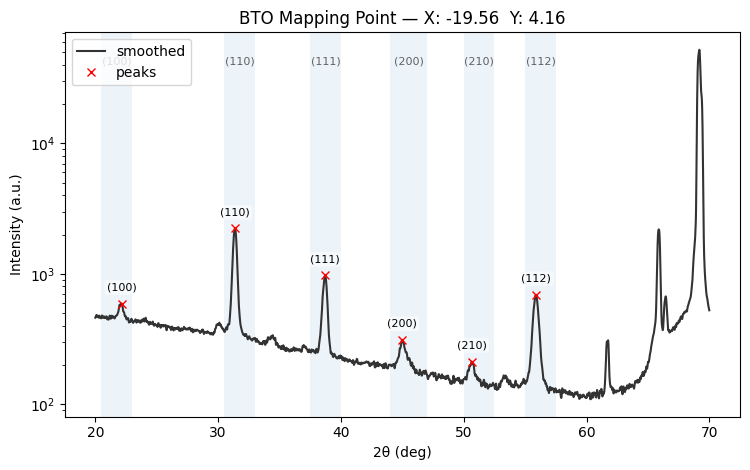


BTO_Mapping_Theta2Theta_08-10-2025_001_32_-29-344_6-237.xy  peaks: 6
  (100)    [R1]   22.040°   I≈710.4   FWHM≈1.1543°   Area≈125.08
  (110)    [R2]   31.360°   I≈2794.2   FWHM≈1.8192°   Area≈998.08
  (111)    [R3]   38.680°   I≈668.6   FWHM≈1.5250°   Area≈218.03
  (200)    [R4]   44.970°   I≈400.1   FWHM≈2.2399°   Area≈156.34
  (210)    [R5]   50.640°   I≈252.5   FWHM≈1.6453°   Area≈56.83
  (112)    [R6]   55.890°   I≈650.8   FWHM≈1.9160°   Area≈310.09


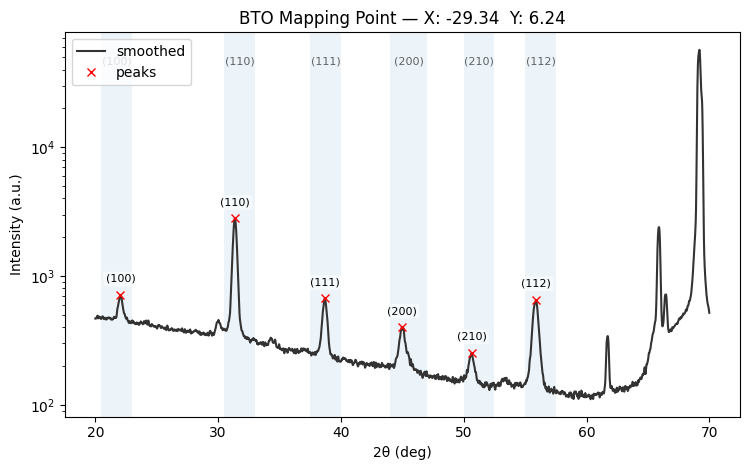


BTO_Mapping_Theta2Theta_08-10-2025_001_33_-39-126_8-316.xy  peaks: 6
  (100)    [R1]   22.040°   I≈825.5   FWHM≈1.1493°   Area≈205.17
  (110)    [R2]   31.360°   I≈3254.3   FWHM≈1.8238°   Area≈1211.62
  (111)    [R3]   38.730°   I≈517.3   FWHM≈1.5377°   Area≈156.76
  (200)    [R4]   44.900°   I≈496.2   FWHM≈2.2841°   Area≈202.85
  (210)    [R5]   50.670°   I≈268.5   FWHM≈1.7311°   Area≈73.09
  (112)    [R6]   55.870°   I≈598.7   FWHM≈1.9210°   Area≈288.02


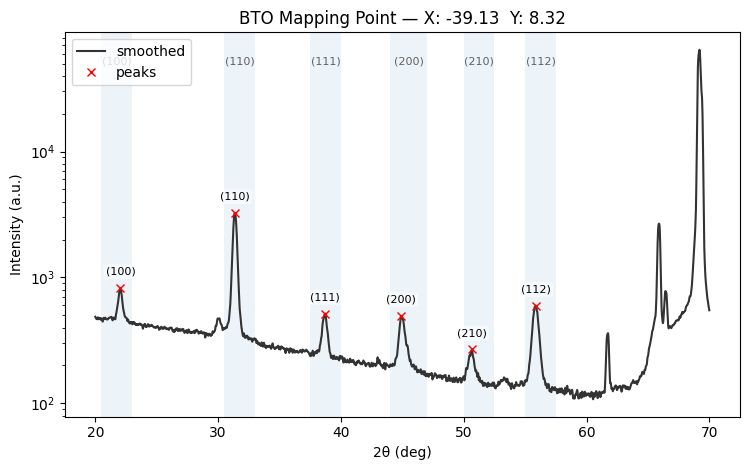


BTO_Mapping_Theta2Theta_08-10-2025_001_34_-9-781_-2-079.xy  peaks: 6
  (100)    [R1]   21.980°   I≈558.4   FWHM≈1.1528°   Area≈65.11
  (110)    [R2]   31.360°   I≈1480.5   FWHM≈1.8242°   Area≈491.48
  (111)    [R3]   38.700°   I≈1228.8   FWHM≈1.4828°   Area≈426.19
  (200)    [R4]   45.070°   I≈277.0   FWHM≈1.5253°   Area≈92.97
  (210)    [R5]   50.620°   I≈192.1   FWHM≈1.2995°   Area≈31.03
  (112)    [R6]   55.920°   I≈714.1   FWHM≈1.8379°   Area≈319.72


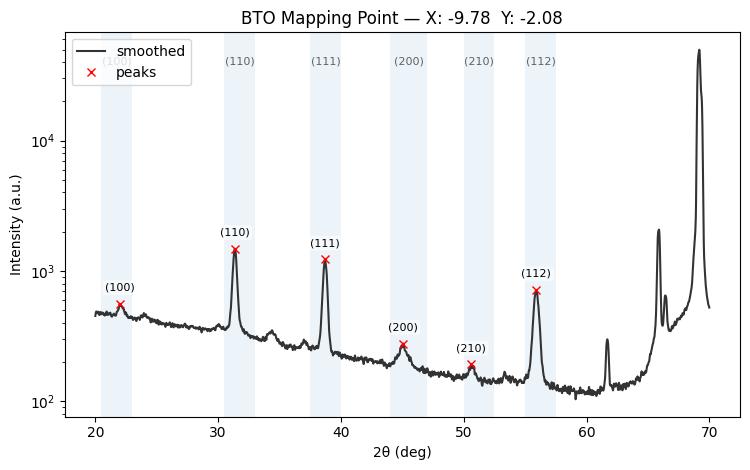


BTO_Mapping_Theta2Theta_08-10-2025_001_35_-19-563_-4-158.xy  peaks: 6
  (100)    [R1]   22.010°   I≈624.5   FWHM≈1.1404°   Area≈109.90
  (110)    [R2]   31.360°   I≈2539.9   FWHM≈1.8235°   Area≈876.47
  (111)    [R3]   38.690°   I≈852.0   FWHM≈1.5230°   Area≈292.03
  (200)    [R4]   44.950°   I≈340.4   FWHM≈1.9264°   Area≈116.13
  (210)    [R5]   50.620°   I≈228.7   FWHM≈1.5928°   Area≈50.28
  (112)    [R6]   55.860°   I≈693.5   FWHM≈1.8999°   Area≈323.92


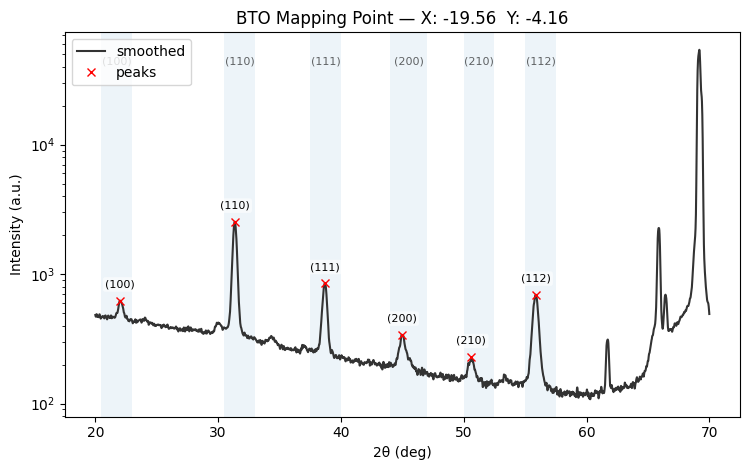


BTO_Mapping_Theta2Theta_08-10-2025_001_36_-29-344_-6-237.xy  peaks: 6
  (100)    [R1]   22.000°   I≈787.1   FWHM≈1.1730°   Area≈193.27
  (110)    [R2]   31.340°   I≈2907.8   FWHM≈1.8435°   Area≈1055.16
  (111)    [R3]   38.690°   I≈569.8   FWHM≈1.5488°   Area≈161.53
  (200)    [R4]   44.930°   I≈482.1   FWHM≈2.2918°   Area≈206.49
  (210)    [R5]   50.630°   I≈253.2   FWHM≈1.6807°   Area≈66.17
  (112)    [R6]   55.840°   I≈673.3   FWHM≈1.9483°   Area≈335.37


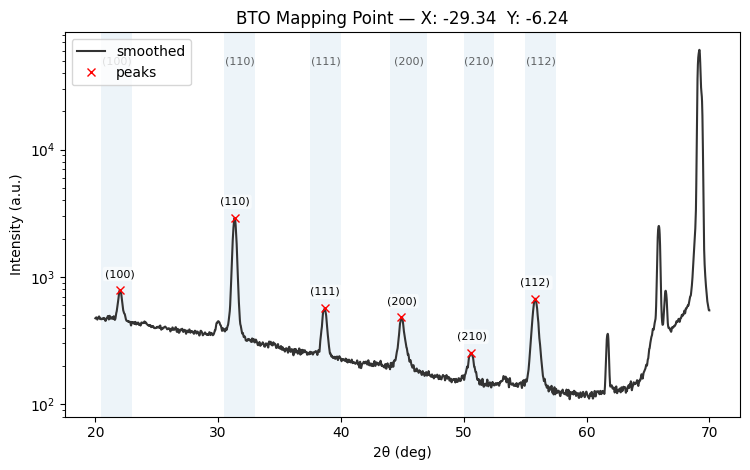


BTO_Mapping_Theta2Theta_08-10-2025_001_37_-39-126_-8-316.xy  peaks: 6
  (100)    [R1]   21.980°   I≈816.6   FWHM≈1.1932°   Area≈168.01
  (110)    [R2]   31.320°   I≈4323.7   FWHM≈1.8583°   Area≈1582.62
  (111)    [R3]   38.660°   I≈481.3   FWHM≈1.5698°   Area≈127.41
  (200)    [R4]   44.880°   I≈518.0   FWHM≈2.3590°   Area≈223.82
  (210)    [R5]   50.570°   I≈271.9   FWHM≈1.8603°   Area≈65.09
  (112)    [R6]   55.760°   I≈610.1   FWHM≈1.9831°   Area≈293.86


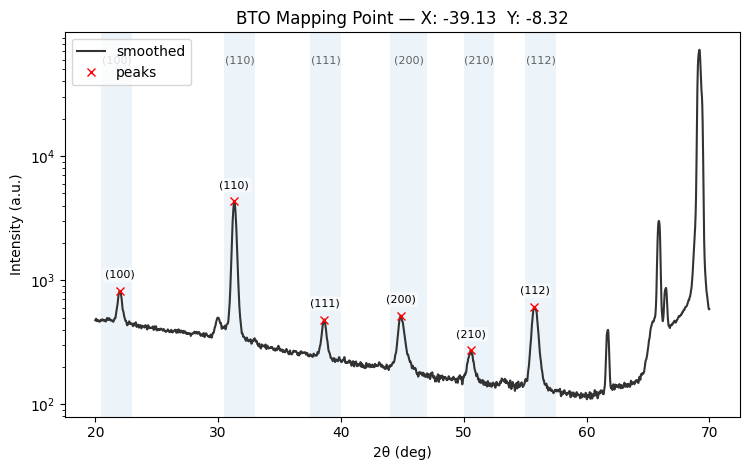


BTO_Mapping_Theta2Theta_08-10-2025_001_38_-8-090_-5-878.xy  peaks: 6
  (100)    [R1]   22.200°   I≈536.4   FWHM≈1.1977°   Area≈60.91
  (110)    [R2]   31.360°   I≈1403.8   FWHM≈1.8261°   Area≈467.09
  (111)    [R3]   38.690°   I≈1219.7   FWHM≈1.4839°   Area≈418.04
  (200)    [R4]   45.040°   I≈270.0   FWHM≈1.5362°   Area≈73.32
  (210)    [R5]   50.620°   I≈191.0   FWHM≈1.2838°   Area≈32.18
  (112)    [R6]   55.930°   I≈723.0   FWHM≈1.8349°   Area≈330.54


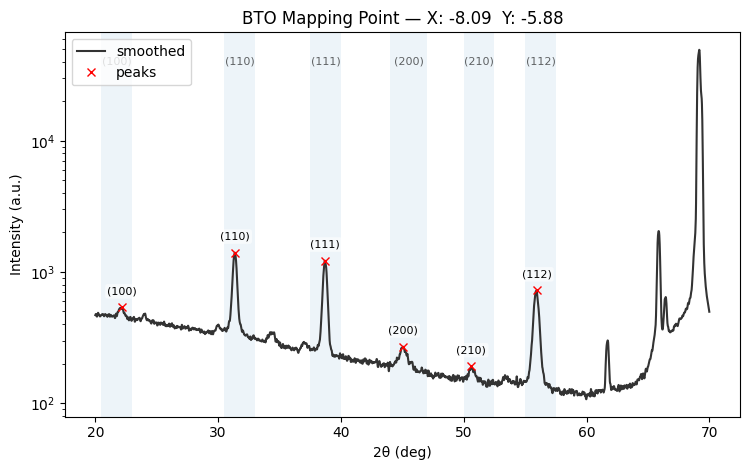


BTO_Mapping_Theta2Theta_08-10-2025_001_39_-16-180_-11-756.xy  peaks: 6
  (100)    [R1]   22.020°   I≈613.5   FWHM≈1.1379°   Area≈100.67
  (110)    [R2]   31.340°   I≈2410.4   FWHM≈1.8314°   Area≈848.32
  (111)    [R3]   38.690°   I≈941.9   FWHM≈1.5255°   Area≈342.56
  (200)    [R4]   45.060°   I≈333.9   FWHM≈1.8547°   Area≈126.83
  (210)    [R5]   50.560°   I≈227.1   FWHM≈1.5348°   Area≈48.45
  (112)    [R6]   55.880°   I≈689.0   FWHM≈1.9063°   Area≈323.73


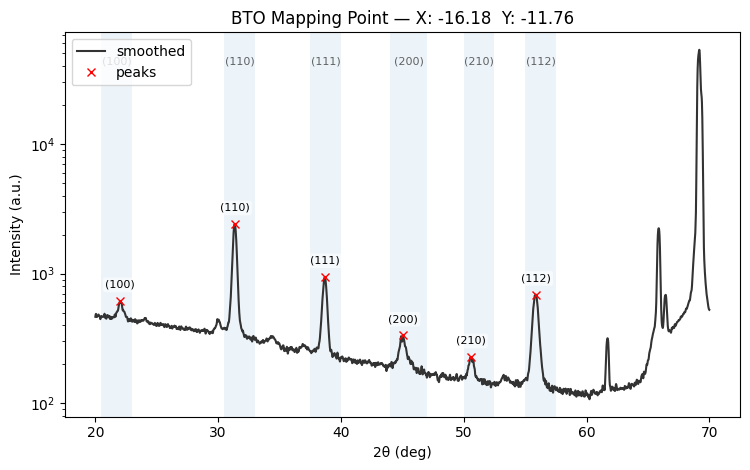


BTO_Mapping_Theta2Theta_08-10-2025_001_40_-24-271_-17-634.xy  peaks: 6
  (100)    [R1]   21.990°   I≈763.4   FWHM≈1.1748°   Area≈176.02
  (110)    [R2]   31.340°   I≈2779.7   FWHM≈1.8513°   Area≈1007.08
  (111)    [R3]   38.610°   I≈611.5   FWHM≈1.5562°   Area≈209.23
  (200)    [R4]   44.960°   I≈461.8   FWHM≈2.2936°   Area≈174.12
  (210)    [R5]   50.590°   I≈260.8   FWHM≈1.7361°   Area≈65.21
  (112)    [R6]   55.820°   I≈686.3   FWHM≈1.9566°   Area≈337.13


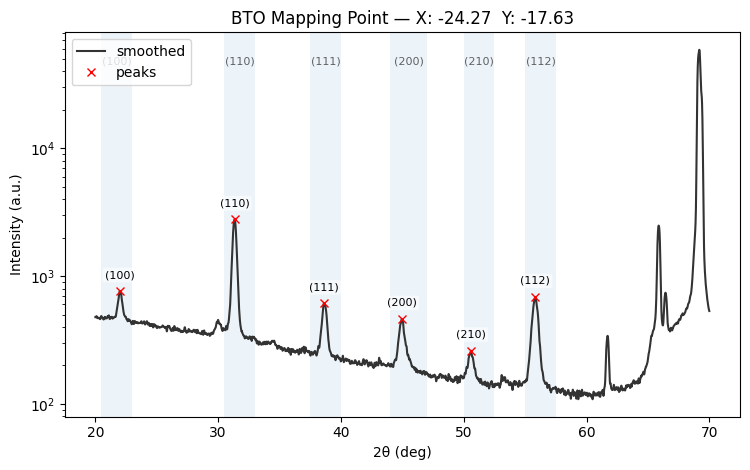


BTO_Mapping_Theta2Theta_08-10-2025_001_41_-32-361_-23-511.xy  peaks: 6
  (100)    [R1]   22.020°   I≈830.9   FWHM≈1.2047°   Area≈184.74
  (110)    [R2]   31.320°   I≈3835.5   FWHM≈1.8619°   Area≈1424.57
  (111)    [R3]   38.640°   I≈486.0   FWHM≈1.5756°   Area≈127.85
  (200)    [R4]   44.900°   I≈528.5   FWHM≈2.3725°   Area≈236.02
  (210)    [R5]   50.530°   I≈285.7   FWHM≈1.9435°   Area≈76.74
  (112)    [R6]   55.770°   I≈648.8   FWHM≈1.9968°   Area≈322.84


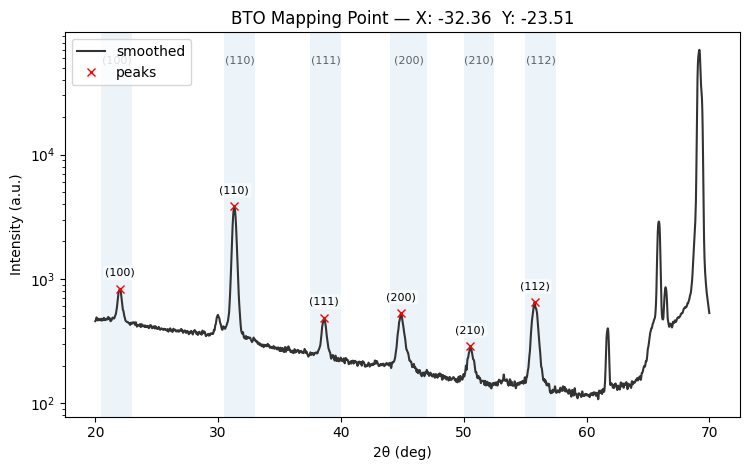


BTO_Mapping_Theta2Theta_08-10-2025_001_42_-5-000_-8-660.xy  peaks: 6
  (100)    [R1]   22.050°   I≈544.1   FWHM≈1.1652°   Area≈64.11
  (110)    [R2]   31.360°   I≈1217.8   FWHM≈1.8270°   Area≈396.19
  (111)    [R3]   38.720°   I≈1239.3   FWHM≈1.4815°   Area≈431.96
  (200)    [R4]   45.020°   I≈267.1   FWHM≈1.6092°   Area≈69.58
  (210)    [R5]   50.770°   I≈183.0   FWHM≈1.1085°   Area≈22.38
  (112)    [R6]   55.930°   I≈731.7   FWHM≈1.8290°   Area≈328.09


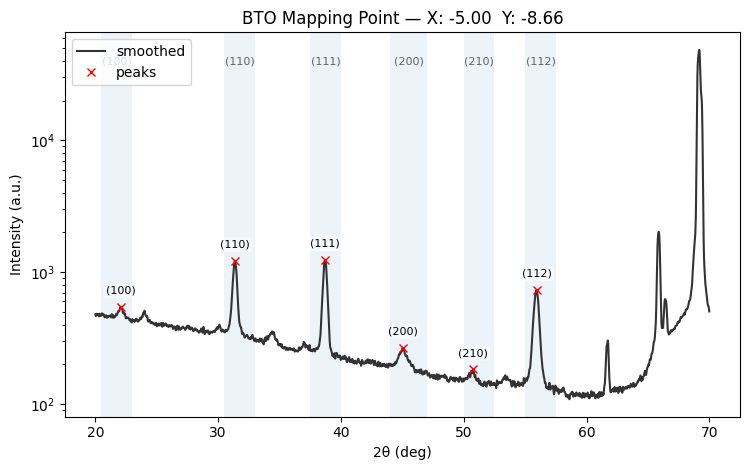


BTO_Mapping_Theta2Theta_08-10-2025_001_43_-10-000_-17-321.xy  peaks: 6
  (100)    [R1]   22.080°   I≈579.7   FWHM≈1.1413°   Area≈65.00
  (110)    [R2]   31.370°   I≈1765.4   FWHM≈1.8347°   Area≈596.18
  (111)    [R3]   38.710°   I≈1183.5   FWHM≈1.5089°   Area≈416.70
  (200)    [R4]   45.030°   I≈295.8   FWHM≈1.6234°   Area≈91.05
  (210)    [R5]   50.630°   I≈206.3   FWHM≈1.3969°   Area≈41.23
  (112)    [R6]   55.850°   I≈719.3   FWHM≈1.8757°   Area≈337.14


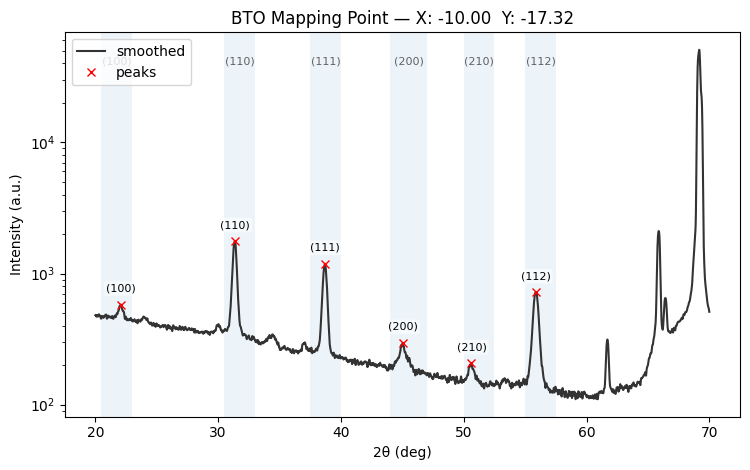


BTO_Mapping_Theta2Theta_08-10-2025_001_44_-15-000_-25-981.xy  peaks: 6
  (100)    [R1]   22.020°   I≈620.1   FWHM≈1.1567°   Area≈114.33
  (110)    [R2]   31.340°   I≈2407.4   FWHM≈1.8416°   Area≈845.52
  (111)    [R3]   38.680°   I≈936.6   FWHM≈1.5517°   Area≈350.84
  (200)    [R4]   44.990°   I≈340.6   FWHM≈1.9056°   Area≈115.36
  (210)    [R5]   50.620°   I≈227.3   FWHM≈1.6173°   Area≈54.61
  (112)    [R6]   55.800°   I≈711.6   FWHM≈1.9234°   Area≈338.82


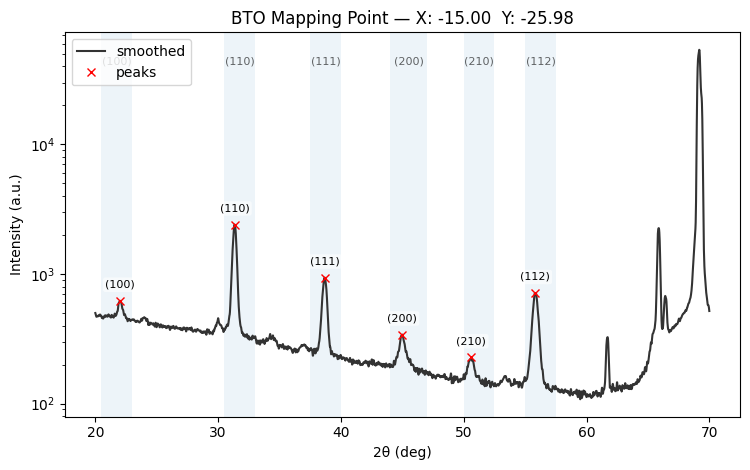


BTO_Mapping_Theta2Theta_08-10-2025_001_45_-20-000_-34-641.xy  peaks: 6
  (100)    [R1]   22.000°   I≈722.3   FWHM≈1.1826°   Area≈133.70
  (110)    [R2]   31.330°   I≈2692.6   FWHM≈1.8536°   Area≈991.37
  (111)    [R3]   38.660°   I≈712.9   FWHM≈1.5484°   Area≈232.59
  (200)    [R4]   44.920°   I≈420.4   FWHM≈2.2881°   Area≈168.22
  (210)    [R5]   50.490°   I≈253.1   FWHM≈1.7609°   Area≈55.37
  (112)    [R6]   55.770°   I≈678.2   FWHM≈1.9633°   Area≈338.10


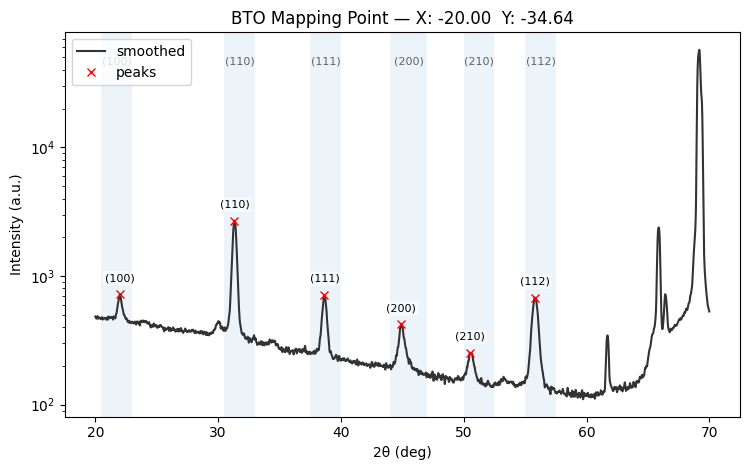


BTO_Mapping_Theta2Theta_08-10-2025_001_46_-1-045_-9-945.xy  peaks: 5
  (100)    [R1]   22.140°   I≈546.4   FWHM≈1.1288°   Area≈67.89
  (110)    [R2]   31.370°   I≈1104.2   FWHM≈1.8162°   Area≈339.79
  (111)    [R3]   38.720°   I≈1243.1   FWHM≈1.4703°   Area≈429.21
  (200)    [R4]   44.980°   I≈274.5   FWHM≈1.5219°   Area≈79.88
  (112)    [R6]   55.930°   I≈732.7   FWHM≈1.8200°   Area≈334.41


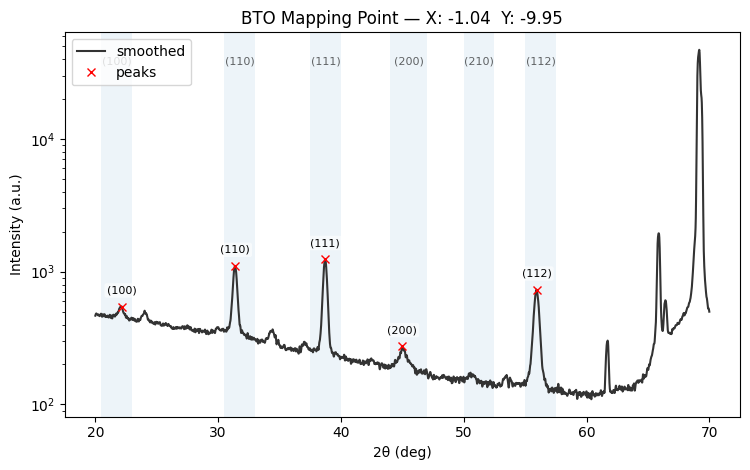


BTO_Mapping_Theta2Theta_08-10-2025_001_47_-2-091_-19-890.xy  peaks: 5
  (100)    [R1]   22.030°   I≈563.2   FWHM≈1.0824°   Area≈97.05
  (110)    [R2]   31.350°   I≈1151.2   FWHM≈1.8256°   Area≈368.33
  (111)    [R3]   38.700°   I≈1257.8   FWHM≈1.4857°   Area≈446.79
  (200)    [R4]   45.070°   I≈272.7   FWHM≈1.5676°   Area≈75.38
  (112)    [R6]   55.930°   I≈764.9   FWHM≈1.8334°   Area≈341.61


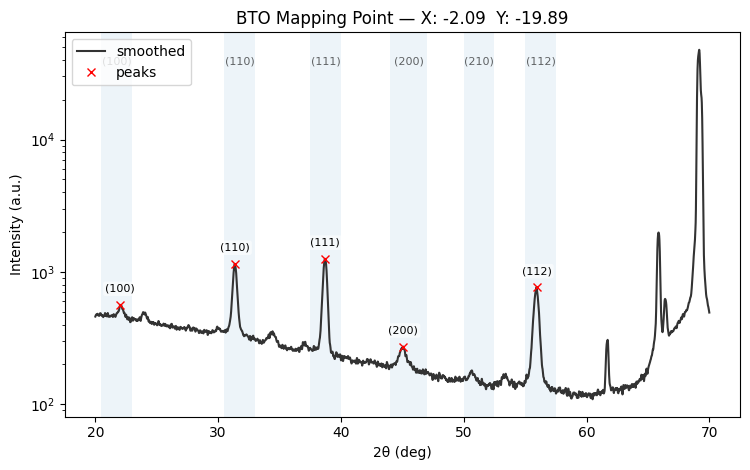


BTO_Mapping_Theta2Theta_08-10-2025_001_48_-3-136_-29-836.xy  peaks: 6
  (100)    [R1]   22.050°   I≈569.4   FWHM≈1.1252°   Area≈70.79
  (110)    [R2]   31.360°   I≈1226.6   FWHM≈1.8376°   Area≈392.67
  (111)    [R3]   38.710°   I≈1285.8   FWHM≈1.5019°   Area≈463.50
  (200)    [R4]   45.050°   I≈283.8   FWHM≈1.7119°   Area≈86.95
  (210)    [R5]   50.590°   I≈187.4   FWHM≈1.2957°   Area≈28.80
  (112)    [R6]   55.890°   I≈759.9   FWHM≈1.8631°   Area≈351.66


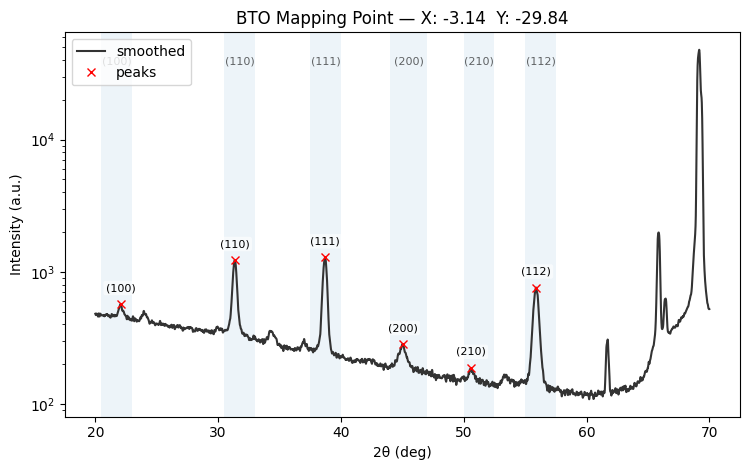


BTO_Mapping_Theta2Theta_08-10-2025_001_49_-4-181_-39-781.xy  peaks: 6
  (100)    [R1]   22.040°   I≈585.3   FWHM≈1.1551°   Area≈87.34
  (110)    [R2]   31.370°   I≈1371.3   FWHM≈1.8350°   Area≈435.99
  (111)    [R3]   38.700°   I≈1254.2   FWHM≈1.5035°   Area≈450.28
  (200)    [R4]   45.050°   I≈294.7   FWHM≈1.6390°   Area≈95.62
  (210)    [R5]   50.650°   I≈191.6   FWHM≈1.3047°   Area≈26.17
  (112)    [R6]   55.870°   I≈790.3   FWHM≈1.8538°   Area≈357.67


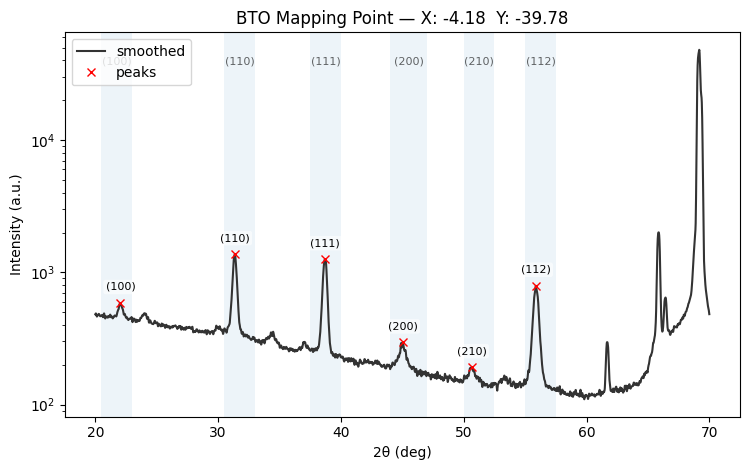


BTO_Mapping_Theta2Theta_08-10-2025_001_50_3-090_-9-511.xy  peaks: 5
  (100)    [R1]   22.080°   I≈556.7   FWHM≈1.0856°   Area≈70.52
  (110)    [R2]   31.380°   I≈1129.6   FWHM≈1.8083°   Area≈383.08
  (111)    [R3]   38.720°   I≈1187.6   FWHM≈1.4654°   Area≈405.54
  (200)    [R4]   45.060°   I≈275.1   FWHM≈1.5634°   Area≈85.99
  (112)    [R6]   55.930°   I≈693.1   FWHM≈1.8019°   Area≈316.89


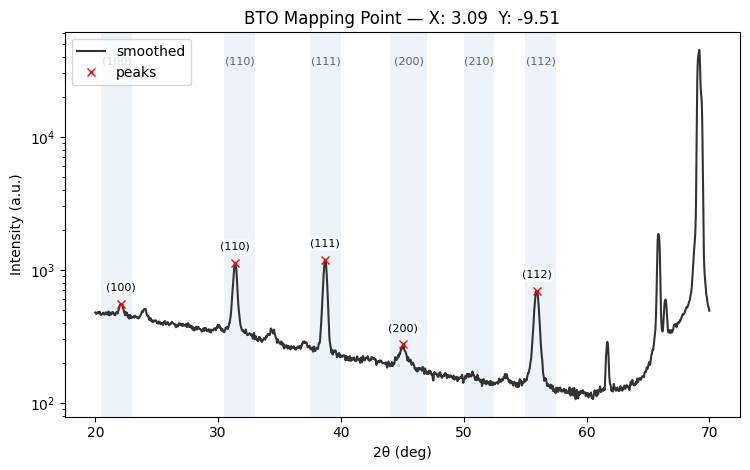


BTO_Mapping_Theta2Theta_08-10-2025_001_51_6-180_-19-021.xy  peaks: 5
  (100)    [R1]   22.060°   I≈565.3   FWHM≈1.1492°   Area≈71.60
  (110)    [R2]   31.370°   I≈1166.4   FWHM≈1.8147°   Area≈372.40
  (111)    [R3]   38.740°   I≈1195.6   FWHM≈1.4761°   Area≈399.46
  (200)    [R4]   45.020°   I≈282.0   FWHM≈1.5568°   Area≈92.05
  (112)    [R6]   55.970°   I≈692.4   FWHM≈1.8097°   Area≈306.19


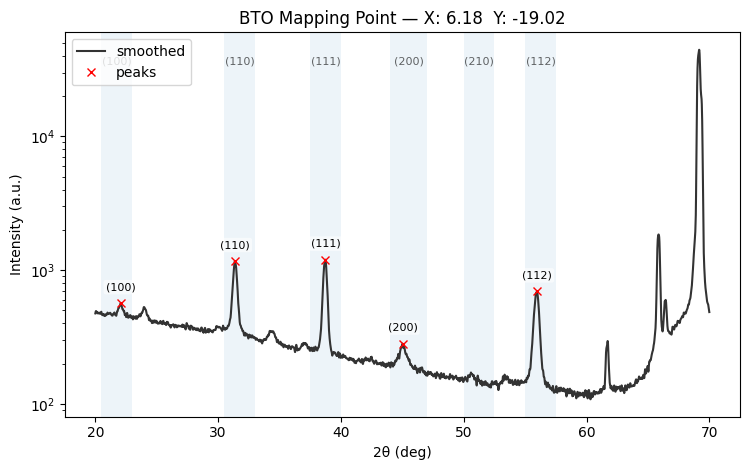


BTO_Mapping_Theta2Theta_08-10-2025_001_52_9-271_-28-532.xy  peaks: 5
  (100)    [R1]   22.050°   I≈545.1   FWHM≈1.2567°   Area≈74.70
  (110)    [R2]   31.400°   I≈1246.6   FWHM≈1.8144°   Area≈413.15
  (111)    [R3]   38.730°   I≈1138.5   FWHM≈1.4764°   Area≈366.33
  (200)    [R4]   45.020°   I≈279.9   FWHM≈1.5963°   Area≈89.32
  (112)    [R6]   55.930°   I≈690.4   FWHM≈1.8005°   Area≈296.67


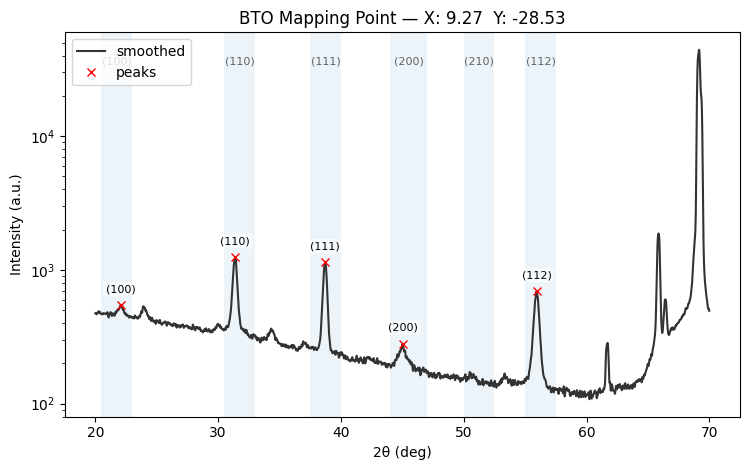


BTO_Mapping_Theta2Theta_08-10-2025_001_53_12-361_-38-042.xy  peaks: 4
  (110)    [R2]   31.380°   I≈1336.4   FWHM≈1.8268°   Area≈442.96
  (111)    [R3]   38.710°   I≈1069.8   FWHM≈1.4762°   Area≈346.08
  (200)    [R4]   45.120°   I≈259.9   FWHM≈1.4292°   Area≈71.30
  (112)    [R6]   55.950°   I≈632.9   FWHM≈1.7978°   Area≈278.64


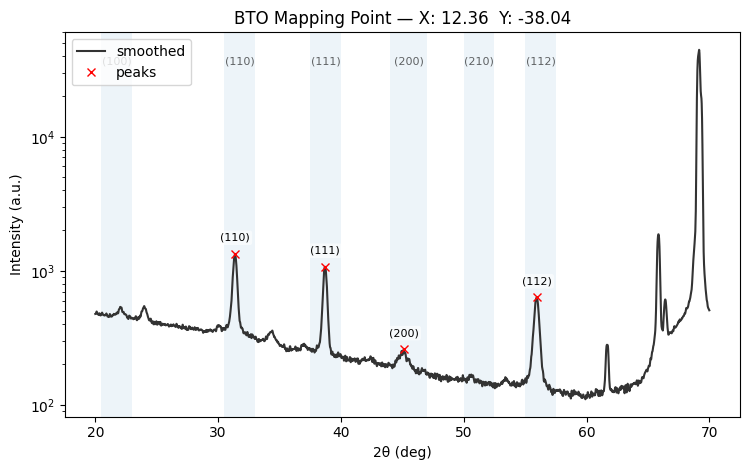


BTO_Mapping_Theta2Theta_08-10-2025_001_54_6-691_-7-431.xy  peaks: 5
  (100)    [R1]   22.000°   I≈541.4   FWHM≈1.2091°   Area≈68.52
  (110)    [R2]   31.370°   I≈1210.2   FWHM≈1.8052°   Area≈397.38
  (111)    [R3]   38.730°   I≈1126.5   FWHM≈1.4624°   Area≈354.31
  (200)    [R4]   45.070°   I≈263.9   FWHM≈1.4734°   Area≈77.92
  (112)    [R6]   55.980°   I≈638.6   FWHM≈1.7991°   Area≈273.95


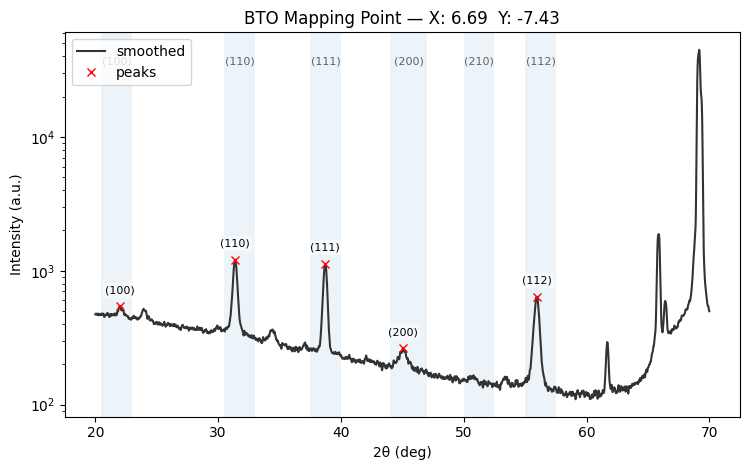


BTO_Mapping_Theta2Theta_08-10-2025_001_55_13-383_-14-863.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1236.6   FWHM≈1.8188°   Area≈428.42
  (111)    [R3]   38.720°   I≈1015.8   FWHM≈1.4774°   Area≈330.95
  (200)    [R4]   45.120°   I≈251.8   FWHM≈1.6148°   Area≈70.95
  (112)    [R6]   55.910°   I≈571.5   FWHM≈1.8092°   Area≈262.02


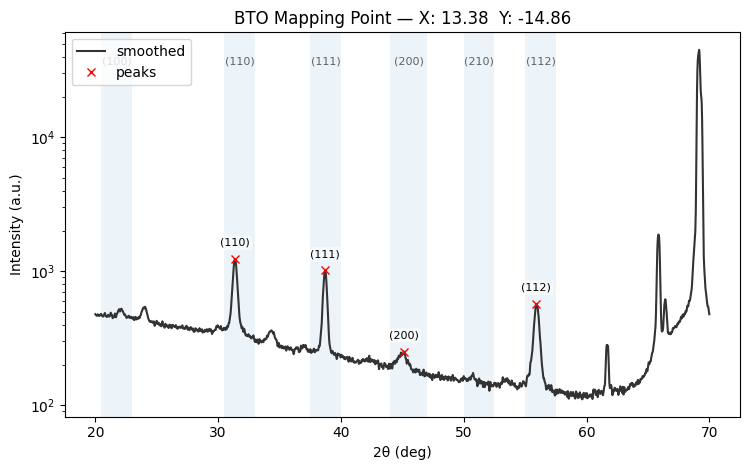


BTO_Mapping_Theta2Theta_08-10-2025_001_56_20-074_-22-294.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1138.0   FWHM≈1.8425°   Area≈381.19
  (111)    [R3]   38.700°   I≈929.1   FWHM≈1.4835°   Area≈300.77
  (200)    [R4]   44.840°   I≈249.1   FWHM≈1.5802°   Area≈56.42
  (112)    [R6]   55.940°   I≈493.8   FWHM≈1.8392°   Area≈215.87


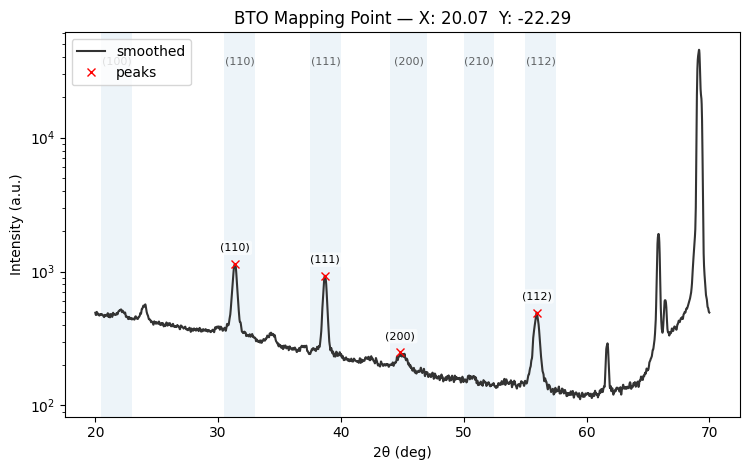


BTO_Mapping_Theta2Theta_08-10-2025_001_57_26-765_-29-726.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1121.9   FWHM≈1.8424°   Area≈366.39
  (111)    [R3]   38.700°   I≈851.2   FWHM≈1.4904°   Area≈274.14
  (200)    [R4]   45.060°   I≈251.1   FWHM≈1.6529°   Area≈77.31
  (112)    [R6]   55.910°   I≈417.3   FWHM≈1.8201°   Area≈173.10


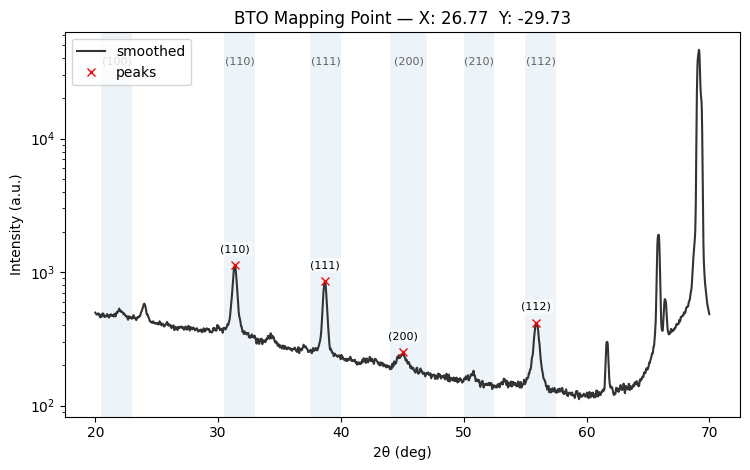


BTO_Mapping_Theta2Theta_08-10-2025_001_58_9-135_-4-067.xy  peaks: 6
  (100)    [R1]   22.040°   I≈537.8   FWHM≈1.1835°   Area≈65.01
  (110)    [R2]   31.390°   I≈1233.9   FWHM≈1.8123°   Area≈417.22
  (111)    [R3]   38.720°   I≈1060.5   FWHM≈1.4574°   Area≈339.78
  (200)    [R4]   45.040°   I≈252.6   FWHM≈1.5823°   Area≈74.48
  (210)    [R5]   50.700°   I≈175.6   FWHM≈0.9732°   Area≈17.91
  (112)    [R6]   55.940°   I≈594.8   FWHM≈1.7988°   Area≈263.62


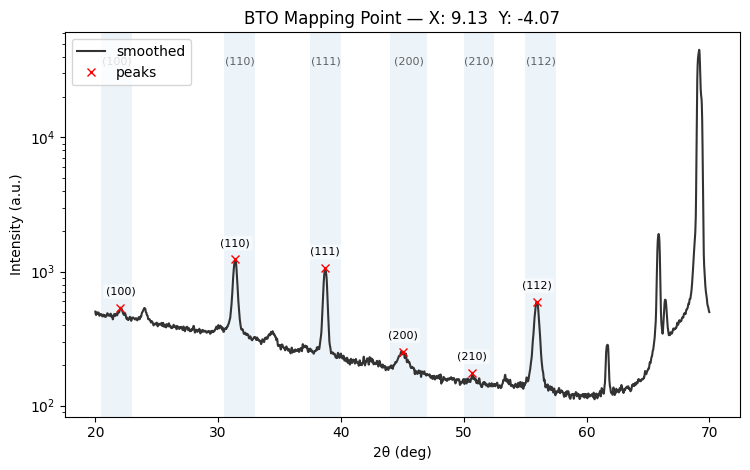


BTO_Mapping_Theta2Theta_08-10-2025_001_59_18-271_-8-135.xy  peaks: 4
  (110)    [R2]   31.380°   I≈1116.6   FWHM≈1.8370°   Area≈382.25
  (111)    [R3]   38.700°   I≈908.2   FWHM≈1.4677°   Area≈280.07
  (200)    [R4]   45.110°   I≈244.0   FWHM≈1.5545°   Area≈70.62
  (112)    [R6]   55.930°   I≈474.6   FWHM≈1.8191°   Area≈206.71


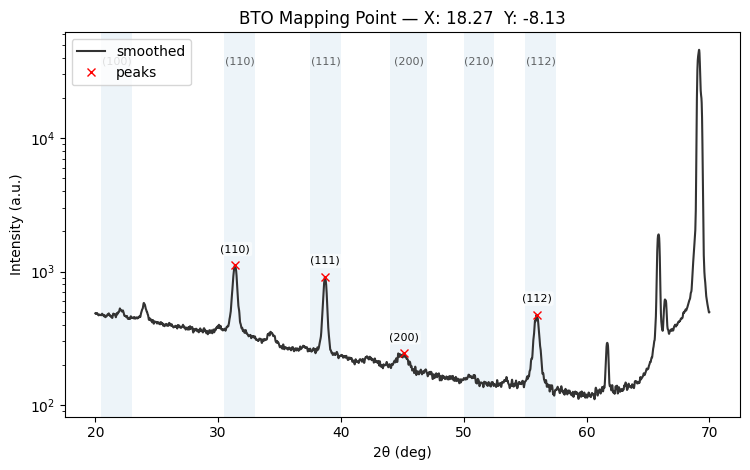


BTO_Mapping_Theta2Theta_08-10-2025_001_60_27-406_-12-202.xy  peaks: 4
  (110)    [R2]   31.370°   I≈1035.2   FWHM≈1.8549°   Area≈338.10
  (111)    [R3]   38.700°   I≈805.2   FWHM≈1.4886°   Area≈256.41
  (200)    [R4]   45.170°   I≈247.7   FWHM≈1.5318°   Area≈64.77
  (112)    [R6]   55.840°   I≈361.7   FWHM≈1.8676°   Area≈154.30


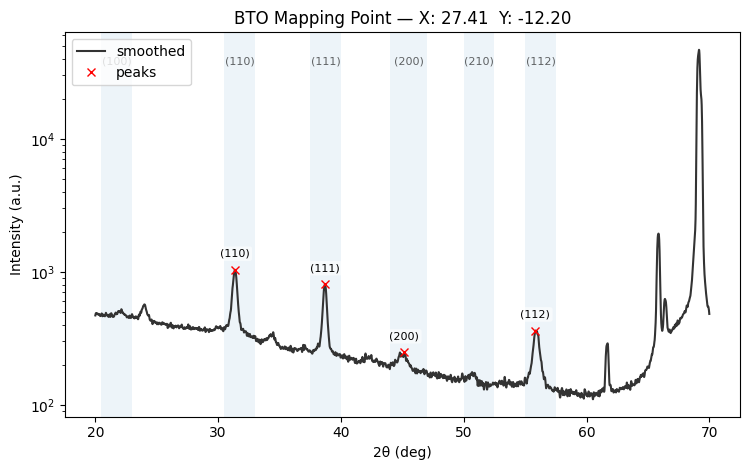


BTO_Mapping_Theta2Theta_08-10-2025_001_61_36-542_-16-269.xy  peaks: 5
  (110)    [R2]   31.330°   I≈1043.9   FWHM≈1.8554°   Area≈363.05
  (111)    [R3]   38.670°   I≈679.2   FWHM≈1.5039°   Area≈210.82
  (200)    [R4]   44.940°   I≈240.1   FWHM≈1.5152°   Area≈70.37
  (210)    [R5]   50.640°   I≈186.4   FWHM≈1.1190°   Area≈21.89
  (112)    [R6]   55.990°   I≈299.2   FWHM≈1.5926°   Area≈119.86


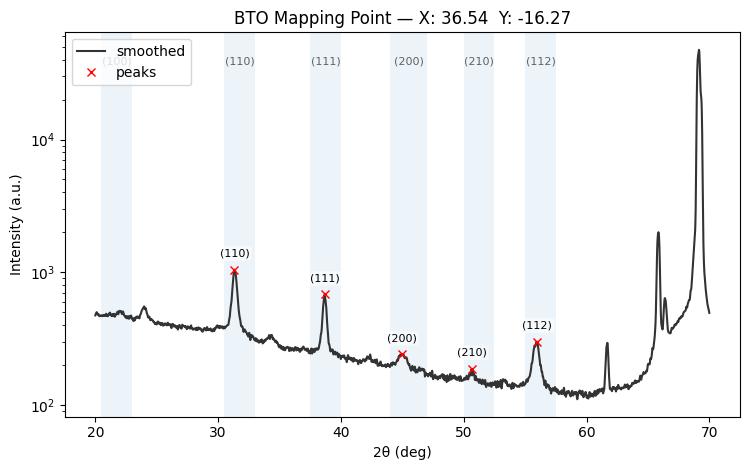


=== Summary ===
Number of files processed: 61
Results shape (FWHM): (61, 6)
Peak intensity shape: (61, 6)
Peak areas shape: (61, 6)
Coordinates: 61 x, 61 y

FWHM statistics (excluding NaN):
  (100): min=1.0574°, max=1.2567°, mean=1.1459°
  (110): min=1.7671°, max=1.8634°, mean=1.8218°
  (111): min=1.4277°, max=1.5756°, mean=1.4856°
  (200): min=1.3161°, max=2.3725°, mean=1.6467°
  (210): min=0.9595°, max=1.9435°, mean=1.4058°
  (112): min=1.3196°, max=1.9968°, mean=1.8030°

Integrated Area statistics (excluding NaN):
  (100): min=53.97, max=205.17, mean=94.32
  (110): min=321.36, max=1582.62, mean=520.08
  (111): min=127.41, max=463.50, mean=308.68
  (200): min=48.60, max=236.02, mean=91.93
  (210): min=17.91, max=76.74, mean=43.26
  (112): min=91.66, max=357.67, mean=261.91


In [3]:
# ---------- settings ----------
pattern       = "*.xy"
window_pts    = 12
polyorder     = 2
min_sep_deg   = 0.25
width_deg     = (0.06, 1.2)
ratio_min     = 1.2
frac_min      = 0.00

# Initialize storage: list of dictionaries, one per file
all_file_results = []
x_coordinates = []
y_coordinates = []

# Define your search windows (lo, hi) and their names (same order!)
REGIONS = [
    (20.5, 23.0),   # e.g. (100)
    (30.5, 33.0),   # e.g. (110)
    (37.5, 40.0),   # e.g. (111) or whatever you expect
    (44.0, 47.0),   # e.g. (200)
    (50.0, 52.5),   # e.g. (210)
    (55.0, 57.5),   # e.g. (300)
]
REGION_NAMES = ["(100)", "(110)", "(111)", "(200)", "(210)", "(112)"]  # <- set to your BTO planes

# ------------------------------
def _safe_window(n, w, p):
    if n < 5:
        return None, None
    w = min(w, n - (1 - (n % 2)))
    if w % 2 == 0: w += 1
    w = max(5, w)
    p = min(p, w - 2)
    return w, p

files = sorted(glob.glob(pattern))
for fp in files:
    data = np.loadtxt(fp)
    x, y = data[:,0], data[:,1]
    step = float(np.mean(np.diff(x)))

    # smooth for visuals
    w_use, p_use = _safe_window(len(x), window_pts, polyorder)
    ys = savgol_filter(y, w_use, p_use, mode="interp") if w_use is not None else y.copy()

    distance = max(1, int(min_sep_deg/step))
    width_s  = (max(1, int(width_deg[0]/step)), max(2, int(width_deg[1]/step)))

    # Storage for THIS file: we'll store 6 values (one per region)
    file_fwhm = np.full(6, np.nan)      # Initialize with NaN
    file_intensity = np.full(6, np.nan)
    file_area = np.full(6, np.nan)
    file_peak_positions = [None] * 6
    
    all_peaks_idx = []
    all_fwhm_deg  = []
    all_area      = []
    all_region_id = []
    all_Ipk       = []
    all_labels    = []

    # counters per region for numbering multiple peaks
    per_region_count = {i: 0 for i in range(1, len(REGIONS)+1)}

    for rid, (lo, hi) in enumerate(REGIONS, start=1):
        m = (x >= lo) & (x <= hi)
        if np.count_nonzero(m) < 7:
            continue

        xr  = x[m]
        yr  = ys[m]
        idx0 = np.nonzero(m)[0][0]

        # coarse candidates
        cand_r, prop = find_peaks(yr, distance=distance, width=width_s)
        if cand_r.size == 0:
            continue

        keep_r = []
        for i, pk in enumerate(cand_r):
            lb = prop["left_bases"][i]
            rb = prop["right_bases"][i]
            base = max(yr[lb], yr[rb])
            amp  = yr[pk] - base
            if amp <= 0:                                  continue
            if yr[pk] / max(base, 1e-9) < ratio_min:     continue
            if amp < frac_min * base:                    continue
            keep_r.append(i)

        if not keep_r:
            continue

        peaks_r = cand_r[keep_r]
        widths, w_left, w_right, _ = peak_widths(yr, peaks_r, rel_height=0.5)

        idx_axis = np.arange(len(xr), dtype=float)
        left_x   = np.interp(w_left,  idx_axis, xr)
        right_x  = np.interp(w_right, idx_axis, xr)
        fwhm_deg = np.abs(right_x - left_x)  # Ensure positive FWHM

        for j, pk in enumerate(peaks_r):
            lb = prop["left_bases"][keep_r[j]]
            rb = prop["right_bases"][keep_r[j]]

            # Get baseline points
            x_lb, y_lb = xr[lb], yr[lb]
            x_rb, y_rb = xr[rb], yr[rb]

            # Define integration limits: use the base points as limits
            # (these are typically wider than FWHM)
            lx, rx = x_lb, x_rb
            
            # Make sure lx < rx
            if lx >= rx:
                lx = left_x[j]
                rx = right_x[j]
            
            # Get all points in the integration region
            seg_mask = (xr >= lx) & (xr <= rx)
            
            if np.count_nonzero(seg_mask) < 2:
                # Fallback: use a window around the peak
                k0 = max(0, pk - 3)
                k1 = min(len(xr), pk + 4)
                seg_mask = np.zeros_like(xr, dtype=bool)
                seg_mask[k0:k1] = True
            
            # Get x and y values in integration region
            xs = xr[seg_mask]
            ys_seg = yr[seg_mask]
            
            # Calculate linear baseline
            if x_rb != x_lb:
                slope = (y_rb - y_lb) / (x_rb - x_lb)
                y_base = y_lb + slope * (xs - x_lb)
            else:
                y_base = np.full_like(xs, np.mean([y_lb, y_rb]))
            
            # Integrate: area above baseline
            area = np.trapz(np.maximum(ys_seg - y_base, 0.0), xs)
            
            # Alternative: simpler rectangular approximation if trapz gives issues
            if area == 0.0 or not np.isfinite(area):
                # Use peak height times FWHM as approximation (Gaussian-like)
                peak_height = yr[pk] - np.mean([y_lb, y_rb])
                area = peak_height * fwhm_deg[j] * 0.5 * np.sqrt(np.pi / np.log(2))

            gi = idx0 + pk
            all_peaks_idx.append(gi)
            all_fwhm_deg.append(float(fwhm_deg[j]))
            all_area.append(float(area))
            all_region_id.append(rid)
            all_Ipk.append(float(yr[pk]))

            # --- NAME the peak ---
            base_name = REGION_NAMES[rid-1] if rid-1 < len(REGION_NAMES) else f"R{rid}"
            per_region_count[rid] += 1
            label = base_name if per_region_count[rid] == 1 else f"{base_name}-{per_region_count[rid]}"
            all_labels.append(label)
            
            # Store in region array (use first peak if multiple)
            if per_region_count[rid] == 1:
                file_fwhm[rid-1] = float(fwhm_deg[j])
                file_intensity[rid-1] = float(yr[pk])
                file_area[rid-1] = float(area)
                file_peak_positions[rid-1] = float(x[gi])

    # ---- output ----
    print(f"\n{os.path.basename(fp)}  peaks: {len(all_peaks_idx)}")
    for lbl, rid, gi, Ipk, fwhm, area in zip(all_labels, all_region_id, all_peaks_idx, all_Ipk, all_fwhm_deg, all_area):
        print(f"  {lbl:8s} [R{rid}]  {x[gi]:7.3f}°   I≈{Ipk:.1f}   FWHM≈{fwhm:.4f}°   Area≈{area:.2f}")
    
    # ---- plot ----
    plt.figure(figsize=(7.6, 4.8))
    plt.plot(x, ys, label="smoothed", color="0.2")

    # annotate peaks with their names
    if all_peaks_idx:
        p_x = x[np.array(all_peaks_idx)]
        p_y = np.array(all_Ipk)
        plt.plot(p_x, p_y, "rx", label="peaks")
        for (xx, yy, lbl) in zip(p_x, p_y, all_labels):
            plt.annotate(lbl, (xx, yy), xytext=(0, 8), textcoords="offset points",
                         ha="center", va="bottom", fontsize=8, rotation=0,
                         bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6))

    # draw region spans
    for (lo, hi), nm in zip(REGIONS, REGION_NAMES):
        plt.axvspan(lo, hi, alpha=0.08)
        mid = 0.5*(lo+hi)
        plt.text(mid, plt.ylim()[1]*0.85, nm, ha="center", va="top", fontsize=8, alpha=0.6)

    # --- extract X and Y coordinates from filename ---
    name = os.path.basename(fp).rsplit('.', 1)[0]
    parts = name.split('_')
    try:
        x_str, y_str = parts[-2], parts[-1]
        def tok_to_float(t):
            if '-' in t[1:]:
                t = ('-' + t[1:].replace('-', '.', 1)) if t.startswith('-') else t.replace('-', '.', 1)
            return float(t)
        x_val, y_val = tok_to_float(x_str), tok_to_float(y_str)
        x_coordinates.append(x_val)
        y_coordinates.append(y_val)
        title_text = f"BTO Mapping Point — X: {x_val:.2f}  Y: {y_val:.2f}"
    except Exception:
        title_text = "BTO Mapping Point — Coordinates Unknown"

    plt.title(title_text)
    plt.xlabel("2θ (deg)"); plt.ylabel("Intensity (a.u.)")
    plt.yscale("log")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Store results for this file
    all_file_results.append({
        'fwhm': file_fwhm,
        'intensity': file_intensity,
        'area': file_area,
        'peak_positions': file_peak_positions
    })

# Convert to numpy arrays for easier manipulation
results = np.array([f['fwhm'] for f in all_file_results])  # Shape: (n_files, 6)
peak_intensity = np.array([f['intensity'] for f in all_file_results])  # Shape: (n_files, 6)
peak_areas = np.array([f['area'] for f in all_file_results])  # Shape: (n_files, 6)

print(f"\n=== Summary ===")
print(f"Number of files processed: {len(all_file_results)}")
print(f"Results shape (FWHM): {results.shape}")
print(f"Peak intensity shape: {peak_intensity.shape}")
print(f"Peak areas shape: {peak_areas.shape}")
print(f"Coordinates: {len(x_coordinates)} x, {len(y_coordinates)} y")
print(f"\nFWHM statistics (excluding NaN):")
for i, name in enumerate(REGION_NAMES):
    valid_fwhm = results[:, i][~np.isnan(results[:, i])]
    if len(valid_fwhm) > 0:
        print(f"  {name}: min={valid_fwhm.min():.4f}°, max={valid_fwhm.max():.4f}°, mean={valid_fwhm.mean():.4f}°")
    else:
        print(f"  {name}: No valid data")

print(f"\nIntegrated Area statistics (excluding NaN):")
for i, name in enumerate(REGION_NAMES):
    valid_area = peak_areas[:, i][~np.isnan(peak_areas[:, i])]
    if len(valid_area) > 0:
        print(f"  {name}: min={valid_area.min():.2f}, max={valid_area.max():.2f}, mean={valid_area.mean():.2f}")
    else:
        print(f"  {name}: No valid data")

In [4]:
results[:] = np.abs(results)
print(len(x_coordinates), len(y_coordinates), peak_intensity)

61 61 [[ 547.72567133 1098.33081818 1176.89987413  269.42826573           nan
   700.55539161]
 [          nan 1245.7323007   985.71374126  250.1187972            nan
   563.04434266]
 [          nan 1052.92495105  841.34865035  247.76962937           nan
   426.19005594]
 [          nan 1002.15678322  723.03939161  248.99551049           nan
   341.8433986 ]
 [          nan  980.95931469  575.47244056  230.23623776  182.19983217
   265.94764336]
 [          nan 1244.14597902 1001.03987413  244.74299301           nan
   573.25300699]
 [          nan 1066.22472727  835.97114685  240.17623776           nan
   435.68169231]
 [          nan 1015.07572028  697.36791608  242.16508392           nan
   322.57037063]
 [          nan  980.90453846  559.11183217  228.2687972            nan
   258.94081119]
 [          nan 1255.74018881 1030.39359441  253.89972028           nan
   576.8442028 ]
 [          nan 1106.24000699  849.81472727  245.25176224           nan
   451.10440559]
 [          nan

## Contour Line Graphs

### Contour all FWHM

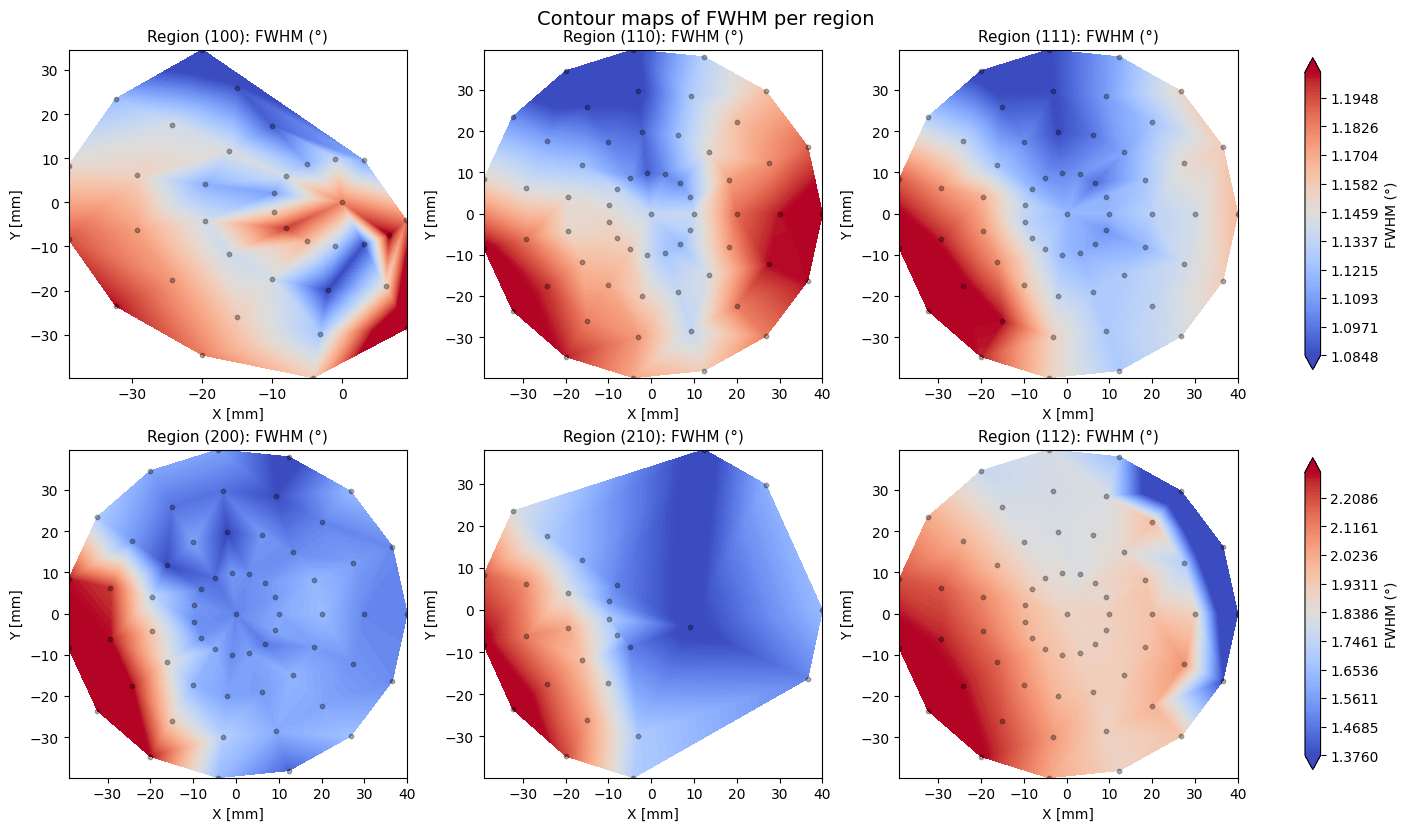

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata

# ---- your inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
fw_raw = np.asarray(results, dtype=float)
N = x_pos.size


# ---- normalize fw_raw into shape (N, 6) ----
def normalize_fwhm(fw_raw, N):
    fw = np.asarray(fw_raw)
    if fw.ndim == 2 and fw.shape == (N, 6):
        return fw
    if fw.ndim == 1 and fw.size == N * 6:
        return fw.reshape(N, 6)
    if fw.ndim == 2 and fw.shape[0] == N * 6 and fw.shape[1] == 6:
        blocks = np.split(fw, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if fw.ndim == 2 and fw.shape == (N * 6, 1):
        return fw.reshape(N, 6)
    raise ValueError(f"Cannot reshape results with shape {fw.shape} to (N,6).")

fwhm = normalize_fwhm(fw_raw, N)

# ---- helpers for plotting ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]


def _contour_one(ax, xs, ys, zs, title, nlevels=100, cmap="coolwarm", try_grid_fallback=True):
    m = np.isfinite(xs) & np.isfinite(ys) & np.isfinite(zs)
    xs, ys, zs = xs[m], ys[m], zs[m]
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    if len(xs) < 3:
        ax.text(0.5, 0.5, "Too few points", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    # robust color limits
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin, vmax = float(np.nanmin(zs)), float(np.nanmax(zs))
        if not np.isfinite(vmin) or vmin == vmax:
            ax.text(0.5, 0.5, "No variation", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

    # triangulation or grid fallback
    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(tri, zs, levels=np.linspace(vmin, vmax, nlevels),
                            extend='both', cmap=cmap)
    except Exception:
        if not try_grid_fallback:
            ax.text(0.5, 0.5, "Triangulation failed", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        gx = np.linspace(xs.min(), xs.max(), 60)
        gy = np.linspace(ys.min(), ys.max(), 60)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method='linear')
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method='nearest')
        if np.isnan(GZ).all():
            ax.text(0.5, 0.5, "Insufficient geometry", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        cf = ax.contourf(GX, GY, GZ, levels=np.linspace(vmin, vmax, nlevels),
                         extend='both', cmap=cmap)

    # no contour lines — only color map
    ax.scatter(xs, ys, s=10, c='k', alpha=0.3)  # optional: show measurement points
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    return cf

# ---- plot with coolwarm colormap ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]
fig, axes = plt.subplots(2, 3, figsize=(14, 8), constrained_layout=True)
cfs = []
for i in range(6):
    r, c = divmod(i, 3)
    cf = _contour_one(axes[r, c], x_pos, y_pos, fwhm[:, i],
                      title=f"{titles[i]}: FWHM (°)", cmap="coolwarm")
    cfs.append(cf)

# row-wise colorbars
for r in range(2):
    row = [cfs[r*3 + j] for j in range(3) if cfs[r*3 + j] is not None]
    if row:
        fig.colorbar(row[0], ax=axes[r, :], shrink=0.95, label="FWHM (°)")



plt.suptitle("Contour maps of FWHM per region", y=1.02, fontsize=14)
plt.show()


### Contour all Peak Intensity

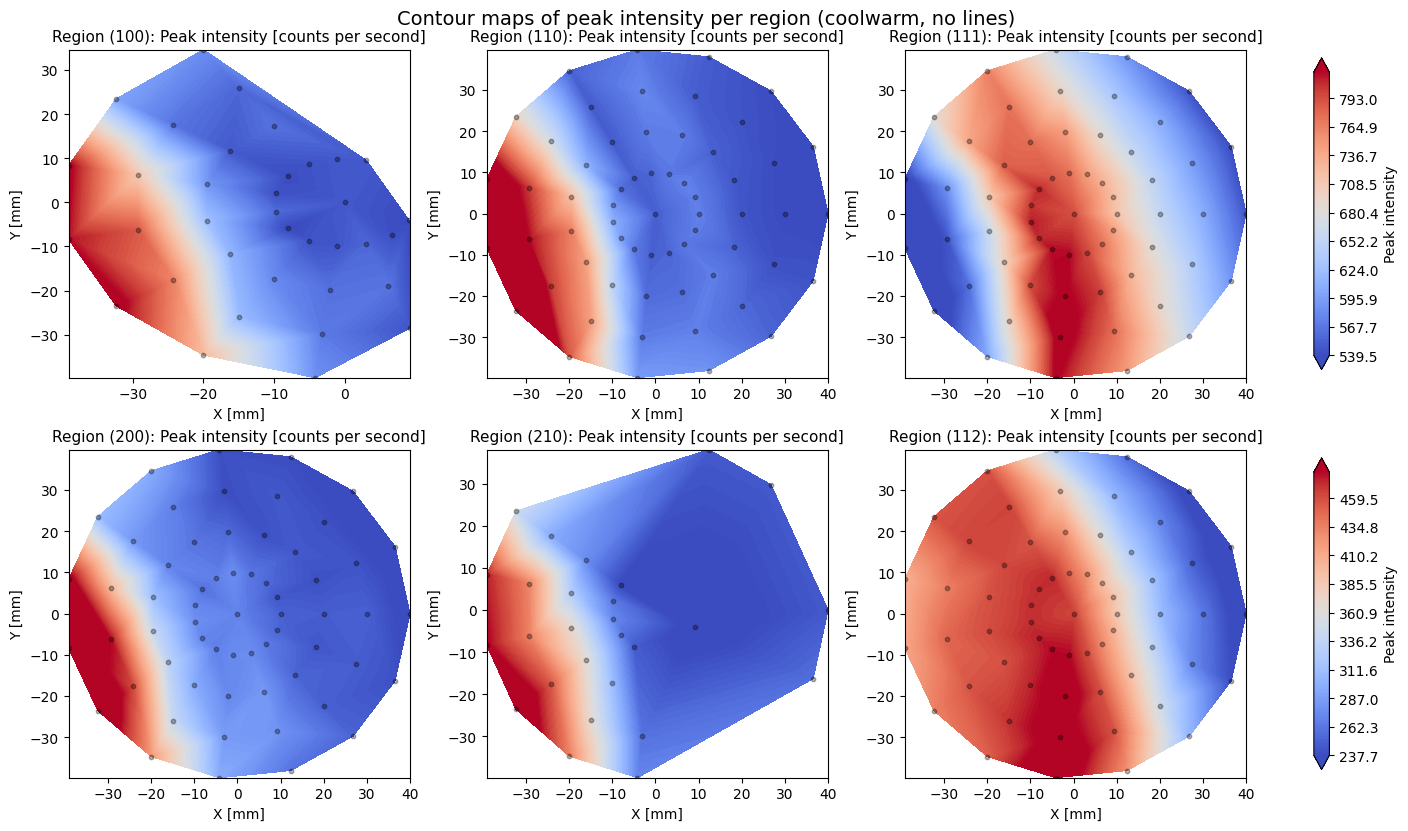

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata

# ---- inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
pi_raw = np.asarray(peak_intensity, dtype=float)   # <-- use intensity here
N = x_pos.size

# ---- normalize into shape (N, 6) ----
def normalize_six(arr, N):
    a = np.asarray(arr)
    if a.ndim == 2 and a.shape == (N, 6):
        return a
    if a.ndim == 1 and a.size == N * 6:
        return a.reshape(N, 6)
    if a.ndim == 2 and a.shape[0] == N * 6 and a.shape[1] == 6:
        blocks = np.split(a, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if a.ndim == 2 and a.shape == (N * 6, 1):
        return a.reshape(N, 6)
    raise ValueError(f"Cannot reshape array with shape {a.shape} to (N,6).")

peakI = normalize_six(pi_raw, N)   # (N, 6)

# ---- helpers ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]

def _contour_one(ax, xs, ys, zs, title, nlevels=100, cmap="coolwarm", try_grid_fallback=True):
    m = np.isfinite(xs) & np.isfinite(ys) & np.isfinite(zs)
    xs, ys, zs = xs[m], ys[m], zs[m]
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    if len(xs) < 3:
        ax.text(0.5, 0.5, "Too few points", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    # color limits
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin, vmax = float(np.nanmin(zs)), float(np.nanmax(zs))
        if not np.isfinite(vmin) or vmin == vmax:
            ax.text(0.5, 0.5, "No variation", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

    # triangulation or grid fallback
    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(tri, zs, levels=np.linspace(vmin, vmax, nlevels),
                            extend='both', cmap=cmap)
    except Exception:
        if not try_grid_fallback:
            ax.text(0.5, 0.5, "Triangulation failed", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        gx = np.linspace(xs.min(), xs.max(), 60)
        gy = np.linspace(ys.min(), ys.max(), 60)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method='linear')
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method='nearest')
        if np.isnan(GZ).all():
            ax.text(0.5, 0.5, "Insufficient geometry", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        cf = ax.contourf(GX, GY, GZ, levels=np.linspace(vmin, vmax, nlevels),
                         extend='both', cmap=cmap)

    ax.scatter(xs, ys, s=10, c='k', alpha=0.3)  # optional markers
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    return cf

# ---- plot 6 intensity maps ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]  # keep your region labels
fig, axes = plt.subplots(2, 3, figsize=(14, 8), constrained_layout=True)
cfs = []
for i in range(6):
    r, c = divmod(i, 3)
    cf = _contour_one(axes[r, c], x_pos, y_pos, peakI[:, i],
                      title=f"{titles[i]}: Peak intensity [counts per second]",
                      cmap="coolwarm", nlevels=120)
    cfs.append(cf)

# row-wise colorbars
for r in range(2):
    row = [cfs[r*3 + j] for j in range(3) if cfs[r*3 + j] is not None]
    if row:
        fig.colorbar(row[0], ax=axes[r, :], shrink=0.95, label="Peak intensity")


plt.suptitle("Contour maps of peak intensity per region (coolwarm, no lines)", y=1.02, fontsize=14)
plt.show()


### 100 and 110 Planes, FHWM, Peak Intensity, Integrated area and Ratio

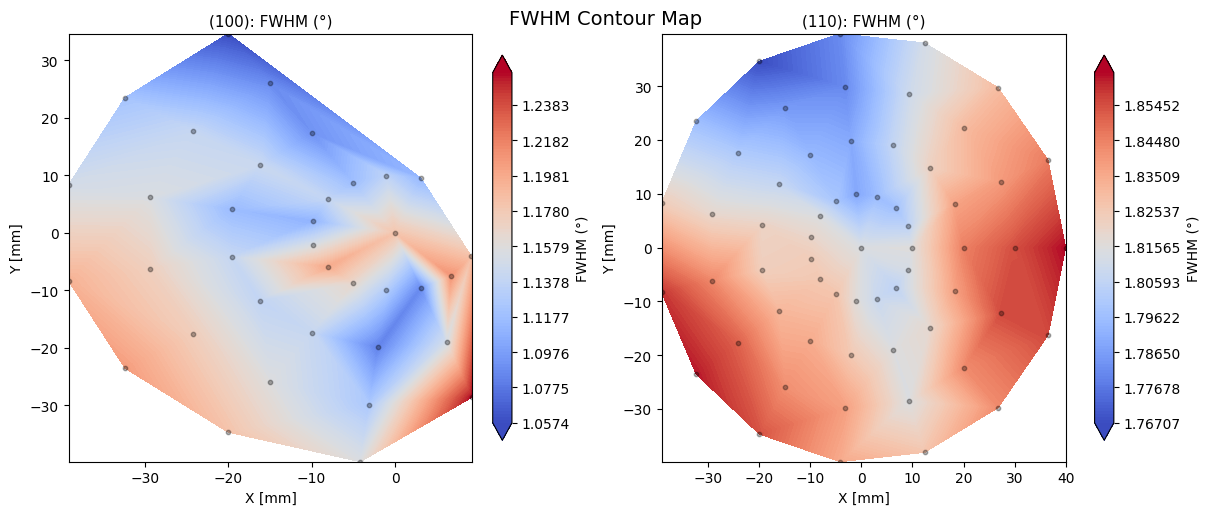

FWHM variability by plane (min, max, Δ):
  Region (100): min=1.0574, max=1.2567, Δ=0.1993
  Region (110): min=1.7671, max=1.8634, Δ=0.0964


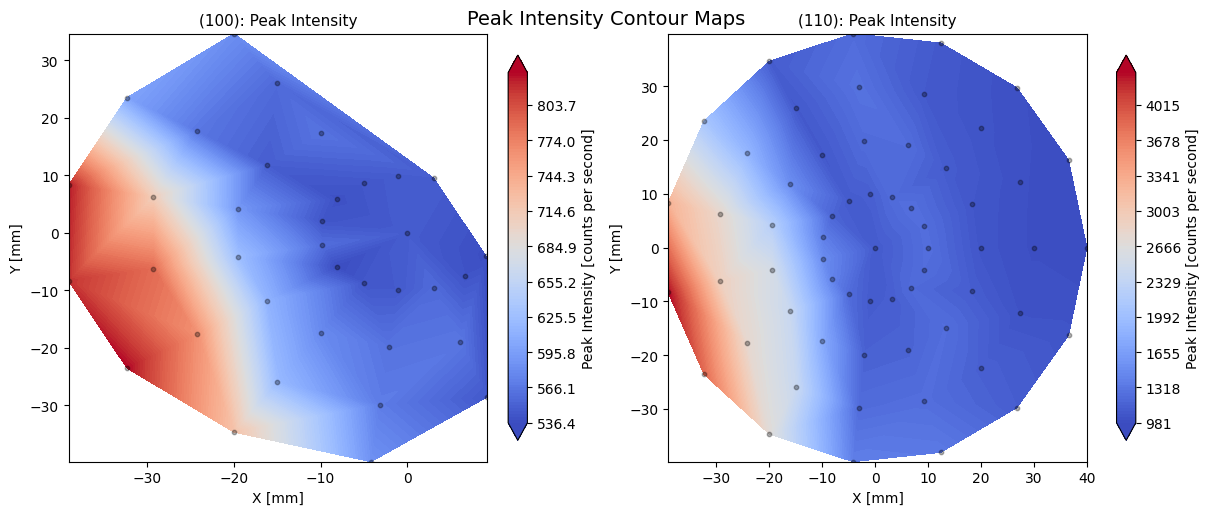

Peak intensity variability by plane (min, max, Δ):
  Region (100): min=536.3806, max=830.8884, Δ=294.5079
  Region (110): min=980.9045, max=4323.7043, Δ=3342.7997


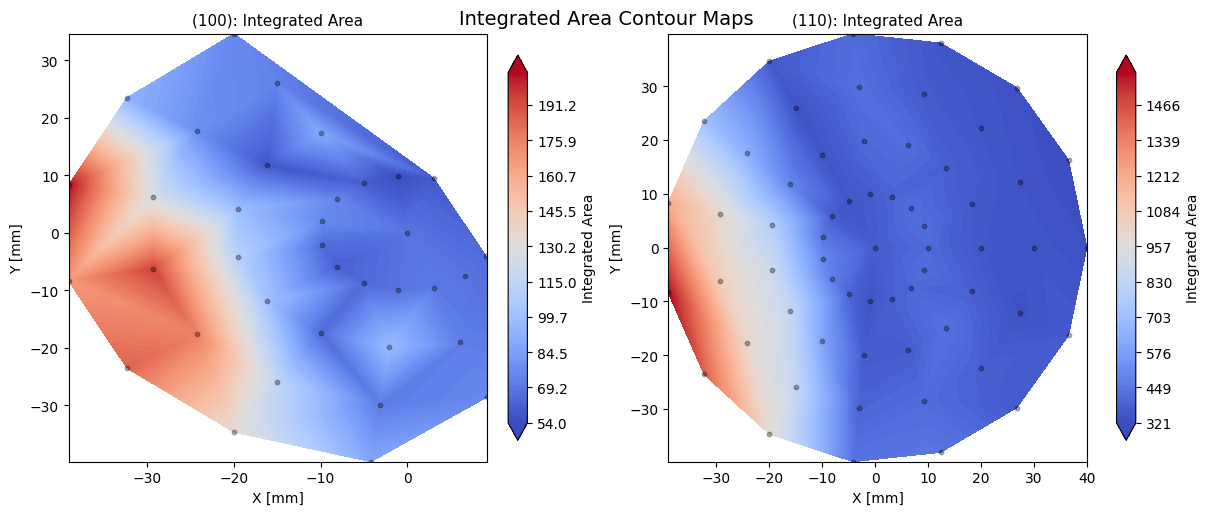

Integrated area variability by plane (min, max, Δ):
  Region (100): min=53.97, max=205.17, Δ=151.21
  Region (110): min=321.36, max=1582.62, Δ=1261.26


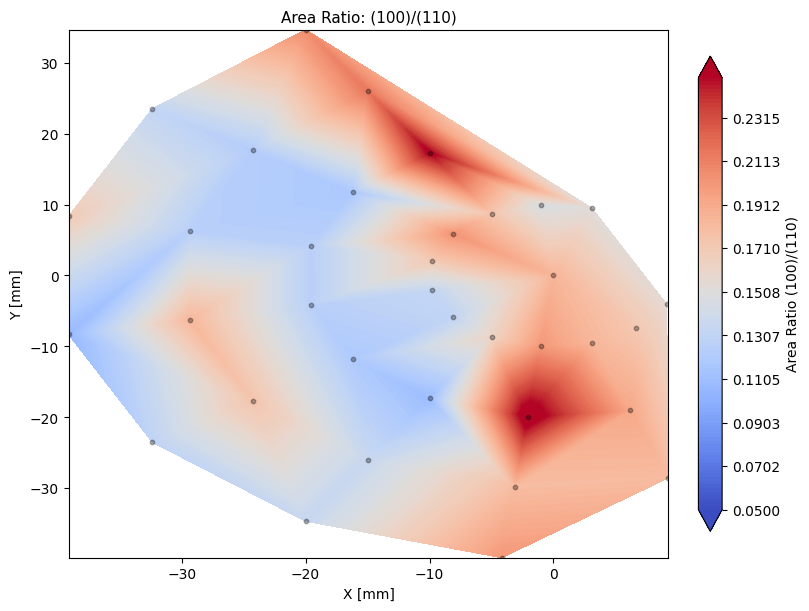


Area Ratio (100)/(110) statistics:
  min=0.106, max=0.263, mean=0.163, Δ=0.157


In [7]:
# ---- your inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
fw_raw = np.asarray(results, dtype=float)
N = x_pos.size


# ---- normalize fw_raw into shape (N, 6) ----
def normalize_fwhm(fw_raw, N):
    fw = np.asarray(fw_raw)
    if fw.ndim == 2 and fw.shape == (N, 6):
        return fw
    if fw.ndim == 1 and fw.size == N * 6:
        return fw.reshape(N, 6)
    if fw.ndim == 2 and fw.shape[0] == N * 6 and fw.shape[1] == 6:
        blocks = np.split(fw, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if fw.ndim == 2 and fw.shape == (N * 6, 1):
        return fw.reshape(N, 6)
    raise ValueError(f"Cannot reshape results with shape {fw.shape} to (N,6).")


fwhm = normalize_fwhm(fw_raw, N)


# ---- helpers for plotting ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]


def _robust_minmax(zs):
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin = float(np.nanmin(zs))
        vmax = float(np.nanmax(zs))
    return vmin, vmax


def _contour_one(
    ax,
    xs,
    ys,
    zs,
    title,
    nlevels=100,
    cmap="coolwarm",
    try_grid_fallback=True,
    levels=None,
):
    m = np.isfinite(xs) & np.isfinite(ys) & np.isfinite(zs)
    xs, ys, zs = xs[m], ys[m], zs[m]
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    if len(xs) < 3:
        ax.text(
            0.5, 0.5, "Too few points", ha="center", va="center", transform=ax.transAxes
        )
        ax.set_axis_off()
        return None

    finite_levels = None
    if levels is not None:
        finite_levels = np.asarray(levels, dtype=float)
        finite_levels = finite_levels[np.isfinite(finite_levels)]

    if finite_levels is None or finite_levels.size == 0:
        vmin, vmax = _robust_minmax(zs)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            ax.text(
                0.5, 0.5, "No variation", ha="center", va="center", transform=ax.transAxes
            )
            ax.set_axis_off()
            return None
        finite_levels = np.linspace(vmin, vmax, nlevels)
    else:
        vmin = float(finite_levels.min())
        vmax = float(finite_levels.max())

    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(
            tri,
            zs,
            levels=finite_levels,
            extend="both",
            cmap=cmap,
        )
    except Exception:
        if not try_grid_fallback:
            ax.text(
                0.5,
                0.5,
                "Triangulation failed",
                ha="center",
                va="center",
                transform=ax.transAxes,
            )
            ax.set_axis_off()
            return None

        gx = np.linspace(xs.min(), xs.max(), 60)
        gy = np.linspace(ys.min(), ys.max(), 60)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method="linear")
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method="nearest")
        if np.isnan(GZ).all():
            ax.text(
                0.5,
                0.5,
                "Insufficient geometry",
                ha="center",
                va="center",
                transform=ax.transAxes,
            )
            ax.set_axis_off()
            return None

        cf = ax.contourf(
            GX,
            GY,
            GZ,
            levels=finite_levels,
            extend="both",
            cmap=cmap,
        )

    ax.scatter(xs, ys, s=10, c="k", alpha=0.3)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    return cf


# ---- Plot only (100) and (110) with independent colorbars ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]
planes_to_plot = [0, 1]  # (100) and (110)
plane_names = [REGION_NAMES[i] for i in planes_to_plot]

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(fwhm[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = fwhm[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        fwhm[:, plane_idx],
        title=f"{plane_names[plot_idx]}: FWHM (°)",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="FWHM (°)")

plt.suptitle("FWHM Contour Map", y=1.00, fontsize=14)
plt.show()

print("FWHM variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# PEAK INTENSITY CONTOUR MAPS
# ===============================================================

# ---- inputs ----
pi_raw = np.asarray(peak_intensity, dtype=float)

def normalize_six(arr, N):
    a = np.asarray(arr)
    if a.ndim == 2 and a.shape == (N, 6):
        return a
    if a.ndim == 1 and a.size == N * 6:
        return a.reshape(N, 6)
    if a.ndim == 2 and a.shape[0] == N * 6 and a.shape[1] == 6:
        blocks = np.split(a, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if a.ndim == 2 and a.shape == (N * 6, 1):
        return a.reshape(N, 6)
    raise ValueError(f"Cannot reshape array with shape {a.shape} to (N,6).")

peakI = normalize_six(pi_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakI[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakI[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakI[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Peak Intensity",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Peak Intensity [counts per second]")

plt.suptitle("Peak Intensity Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Peak intensity variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# INTEGRATED AREA CONTOUR MAPS
# ===============================================================

# ---- inputs ----
area_raw = np.asarray(peak_areas, dtype=float)
peakA = normalize_six(area_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakA[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakA[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakA[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Integrated Area",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Integrated Area")

plt.suptitle("Integrated Area Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Integrated area variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.2f}, max={stat['max']:.2f}, Δ={stat['range']:.2f}"
        )

# ===============================================================
# AREA RATIO (100)/(110) CONTOUR MAP
# ===============================================================

# Calculate the ratio of (100) to (110) integrated areas
area_100 = peakA[:, 0]  # (100) is index 0
area_110 = peakA[:, 1]  # (110) is index 1

# Calculate ratio, handling division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    area_ratio = area_100 / area_110

# Replace inf and -inf with NaN
area_ratio[~np.isfinite(area_ratio)] = np.nan

# Plot the ratio
fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)

# Get statistics
finite_ratio = area_ratio[np.isfinite(area_ratio)]
if finite_ratio.size > 0:
    rmin = float(finite_ratio.min())
    rmax = float(finite_ratio.max())
    rmean = float(finite_ratio.mean())
    if rmin == rmax:
        rmax = rmin + 1e-6
    ratio_levels = np.linspace(rmin, rmax, 120)
else:
    ratio_levels = None

cf = _contour_one(
    ax,
    x_pos,
    y_pos,
    area_ratio,
    title="Area Ratio: (100)/(110)",
    cmap="coolwarm",
    levels= np.linspace(0.05, 0.25, 120),
)

if cf is not None:
    fig.colorbar(cf, ax=ax, shrink=0.9, label="Area Ratio (100)/(110)")

#plt.suptitle("Integrated Area Ratio Contour Map", y=1.02, fontsize=12)
plt.show()

if finite_ratio.size > 0:
    print(f"\nArea Ratio (100)/(110) statistics:")
    print(f"  min={rmin:.3f}, max={rmax:.3f}, mean={rmean:.3f}, Δ={rmax-rmin:.3f}")
else:
    print("\nArea Ratio (100)/(110): No finite data")

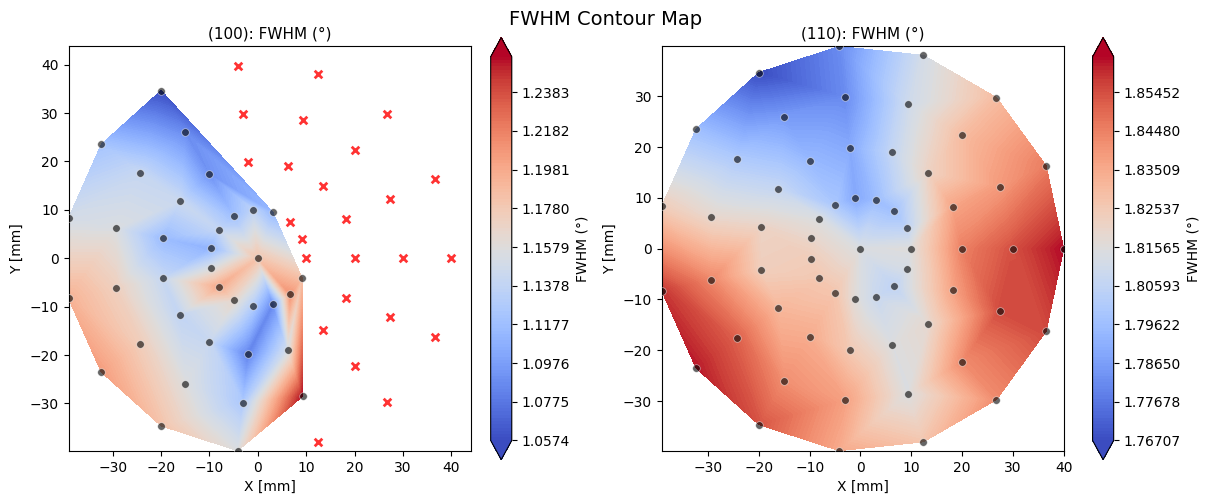

FWHM variability by plane (min, max, Δ):
  Region (100): min=1.0574, max=1.2567, Δ=0.1993
  Region (110): min=1.7671, max=1.8634, Δ=0.0964


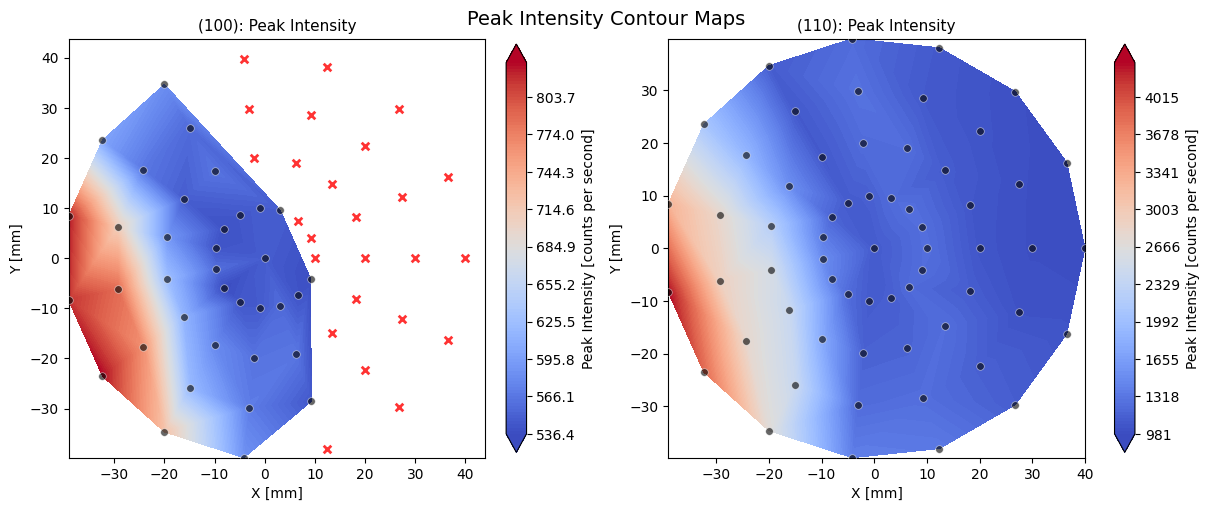

Peak intensity variability by plane (min, max, Δ):
  Region (100): min=536.3806, max=830.8884, Δ=294.5079
  Region (110): min=980.9045, max=4323.7043, Δ=3342.7997


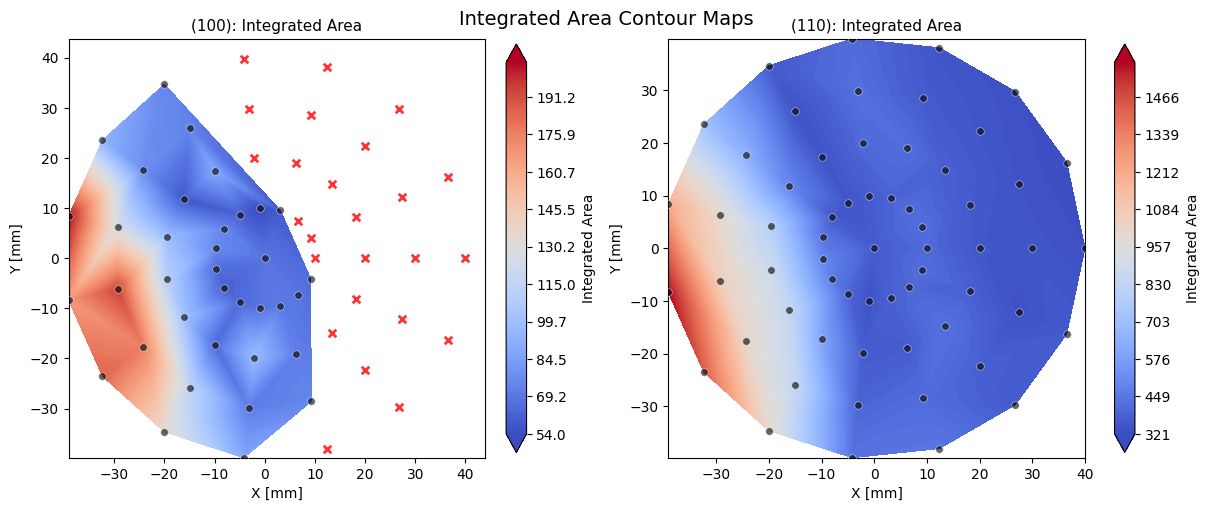

Integrated area variability by plane (min, max, Δ):
  Region (100): min=53.97, max=205.17, Δ=151.21
  Region (110): min=321.36, max=1582.62, Δ=1261.26


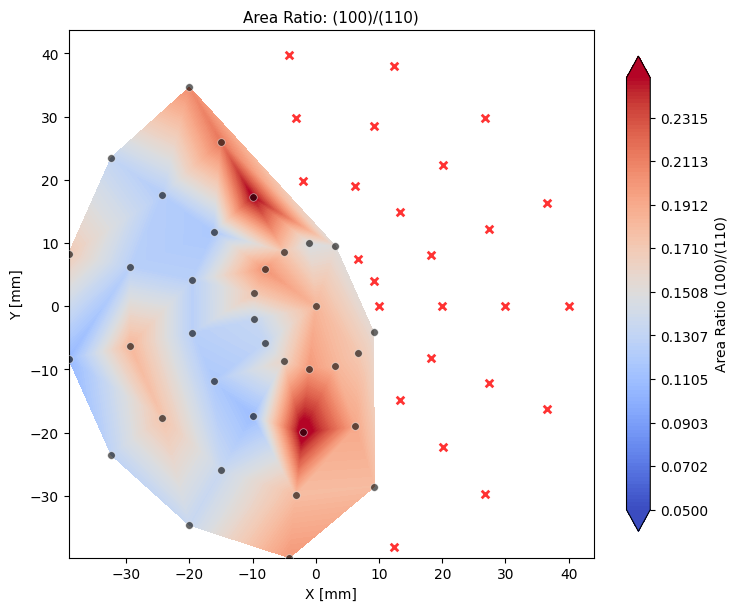


Area Ratio (100)/(110) statistics:
  min=0.106, max=0.263, mean=0.163, Δ=0.157


In [8]:
# ---- your inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
fw_raw = np.asarray(results, dtype=float)
N = x_pos.size


# ---- normalize fw_raw into shape (N, 6) ----
def normalize_fwhm(fw_raw, N):
    fw = np.asarray(fw_raw)
    if fw.ndim == 2 and fw.shape == (N, 6):
        return fw
    if fw.ndim == 1 and fw.size == N * 6:
        return fw.reshape(N, 6)
    if fw.ndim == 2 and fw.shape[0] == N * 6 and fw.shape[1] == 6:
        blocks = np.split(fw, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if fw.ndim == 2 and fw.shape == (N * 6, 1):
        return fw.reshape(N, 6)
    raise ValueError(f"Cannot reshape results with shape {fw.shape} to (N,6).")


fwhm = normalize_fwhm(fw_raw, N)


# ---- helpers for plotting ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]


def _robust_minmax(zs):
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin = float(np.nanmin(zs))
        vmax = float(np.nanmax(zs))
    return vmin, vmax


def _contour_one(
    ax,
    xs_all,
    ys_all,
    zs_all,
    title,
    nlevels=100,
    cmap="coolwarm",
    levels=None,
):
    """
    Create smooth contour plot using triangulation.
    Shows all measurement points with markers.
    """
    # Separate finite and NaN data points
    mask_finite = np.isfinite(xs_all) & np.isfinite(ys_all) & np.isfinite(zs_all)
    xs = xs_all[mask_finite]
    ys = ys_all[mask_finite]
    zs = zs_all[mask_finite]
    
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        # Still show all measurement points even if no data
        ax.scatter(xs_all, ys_all, s=30, c='red', marker='x', alpha=0.6, linewidths=2)
        ax.set_title(title, fontsize=11)
        ax.set_xlabel("X [mm]")
        ax.set_ylabel("Y [mm]")
        ax.set_aspect('equal', adjustable='box')
        return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    
    if len(xs) < 3:
        ax.text(0.5, 0.5, "Too few points", ha="center", va="center", transform=ax.transAxes)
        # Show all measurement points
        ax.scatter(xs_all, ys_all, s=30, c='red', marker='x', alpha=0.6, linewidths=2)
        ax.set_title(title, fontsize=11)
        ax.set_xlabel("X [mm]")
        ax.set_ylabel("Y [mm]")
        ax.set_aspect('equal', adjustable='box')
        return None

    # Determine color levels
    finite_levels = None
    if levels is not None:
        finite_levels = np.asarray(levels, dtype=float)
        finite_levels = finite_levels[np.isfinite(finite_levels)]

    if finite_levels is None or finite_levels.size == 0:
        vmin, vmax = _robust_minmax(zs)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            ax.text(
                0.5, 0.5, "No variation", ha="center", va="center", transform=ax.transAxes
            )
            ax.set_title(title, fontsize=11)
            ax.set_xlabel("X [mm]")
            ax.set_ylabel("Y [mm]")
            ax.set_aspect('equal', adjustable='box')
            return None
        finite_levels = np.linspace(vmin, vmax, nlevels)
    else:
        vmin = float(finite_levels.min())
        vmax = float(finite_levels.max())

    # Use triangulation for smooth edges
    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(
            tri,
            zs,
            levels=finite_levels,
            extend="both",
            cmap=cmap,
        )
    except Exception:
        # Fallback: try grid interpolation
        gx = np.linspace(xs.min(), xs.max(), 100)
        gy = np.linspace(ys.min(), ys.max(), 100)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method="linear")
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method="nearest")
        if np.isnan(GZ).all():
            ax.text(0.5, 0.5, "Triangulation failed", ha="center", va="center", transform=ax.transAxes)
            ax.set_title(title, fontsize=11)
            ax.set_xlabel("X [mm]")
            ax.set_ylabel("Y [mm]")
            ax.set_aspect('equal', adjustable='box')
            return None
        
        cf = ax.contourf(GX, GY, GZ, levels=finite_levels, extend="both", cmap=cmap)

    # Scatter plot: show ALL measurement points
    # Black circles for detected peaks
    if np.sum(mask_finite) > 0:
        ax.scatter(xs_all[mask_finite], ys_all[mask_finite], 
                   s=30, c="k", alpha=0.6, edgecolors='white', linewidths=0.5, zorder=5)
    
    # Red X for missing/undetected peaks
    if np.sum(~mask_finite) > 0:
        ax.scatter(xs_all[~mask_finite], ys_all[~mask_finite], 
                   s=30, c="red", marker='x', alpha=0.8, linewidths=2, zorder=5)
    
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    ax.set_aspect('equal', adjustable='box')
    
    return cf


# ---- Plot only (100) and (110) with independent colorbars ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]
planes_to_plot = [0, 1]  # (100) and (110)
plane_names = [REGION_NAMES[i] for i in planes_to_plot]

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(fwhm[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = fwhm[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        fwhm[:, plane_idx],
        title=f"{plane_names[plot_idx]}: FWHM (°)",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="FWHM (°)")

plt.suptitle("FWHM Contour Map", y=1.00, fontsize=14)
plt.show()

print("FWHM variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# PEAK INTENSITY CONTOUR MAPS
# ===============================================================

# ---- inputs ----
pi_raw = np.asarray(peak_intensity, dtype=float)

def normalize_six(arr, N):
    a = np.asarray(arr)
    if a.ndim == 2 and a.shape == (N, 6):
        return a
    if a.ndim == 1 and a.size == N * 6:
        return a.reshape(N, 6)
    if a.ndim == 2 and a.shape[0] == N * 6 and a.shape[1] == 6:
        blocks = np.split(a, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if a.ndim == 2 and a.shape == (N * 6, 1):
        return a.reshape(N, 6)
    raise ValueError(f"Cannot reshape array with shape {a.shape} to (N,6).")

peakI = normalize_six(pi_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakI[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakI[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakI[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Peak Intensity",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Peak Intensity [counts per second]")

plt.suptitle("Peak Intensity Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Peak intensity variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# INTEGRATED AREA CONTOUR MAPS
# ===============================================================

# ---- inputs ----
area_raw = np.asarray(peak_areas, dtype=float)
peakA = normalize_six(area_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakA[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakA[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakA[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Integrated Area",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Integrated Area")

plt.suptitle("Integrated Area Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Integrated area variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.2f}, max={stat['max']:.2f}, Δ={stat['range']:.2f}"
        )

# ===============================================================
# AREA RATIO (100)/(110) CONTOUR MAP
# ===============================================================

# Calculate the ratio of (100) to (110) integrated areas
area_100 = peakA[:, 0]  # (100) is index 0
area_110 = peakA[:, 1]  # (110) is index 1

# Calculate ratio, handling division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    area_ratio = area_100 / area_110

# Replace inf and -inf with NaN
area_ratio[~np.isfinite(area_ratio)] = np.nan

# Plot the ratio
fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)

# Get statistics
finite_ratio = area_ratio[np.isfinite(area_ratio)]
if finite_ratio.size > 0:
    rmin = float(finite_ratio.min())
    rmax = float(finite_ratio.max())
    rmean = float(finite_ratio.mean())
    if rmin == rmax:
        rmax = rmin + 1e-6
    ratio_levels = np.linspace(rmin, rmax, 120)
else:
    ratio_levels = None

cf = _contour_one(
    ax,
    x_pos,
    y_pos,
    area_ratio,
    title="Area Ratio: (100)/(110)",
    cmap="coolwarm",
    levels=np.linspace(0.05, 0.25, 120),
)

if cf is not None:
    fig.colorbar(cf, ax=ax, shrink=0.9, label="Area Ratio (100)/(110)")

#plt.suptitle("Integrated Area Ratio Contour Map", y=1.02, fontsize=12)
plt.show()

if finite_ratio.size > 0:
    print(f"\nArea Ratio (100)/(110) statistics:")
    print(f"  min={rmin:.3f}, max={rmax:.3f}, mean={rmean:.3f}, Δ={rmax-rmin:.3f}")
else:
    print("\nArea Ratio (100)/(110): No finite data")

### Integrated Area by distance to Target Center

3D Distance to target statistics:
  Distance range: 158.64 - 224.99 mm
  Mean distance: 192.11 mm


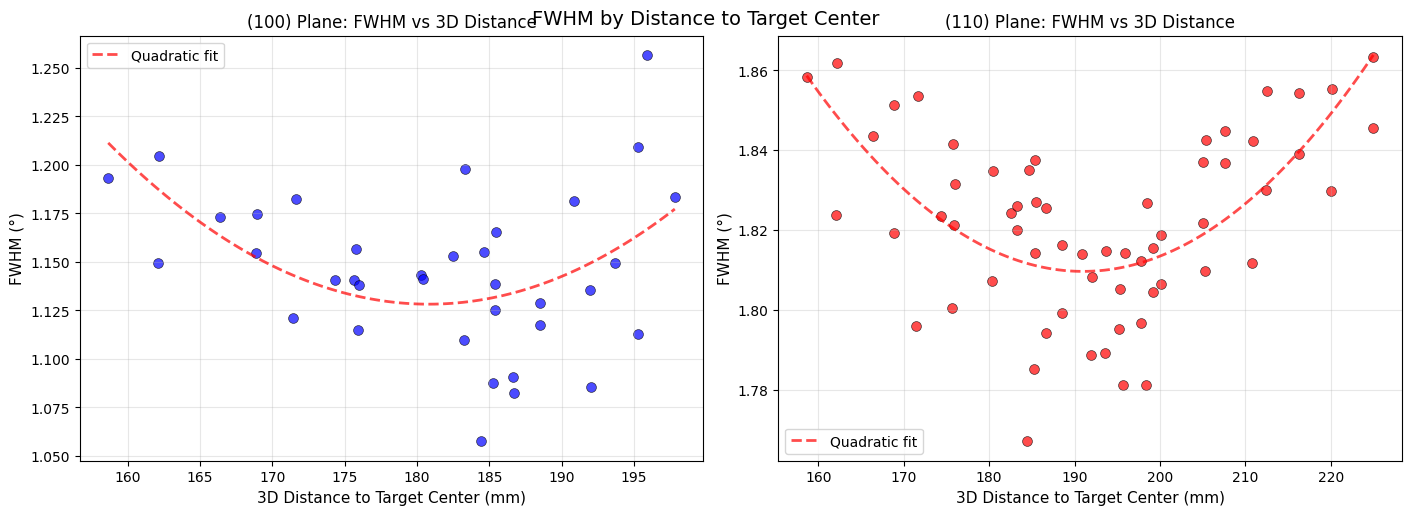

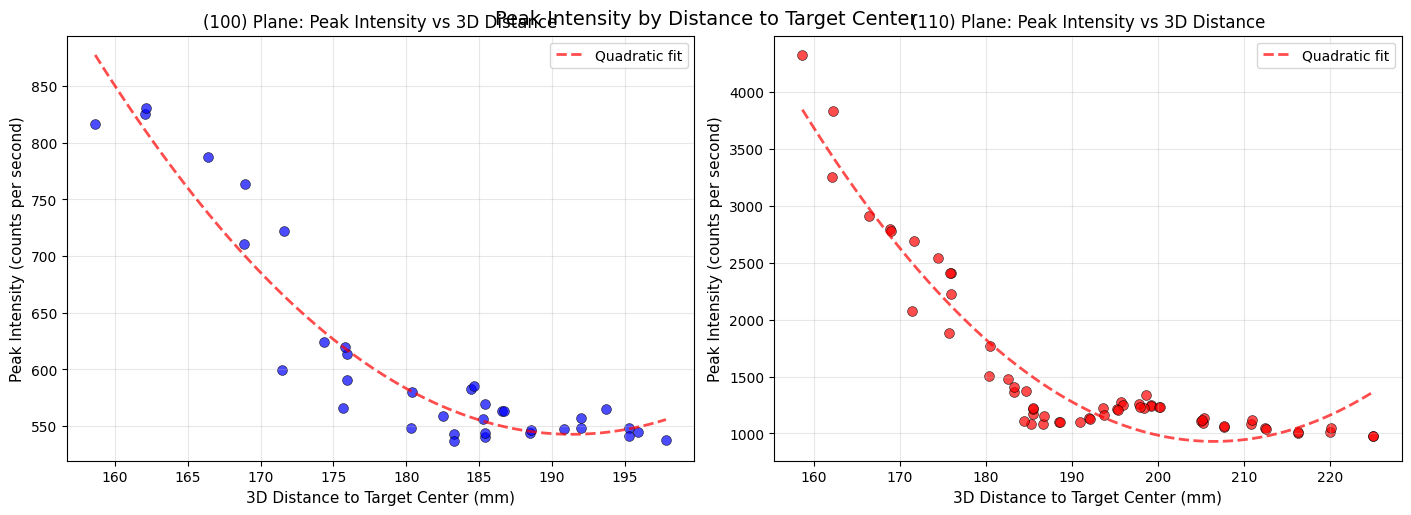

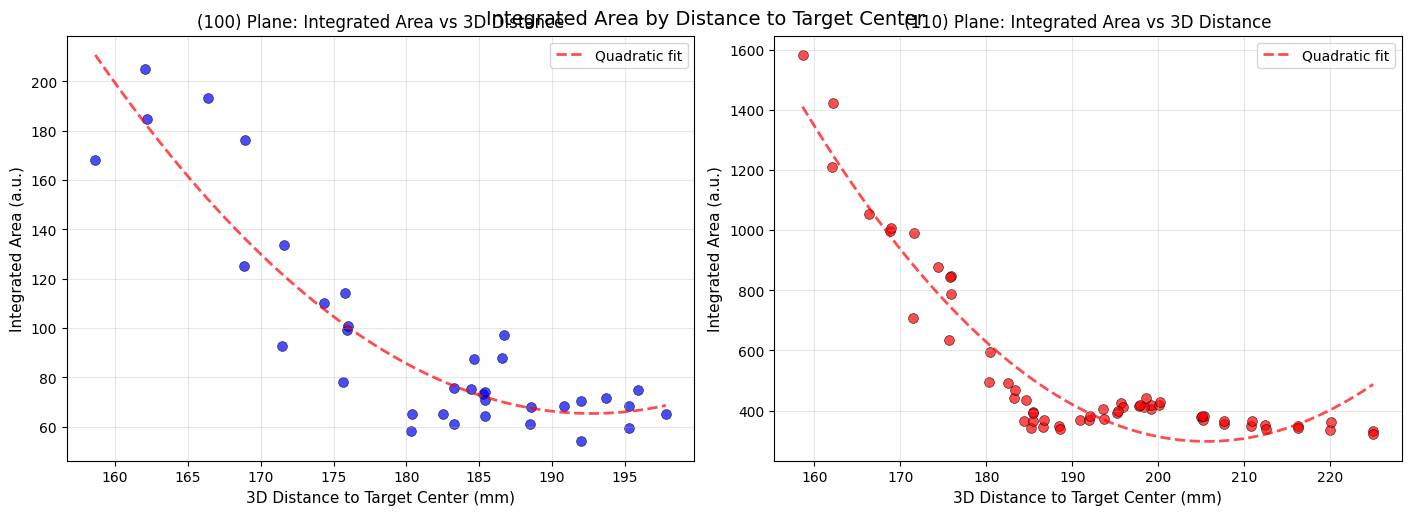

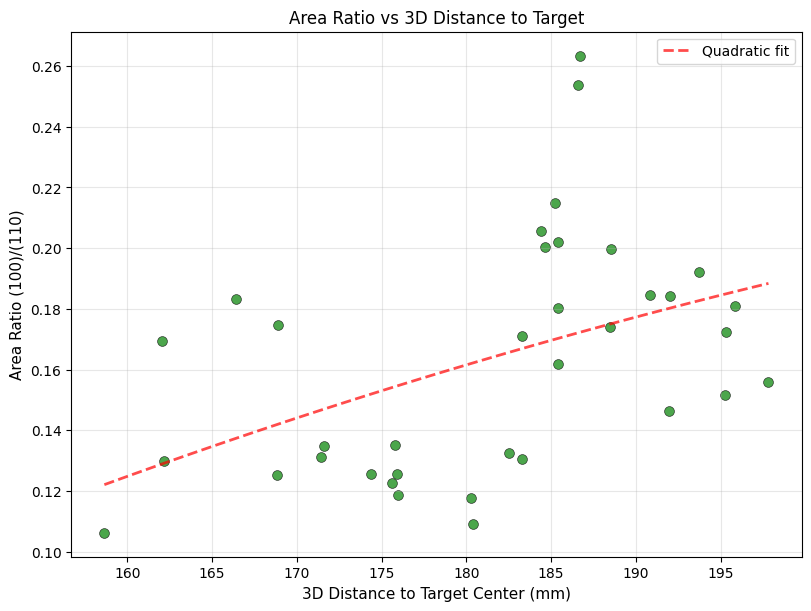


Correlation coefficients (Pearson) with 3D distance:

FWHM:
  (100): r = -0.146
  (110): r = 0.099

Peak Intensity:
  (100): r = -0.868
  (110): r = -0.786

Integrated Area:
  (100): r = -0.843
  (110): r = -0.765

Area Ratio (100)/(110): r = 0.448


In [9]:
# ===============================================================
# INTEGRATED AREA BY DISTANCE TO TARGET CENTER
# ===============================================================

# Target position (mm)
target_x = 399.88
target_y = 224.1
target_z = 332.15

# Wafer center position (x=0, y=0 in XRD coordinates corresponds to this)
wafer_center_x = 242.5
wafer_center_y = 257.0
wafer_center_z = 435.0

# Convert XRD coordinates to real-world coordinates
# The x_coordinates from XRD need to have their sign flipped
x_pos_real = -np.asarray(x_coordinates, dtype=float) + wafer_center_x
y_pos_real = np.asarray(y_coordinates, dtype=float) + wafer_center_y
z_pos_real = np.full_like(x_pos_real, wafer_center_z)  # Assuming all measurements at same z

# Calculate 3D distance from each point to target
distances_3d = np.sqrt(
    (x_pos_real - target_x)**2 + 
    (y_pos_real - target_y)**2 + 
    (z_pos_real - target_z)**2
)

print("3D Distance to target statistics:")
print(f"  Distance range: {distances_3d.min():.2f} - {distances_3d.max():.2f} mm")
print(f"  Mean distance: {distances_3d.mean():.2f} mm")

# Get data for (100) and (110) planes
area_100 = peakA[:, 0]  # (100) integrated area
area_110 = peakA[:, 1]  # (110) integrated area
fwhm_100 = fwhm[:, 0]   # (100) FWHM
fwhm_110 = fwhm[:, 1]   # (110) FWHM
intensity_100 = peakI[:, 0]  # (100) peak intensity
intensity_110 = peakI[:, 1]  # (110) peak intensity

# Calculate area ratio
with np.errstate(divide='ignore', invalid='ignore'):
    area_ratio = area_100 / area_110
area_ratio[~np.isfinite(area_ratio)] = np.nan

# ===============================================================
# PLOT 1: FWHM vs 3D Distance
# ===============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# (100) FWHM
ax = axes[0]
mask_finite = np.isfinite(fwhm_100) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], fwhm_100[mask_finite], 
           c='blue', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('FWHM (°)', fontsize=11)
ax.set_title('(100) Plane: FWHM vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], fwhm_100[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

# (110) FWHM
ax = axes[1]
mask_finite = np.isfinite(fwhm_110) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], fwhm_110[mask_finite], 
           c='red', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('FWHM (°)', fontsize=11)
ax.set_title('(110) Plane: FWHM vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], fwhm_110[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.suptitle('FWHM by Distance to Target Center', y=1.00, fontsize=14)
plt.show()

# ===============================================================
# PLOT 2: Peak Intensity vs 3D Distance
# ===============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# (100) Peak Intensity
ax = axes[0]
mask_finite = np.isfinite(intensity_100) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], intensity_100[mask_finite], 
           c='blue', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Peak Intensity (counts per second)', fontsize=11)
ax.set_title('(100) Plane: Peak Intensity vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], intensity_100[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

# (110) Peak Intensity
ax = axes[1]
mask_finite = np.isfinite(intensity_110) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], intensity_110[mask_finite], 
           c='red', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Peak Intensity (counts per second)', fontsize=11)
ax.set_title('(110) Plane: Peak Intensity vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], intensity_110[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.suptitle('Peak Intensity by Distance to Target Center', y=1.00, fontsize=14)
plt.show()

# ===============================================================
# PLOT 3: Integrated Area vs 3D Distance
# ===============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# (100) Integrated Area
ax = axes[0]
mask_finite = np.isfinite(area_100) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], area_100[mask_finite], 
           c='blue', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Integrated Area (a.u.)', fontsize=11)
ax.set_title('(100) Plane: Integrated Area vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], area_100[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

# (110) Integrated Area
ax = axes[1]
mask_finite = np.isfinite(area_110) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], area_110[mask_finite], 
           c='red', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Integrated Area (a.u.)', fontsize=11)
ax.set_title('(110) Plane: Integrated Area vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], area_110[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.suptitle('Integrated Area by Distance to Target Center', y=1.00, fontsize=14)
plt.show()

# ===============================================================
# PLOT 4: Area Ratio (100)/(110) vs 3D Distance
# ===============================================================
fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)

mask_finite = np.isfinite(area_ratio) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], area_ratio[mask_finite], 
           c='green', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Area Ratio (100)/(110)', fontsize=11)
ax.set_title('Area Ratio vs 3D Distance to Target', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], area_ratio[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.show()

# Print correlation statistics
print("\nCorrelation coefficients (Pearson) with 3D distance:")
for metric_name, data_100, data_110 in [
    ("FWHM", fwhm_100, fwhm_110),
    ("Peak Intensity", intensity_100, intensity_110),
    ("Integrated Area", area_100, area_110)
]:
    print(f"\n{metric_name}:")
    for plane_name, data in [("(100)", data_100), ("(110)", data_110)]:
        mask = np.isfinite(data) & np.isfinite(distances_3d)
        if np.sum(mask) > 2:
            corr = np.corrcoef(distances_3d[mask], data[mask])[0, 1]
            print(f"  {plane_name}: r = {corr:.3f}")

# Area ratio
mask = np.isfinite(area_ratio) & np.isfinite(distances_3d)
if np.sum(mask) > 2:
    corr = np.corrcoef(distances_3d[mask], area_ratio[mask])[0, 1]
    print(f"\nArea Ratio (100)/(110): r = {corr:.3f}")